In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn.datasets
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
breast_cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
print(breast_cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
breast_cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
breast_cancer_dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
# changing to 0 = benign; 1 = malignant for intuitiveness
target = breast_cancer_dataset['target']
target = np.where(target == 0, 1, 0)
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [7]:
# creating a dataframe
df = pd.DataFrame(data= breast_cancer_dataset['data'],columns=breast_cancer_dataset['feature_names'])
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [8]:
# setting target column
df['target'] = target
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       1  
1                  0.1860          0.2750                  0.08902       1  
2                  0.2430          0.3613                  0.08758       1  
3                  0.2575          0.6638                  0.17300       1  
4                  0.1625          0.2364                  0.076

In [9]:
df['target'].value_counts()

target
0    357
1    212
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [12]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.372583  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    0.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [13]:
df.groupby('target').mean()

mean radius  mean texture  mean perimeter   mean area  \
target                                                          
0         12.146524     17.914762       78.075406  462.790196   
1         17.462830     21.604906      115.365377  978.376415   

        mean smoothness  mean compactness  mean concavity  \
target                                                      
0              0.092478          0.080085        0.046058   
1              0.102898          0.145188        0.160775   

        mean concave points  mean symmetry  mean fractal dimension  ...  \
target                                                              ...   
0                  0.025717       0.174186                0.062867  ...   
1                  0.087990       0.192909                0.062680  ...   

        worst radius  worst texture  worst perimeter   worst area  \
target                                                              
0          13.379801      23.515070        87.005938   558.899440   
1          21.134811      29.318208       141.370330  1422.286321   

        worst smoothness  worst compactness  worst concavity  \
target                                                         
0               0.124959           0.182673         0.166238   
1               0.144845           0.374824         0.450606   

        worst concave points  worst symmetry  worst fractal dimension  
target                                                                 
0                   0.074444        0.270246                 0.079442  
1                   0.182237        0.323468                 0.091530  

[2 rows x 30 columns]

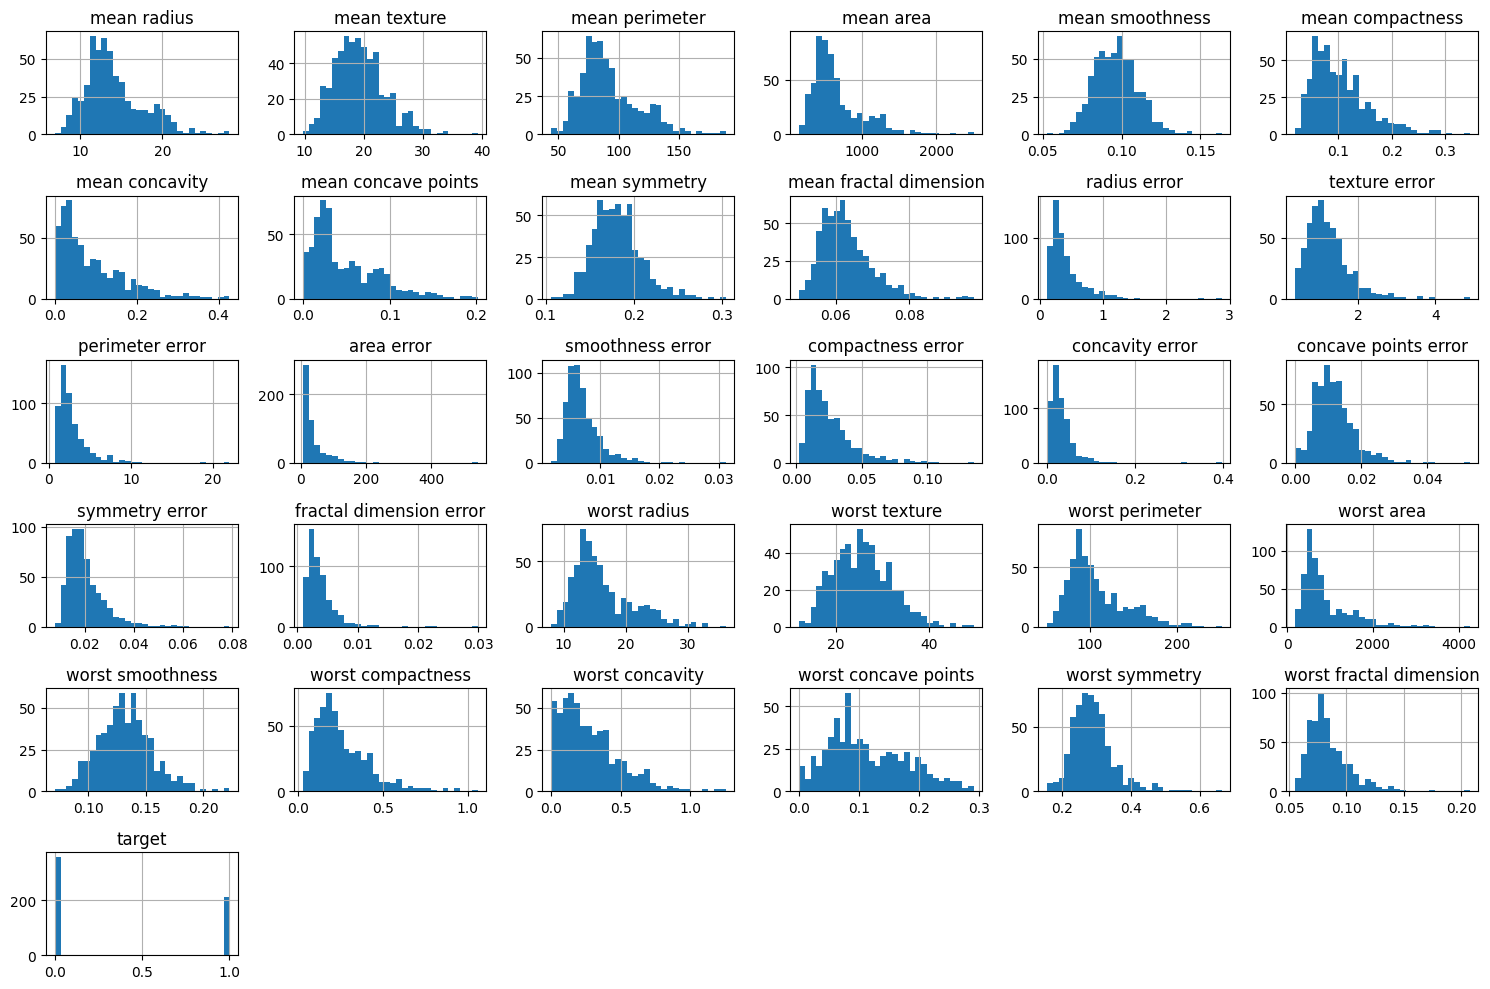

In [14]:
# visualizing feature distribution
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

In [15]:
# checking correlation
df.corr()

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   
target                      0.730029      0.415185        0.742636   0.708984   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error        

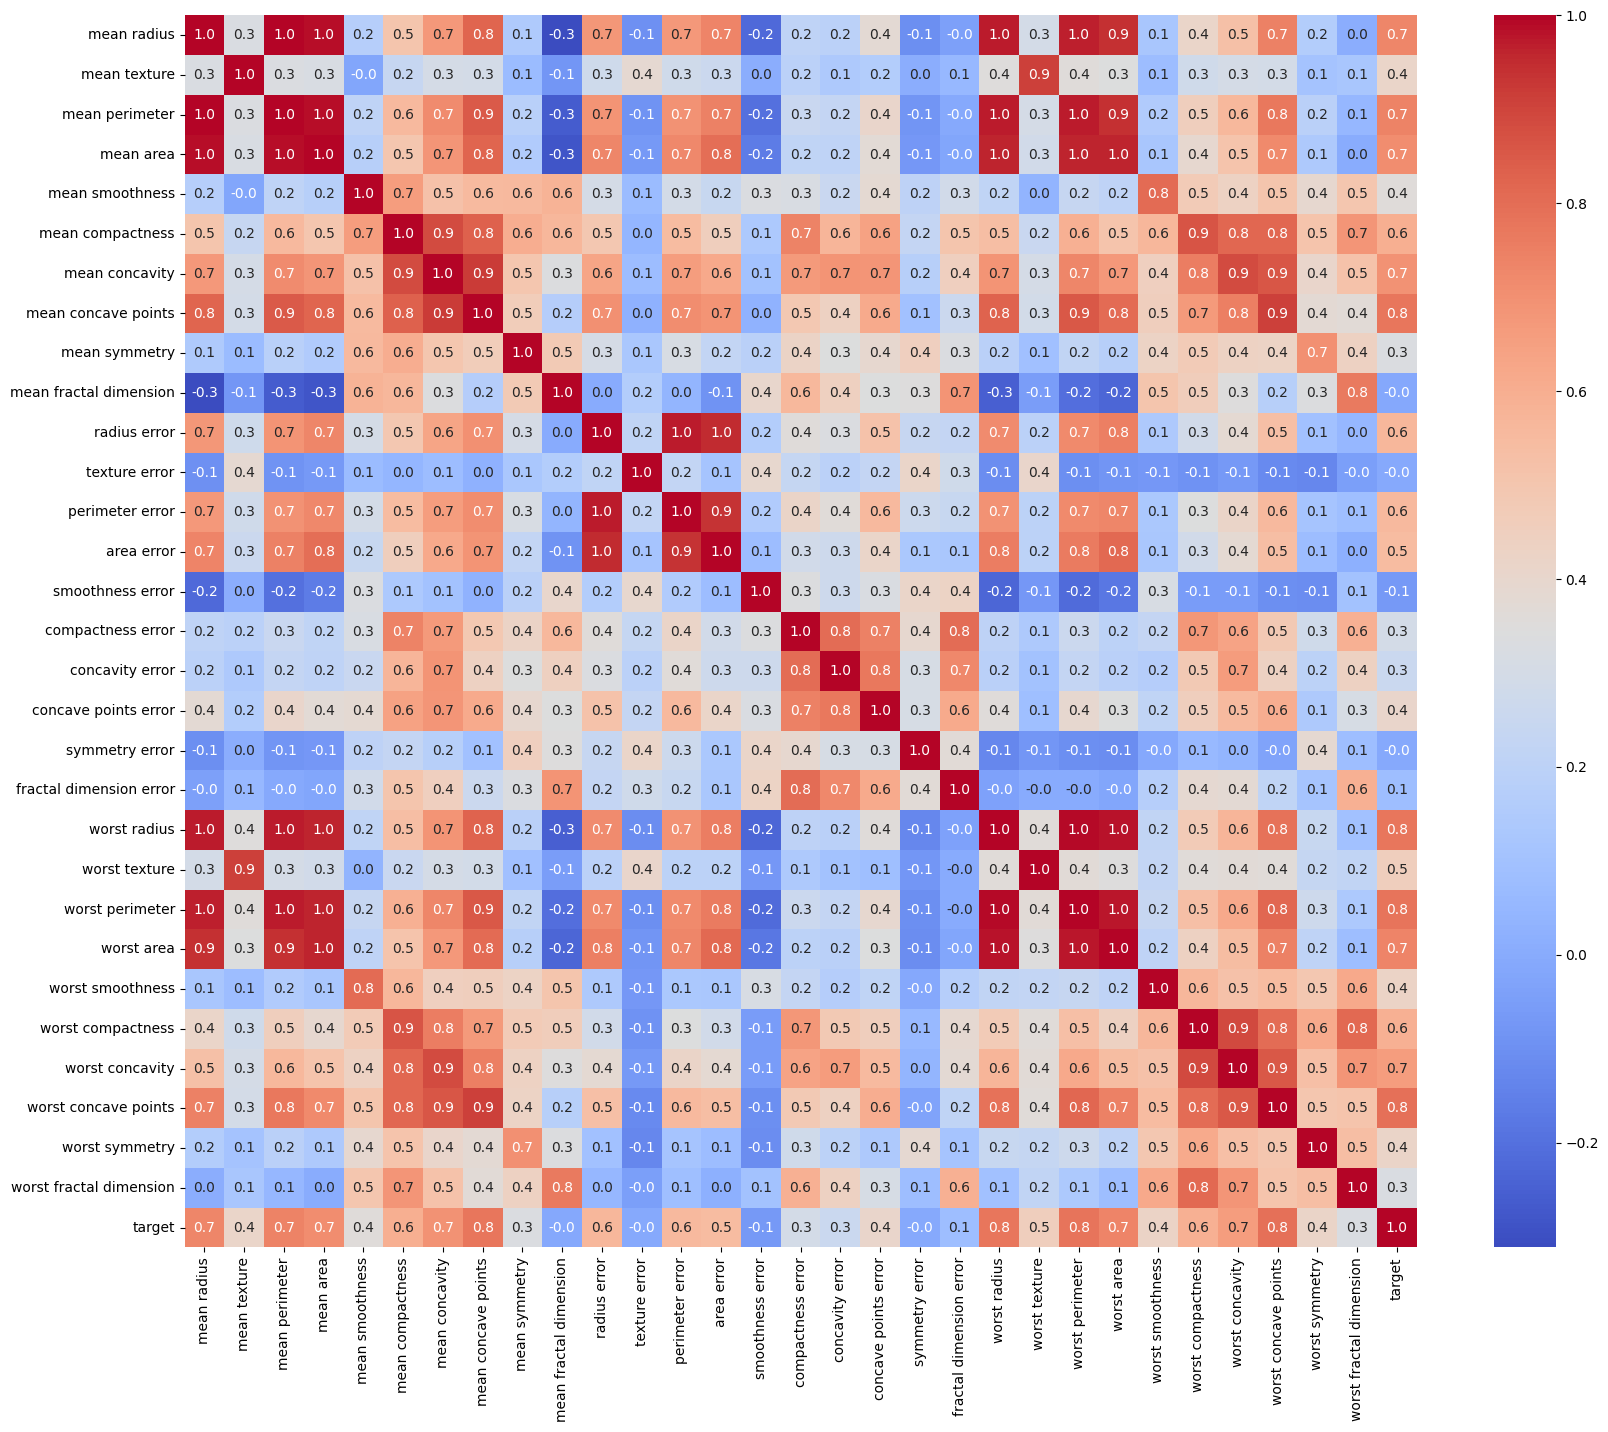

In [16]:
import seaborn as sns
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, fmt='.1f', square= True, cmap= 'coolwarm')
plt.show()

In [17]:
X = df.iloc[:,:-1]
X

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [18]:
y = df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)

In [21]:
X_train_t

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [44]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, average_precision_score, classification_report, confusion_matrix

In [ ]:
# # Model evaluation function

# def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):

#     print('='*50)
#     print(model_name.upper())
#     print('='*50)
    
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     y_proba = model.predict_proba(X_test)[:, 1]
    
#     ROC_AUC= roc_auc_score(y_test, y_proba)
#     PR_AUC= average_precision_score(y_test, y_proba)
#     accuracy= accuracy_score(y_test, y_pred)
#     balanced_accuracy= balanced_accuracy_score(y_test, y_pred)
#     cm = confusion_matrix(y_test, y_pred)
#     tn, fp, fn, tp = cm.ravel()
#     recall = tp / (tp + fn) if (tp + fn) > 0 else 0
#     precision = tp / (tp + fp) if (tp + fp) > 0 else 0

#     metrics = {
#         'Model': model_name.upper(),
#         'ROC-AUC': ROC_AUC,
#         'PR-AUC': PR_AUC,
#         'Accuracy': accuracy,
#         'Balanced Accuracy': balanced_accuracy,
#         'FN': fn,
#         'FP': fp,
#         'TN': tn,
#         'TP': tp,
#         'Recall': recall,
#         'Precision': precision
#     }
    
#     print(f"\nROC AUC: {metrics['ROC-AUC']:.4f}")
#     print(f"PR-AUC: {metrics['PR-AUC']:.4f}")
#     print(f"Accuracy: {metrics['Accuracy']:.4f}")
#     print(f"Balanced Accuracy: {metrics['Balanced Accuracy']:.4f}")
#     print("\nClassification Report:")
#     print(classification_report(y_test, y_pred))
#     print("\nConfusion Matrix:")
#     print(confusion_matrix(y_test, y_pred))
    
#     return metrics, model



In [ ]:
# grid = GridSearchCV(
#     estimator= ridge,
#     param_grid= params,
#     cv = cv,
#     scoring= 'average_precision',
#     n_jobs= -1,
#     verbose= 1
# )

In [159]:
def evaluate_classifier(model, X_train, X_test, y_train, y_test, model_name,
                       param_grid=None, cv=5, scoring='average_precision', n_jobs= None, verbose= 0):

    print('='*70)
    print(f'{model_name.upper()}')
    print('='*70)
    
    # Perform GridSearchCV if param_grid is provided
    if param_grid is not None:
        from sklearn.model_selection import GridSearchCV
        
        grid = GridSearchCV(
            model, 
            param_grid, 
            cv=cv, 
            scoring=scoring,
            n_jobs=n_jobs,
            verbose= verbose,
            return_train_score=True
        )
        grid.fit(X_train, y_train)
        
        print(f"Best Parameters: {grid.best_params_}")
        print(f"Best CV Score ({scoring}): {grid.best_score_:.4f}")
        print()
        
        # Use best estimator for evaluation
        model = grid.best_estimator_
    else:
        # Fit if not already fitted
        if not hasattr(model, 'classes_'):
            model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics (same as before)
    results = {
        'Model': model_name.upper(),
        'ROC-AUC': roc_auc_score(y_test, y_proba),
        'PR-AUC': average_precision_score(y_test, y_proba),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    
    # Add best params if grid search was performed
    if param_grid is not None:
        results['Best_Params'] = grid.best_params_
        results['Best_CV_Score'] = grid.best_score_
    
    # Print results
    print(f"ROC AUC: {results['ROC-AUC']:.4f}")
    print(f"PR-AUC: {results['PR-AUC']:.4f}")
    print(f"Accuracy: {results['Accuracy']:.4f}")
    print(f"Balanced Accuracy: {results['Balanced Accuracy']:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{results['Confusion Matrix']}")
    
    return results, model


In [ ]:
# # Threshold optimization function

# from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score, matthews_corrcoef


# def threshold_optimization(best_model, X_test, y_test, model_name):
#     print('='*100)
#     print(f"{model_name.upper()}: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS")
#     print('='*100)

#     # Predicted probabilities on test set
#     y_proba = best_model.predict_proba(X_test)[:, 1]

#     # Use unique sorted thresholds from predictions
#     unique_thresholds = np.sort(np.unique(y_proba))

#     # Calculate metrics for each threshold
#     threshold_results = []

#     for threshold in unique_thresholds:
#         y_pred = (y_proba >= threshold).astype(int)
        
#         cm = confusion_matrix(y_test, y_pred)
#         tn, fp, fn, tp = cm.ravel()
        
#         recall = tp / (tp + fn) if (tp + fn) > 0 else 0
#         precision = tp / (tp + fp) if (tp + fp) > 0 else 0
#         specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        
#         npv = tn / (tn + fn) if (tn + fn) > 0 else 0
        
#         fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
#         fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
        
#         f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
#         accuracy = (tp + tn) / (tp + tn + fp + fn)
#         balanced_acc = (recall + specificity) / 2
        
#         youden_j = recall + specificity - 1
        
#         lr_plus = recall / fpr if fpr > 0 else float('inf')
#         lr_minus = fnr / specificity if specificity > 0 else float('inf')
        
#         g_mean = np.sqrt(recall * specificity)
        
#         mcc = matthews_corrcoef(y_test, y_pred)
        
#         markedness = precision + npv - 1
        
#         dor = lr_plus / lr_minus if lr_minus > 0 and not np.isinf(lr_plus) and not np.isinf(lr_minus) else np.nan
        
#         threshold_results.append({
#             'threshold': threshold,
#             'FN': fn,
#             'FP': fp,
#             'TP': tp,
#             'TN': tn,
#             'sensitivity': recall,  # Renamed for clarity
#             'specificity': specificity,
#             'ppv': precision,  # Renamed from precision
#             'npv': npv,
#             'f1_score': f1,
#             'youden_j': youden_j,
#             'lr_plus': lr_plus,
#             'lr_minus': lr_minus,
#             'g_mean': g_mean,
#             'mcc': mcc,
#             'markedness': markedness,
#             'dor': dor,
#             'fpr': fpr,
#             'fnr': fnr,
#             'accuracy': accuracy,
#             'balanced_accuracy': balanced_acc
#         })

#     results_df = pd.DataFrame(threshold_results)

#     fpr_roc, tpr_roc, _ = roc_curve(y_test, y_proba)
#     roc_auc = auc(fpr_roc, tpr_roc)
#     pr_auc = average_precision_score(y_test, y_proba)

#     print(f"\nThreshold-Independent Metrics:")
#     print(f"  ROC-AUC: {roc_auc:.4f}")
#     print(f"  PR-AUC (Average Precision): {pr_auc:.4f}")
#     print(f"  Total Test Samples: {len(y_test)}")
#     print(f"  Positive Cases (disease): {y_test.sum()}")
#     print(f"  Negative Cases (No-disease): {len(y_test) - y_test.sum()}")

#     # ============================================================================
#     # TABLE 1: MINIMUM FP AT EACH FN LEVEL (0-5)
#     # ============================================================================

#     optimal_by_fn = []
#     for fn_level in range(6):  # FN = 0, 1, 2, 3, 4, 5
#         fn_subset = results_df[results_df['FN'] == fn_level]
#         if len(fn_subset) > 0:
#             best_at_fn = fn_subset.loc[fn_subset['FP'].idxmin()]
#             optimal_by_fn.append(best_at_fn)

#     optimal_fn_df = pd.DataFrame(optimal_by_fn)

#     print("\n" + "="*100)
#     print("TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)")
#     print("="*100)

#     fn_table = optimal_fn_df[['FN', 'FP', 'TP', 'TN', 'threshold', 
#                             'sensitivity', 'specificity', 'ppv', 'npv', 
#                             'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
#                             'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

#     # Rename columns for clarity
#     fn_table.columns = ['FN', 'FP', 'TP', 'TN', 'Threshold', 
#                         'Sensitivity', 'Specificity', 'PPV', 'NPV', 
#                         'F1-Score', 'Youden_J', 'LR+', 'LR-', 
#                         'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

#     fn_table = fn_table.round({
#         'Threshold': 6,
#         'Sensitivity': 4,
#         'Specificity': 4,
#         'PPV': 4,
#         'NPV': 4,
#         'F1-Score': 4,
#         'Youden_J': 4,
#         'LR+': 2,
#         'LR-': 4,
#         'G-Mean': 4,
#         'MCC': 4,
#         'FPR': 4,
#         'Accuracy': 4,
#         'Balanced_Acc': 4
#     })

#     fn_table[['FN', 'FP', 'TP', 'TN']] = fn_table[['FN', 'FP', 'TP', 'TN']].astype(int)

#     # Replace inf with a display-friendly value
#     fn_table = fn_table.replace([np.inf, -np.inf], 999.99)

#     print(fn_table.to_string(index=False))
#     print("="*100)

#     print("\nMETRIC INTERPRETATION GUIDE:")
#     print("  Sensitivity (Recall): % of disease cases correctly identified")
#     print("  Specificity: % of non-disease cases correctly identified")
#     print("  PPV (Precision): When test says disease, % actually having disease")
#     print("  NPV: When test says no disease, % actually not having disease")
#     print("  Youden's J: Sensitivity + Specificity - 1 (0-1, higher better, optimal threshold marker)")
#     print("  LR+: >10 strong evidence for disease, 5-10 moderate, <5 weak")
#     print("  LR-: <0.1 strong evidence against disease, 0.1-0.2 moderate, >0.2 weak")
#     print("  G-Mean: Geometric mean of Sensitivity & Specificity (balanced performance)")
#     print("  MCC: Matthews Correlation (-1 to +1, considers all CM elements)")
#     print("="*100)

#     # ============================================================================
#     # TABLE 2: MINIMUM FN AT EACH FP LEVEL (0-5)
#     # ============================================================================

#     optimal_by_fp = []
#     for fp_level in range(6):  # FP = 0, 1, 2, 3, 4, 5
#         fp_subset = results_df[results_df['FP'] == fp_level]
#         if len(fp_subset) > 0:
#             best_at_fp = fp_subset.loc[fp_subset['FN'].idxmin()]
#             optimal_by_fp.append(best_at_fp)

#     optimal_fp_df = pd.DataFrame(optimal_by_fp)

#     print("\n" + "="*100)
#     print("TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL (0-5)")
#     print("="*100)

#     fp_table = optimal_fp_df[['FP', 'FN', 'TP', 'TN', 'threshold', 
#                             'sensitivity', 'specificity', 'ppv', 'npv', 
#                             'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
#                             'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

#     # Rename columns for clarity
#     fp_table.columns = ['FP', 'FN', 'TP', 'TN', 'Threshold', 
#                         'Sensitivity', 'Specificity', 'PPV', 'NPV', 
#                         'F1-Score', 'Youden_J', 'LR+', 'LR-', 
#                         'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

#     fp_table = fp_table.round({
#         'Threshold': 6,
#         'Sensitivity': 4,
#         'Specificity': 4,
#         'PPV': 4,
#         'NPV': 4,
#         'F1-Score': 4,
#         'Youden_J': 4,
#         'LR+': 2,
#         'LR-': 4,
#         'G-Mean': 4,
#         'MCC': 4,
#         'FPR': 4,
#         'Accuracy': 4,
#         'Balanced_Acc': 4
#     })

#     fp_table[['FP', 'FN', 'TP', 'TN']] = fp_table[['FP', 'FN', 'TP', 'TN']].astype(int)

#     # Replace inf with a display-friendly value
#     fp_table = fp_table.replace([np.inf, -np.inf], 999.99)

#     print(fp_table.to_string(index=False))
#     print("="*100)

#     # ============================================================================
#     # FIND OPTIMAL THRESHOLDS BASED ON DIFFERENT CRITERIA
#     # ============================================================================

#     print("\n" + "="*100)
#     print("OPTIMAL THRESHOLD RECOMMENDATIONS")
#     print("="*100)

#     # 1. Maximum Youden's Index (best balance of Sens + Spec)
#     best_youden = results_df.loc[results_df['youden_j'].idxmax()]
#     print(f"\n1. MAXIMUM YOUDEN'S INDEX (Best Sens+Spec Balance):")
#     print(f"   Threshold: {best_youden['threshold']:.6f}")
#     print(f"   Youden's J: {best_youden['youden_j']:.4f}")
#     print(f"   Sensitivity: {best_youden['sensitivity']:.1%}, Specificity: {best_youden['specificity']:.1%}")
#     print(f"   FN={int(best_youden['FN'])}, FP={int(best_youden['FP'])}")
#     print(f"   PPV: {best_youden['ppv']:.1%}, NPV: {best_youden['npv']:.1%}")
#     print(f"   LR+: {best_youden['lr_plus']:.2f}, LR-: {best_youden['lr_minus']:.4f}")
#     print(f"   → Use for: General screening with balanced sensitivity/specificity")

#     # 2. Maximum G-Mean
#     best_gmean = results_df.loc[results_df['g_mean'].idxmax()]
#     print(f"\n2. MAXIMUM G-MEAN (Geometric Balance):")
#     print(f"   Threshold: {best_gmean['threshold']:.6f}")
#     print(f"   G-Mean: {best_gmean['g_mean']:.4f}")
#     print(f"   Sensitivity: {best_gmean['sensitivity']:.1%}, Specificity: {best_gmean['specificity']:.1%}")
#     print(f"   FN={int(best_gmean['FN'])}, FP={int(best_gmean['FP'])}")
#     print(f"   → Use for: Imbalanced datasets requiring geometric balance")

#     # 3. Maximum MCC
#     best_mcc = results_df.loc[results_df['mcc'].idxmax()]
#     print(f"\n3. MAXIMUM MCC (Overall Best Classifier):")
#     print(f"   Threshold: {best_mcc['threshold']:.6f}")
#     print(f"   MCC: {best_mcc['mcc']:.4f}")
#     print(f"   Sensitivity: {best_mcc['sensitivity']:.1%}, Specificity: {best_mcc['specificity']:.1%}")
#     print(f"   FN={int(best_mcc['FN'])}, FP={int(best_mcc['FP'])}")
#     print(f"   → Use for: Overall best classification performance")

#     # 4. Best from FN Table 1 (excluding FN=0)
#     if len(optimal_fn_df) > 1:
#         fn_valid = optimal_fn_df[optimal_fn_df['FN'] > 0]
#         if len(fn_valid) > 0:
#             best_fn_youden = fn_valid.loc[fn_valid['youden_j'].idxmax()]
#             print(f"\n4. BEST FROM FN PERSPECTIVE (FN=1-5, Highest Youden):")
#             print(f"   Threshold: {best_fn_youden['threshold']:.6f}")
#             print(f"   FN={int(best_fn_youden['FN'])}, FP={int(best_fn_youden['FP'])}")
#             print(f"   Youden's J: {best_fn_youden['youden_j']:.4f}")
#             print(f"   Sensitivity: {best_fn_youden['sensitivity']:.1%}, Specificity: {best_fn_youden['specificity']:.1%}")
#             print(f"   → Use for: Minimize missed cases while maintaining balance")

#     # 5. Best from FP Table 2
#     if len(optimal_fp_df) > 0:
#         fp_valid = optimal_fp_df[optimal_fp_df['FP'] > 0]
#         if len(fp_valid) > 0:
#             best_fp_youden = fp_valid.loc[fp_valid['youden_j'].idxmax()]
#             print(f"\n5. BEST FROM FP PERSPECTIVE (FP=1-5, Highest Youden):")
#             print(f"   Threshold: {best_fp_youden['threshold']:.6f}")
#             print(f"   FP={int(best_fp_youden['FP'])}, FN={int(best_fp_youden['FN'])}")
#             print(f"   Youden's J: {best_fp_youden['youden_j']:.4f}")
#             print(f"   Sensitivity: {best_fp_youden['sensitivity']:.1%}, Specificity: {best_fp_youden['specificity']:.1%}")
#             print(f"   → Use for: Minimize false alarms while maintaining balance")

#     # 6. High Sensitivity (>95%) with best Specificity
#     high_sens = results_df[results_df['sensitivity'] >= 0.95]
#     if len(high_sens) > 0:
#         best_high_sens = high_sens.loc[high_sens['specificity'].idxmax()]
#         print(f"\n6. HIGH SENSITIVITY PRIORITY (Sens ≥95%, Best Spec):")
#         print(f"   Threshold: {best_high_sens['threshold']:.6f}")
#         print(f"   Sensitivity: {best_high_sens['sensitivity']:.1%}, Specificity: {best_high_sens['specificity']:.1%}")
#         print(f"   FN={int(best_high_sens['FN'])}, FP={int(best_high_sens['FP'])}")
#         print(f"   NPV: {best_high_sens['npv']:.1%}")
#         print(f"   → Use for: Screening where missing disease cases is unacceptable")

#     # 7. High Specificity (>95%) with best Sensitivity
#     high_spec = results_df[results_df['specificity'] >= 0.95]
#     if len(high_spec) > 0:
#         best_high_spec = high_spec.loc[high_spec['sensitivity'].idxmax()]
#         print(f"\n7. HIGH SPECIFICITY PRIORITY (Spec ≥95%, Best Sens):")
#         print(f"   Threshold: {best_high_spec['threshold']:.6f}")
#         print(f"   Specificity: {best_high_spec['specificity']:.1%}, Sensitivity: {best_high_spec['sensitivity']:.1%}")
#         print(f"   FP={int(best_high_spec['FP'])}, FN={int(best_high_spec['FN'])}")
#         print(f"   PPV: {best_high_spec['ppv']:.1%}")
#         print(f"   → Use for: Confirmatory testing, avoiding false alarms")

#     print("="*100)

#     # ============================================================================
#     # ENHANCED VISUALIZATION
#     # ============================================================================

#     fig = plt.figure(figsize=(20, 14))
#     fig.suptitle('Comprehensive Threshold Optimization: FN vs FP Perspectives with Advanced Metrics', 
#                 fontsize=16, fontweight='bold')

#     # Row 1: FN Perspective
#     ax1 = plt.subplot(3, 4, 1)
#     ax1.plot(optimal_fn_df['FN'], optimal_fn_df['FP'], marker='o', linewidth=2.5, 
#             markersize=10, color='darkred', label='Min FP at each FN')
#     ax1.set_xlabel('False Negatives (FN)', fontweight='bold')
#     ax1.set_ylabel('False Positives (FP)', fontweight='bold')
#     ax1.set_title('FN: Trade-off')
#     ax1.grid(True, alpha=0.3)
#     ax1.legend(fontsize=8)

#     ax2 = plt.subplot(3, 4, 2)
#     ax2.plot(optimal_fn_df['FN'], optimal_fn_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
#     ax2.plot(optimal_fn_df['FN'], optimal_fn_df['specificity'], marker='s', label='Specificity', linewidth=2)
#     ax2.set_xlabel('FN', fontweight='bold')
#     ax2.set_ylabel('Score', fontweight='bold')
#     ax2.set_title('FN: Sens & Spec')
#     ax2.legend(fontsize=8)
#     ax2.grid(True, alpha=0.3)
#     ax2.set_ylim([0, 1.05])

#     ax3 = plt.subplot(3, 4, 3)
#     ax3.plot(optimal_fn_df['FN'], optimal_fn_df['ppv'], marker='o', label='PPV', linewidth=2)
#     ax3.plot(optimal_fn_df['FN'], optimal_fn_df['npv'], marker='s', label='NPV', linewidth=2)
#     ax3.set_xlabel('FN', fontweight='bold')
#     ax3.set_ylabel('Score', fontweight='bold')
#     ax3.set_title('FN: PPV & NPV')
#     ax3.legend(fontsize=8)
#     ax3.grid(True, alpha=0.3)
#     ax3.set_ylim([0, 1.05])

#     ax4 = plt.subplot(3, 4, 4)
#     ax4.plot(optimal_fn_df['FN'], optimal_fn_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
#     ax4.plot(optimal_fn_df['FN'], optimal_fn_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
#     ax4.plot(optimal_fn_df['FN'], optimal_fn_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
#     ax4.set_xlabel('FN', fontweight='bold')
#     ax4.set_ylabel('Score', fontweight='bold')
#     ax4.set_title('FN: Combined Metrics')
#     ax4.legend(fontsize=8)
#     ax4.grid(True, alpha=0.3)

#     # Row 2: FP Perspective
#     ax5 = plt.subplot(3, 4, 5)
#     ax5.plot(optimal_fp_df['FP'], optimal_fp_df['FN'], marker='s', linewidth=2.5, 
#             markersize=10, color='darkorange', label='Min FN at each FP')
#     ax5.set_xlabel('False Positives (FP)', fontweight='bold')
#     ax5.set_ylabel('False Negatives (FN)', fontweight='bold')
#     ax5.set_title('FP: Trade-off')
#     ax5.grid(True, alpha=0.3)
#     ax5.legend(fontsize=8)

#     ax6 = plt.subplot(3, 4, 6)
#     ax6.plot(optimal_fp_df['FP'], optimal_fp_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
#     ax6.plot(optimal_fp_df['FP'], optimal_fp_df['specificity'], marker='s', label='Specificity', linewidth=2)
#     ax6.set_xlabel('FP', fontweight='bold')
#     ax6.set_ylabel('Score', fontweight='bold')
#     ax6.set_title('FP: Sens & Spec')
#     ax6.legend(fontsize=8)
#     ax6.grid(True, alpha=0.3)
#     ax6.set_ylim([0, 1.05])

#     ax7 = plt.subplot(3, 4, 7)
#     ax7.plot(optimal_fp_df['FP'], optimal_fp_df['ppv'], marker='o', label='PPV', linewidth=2)
#     ax7.plot(optimal_fp_df['FP'], optimal_fp_df['npv'], marker='s', label='NPV', linewidth=2)
#     ax7.set_xlabel('FP', fontweight='bold')
#     ax7.set_ylabel('Score', fontweight='bold')
#     ax7.set_title('FP: PPV & NPV')
#     ax7.legend(fontsize=8)
#     ax7.grid(True, alpha=0.3)
#     ax7.set_ylim([0, 1.05])

#     ax8 = plt.subplot(3, 4, 8)
#     ax8.plot(optimal_fp_df['FP'], optimal_fp_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
#     ax8.plot(optimal_fp_df['FP'], optimal_fp_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
#     ax8.plot(optimal_fp_df['FP'], optimal_fp_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
#     ax8.set_xlabel('FP', fontweight='bold')
#     ax8.set_ylabel('Score', fontweight='bold')
#     ax8.set_title('FP: Combined Metrics')
#     ax8.legend(fontsize=8)
#     ax8.grid(True, alpha=0.3)

#     # Row 3: Likelihood Ratios and Combined
#     ax9 = plt.subplot(3, 4, 9)
#     # Filter out infinite values for plotting
#     fn_lr = optimal_fn_df[optimal_fn_df['lr_plus'] < 100].copy()
#     if len(fn_lr) > 0:
#         ax9.plot(fn_lr['FN'], fn_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
#     ax9.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
#     ax9.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
#     ax9.set_xlabel('FN', fontweight='bold')
#     ax9.set_ylabel('LR+', fontweight='bold')
#     ax9.set_title('FN: Positive Likelihood Ratio')
#     ax9.legend(fontsize=7)
#     ax9.grid(True, alpha=0.3)

#     ax10 = plt.subplot(3, 4, 10)
#     ax10.plot(optimal_fn_df['FN'], optimal_fn_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
#     ax10.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
#     ax10.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
#     ax10.set_xlabel('FN', fontweight='bold')
#     ax10.set_ylabel('LR-', fontweight='bold')
#     ax10.set_title('FN: Negative Likelihood Ratio')
#     ax10.legend(fontsize=7)
#     ax10.grid(True, alpha=0.3)

#     ax11 = plt.subplot(3, 4, 11)
#     fp_lr = optimal_fp_df[optimal_fp_df['lr_plus'] < 100].copy()
#     if len(fp_lr) > 0:
#         ax11.plot(fp_lr['FP'], fp_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
#     ax11.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
#     ax11.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
#     ax11.set_xlabel('FP', fontweight='bold')
#     ax11.set_ylabel('LR+', fontweight='bold')
#     ax11.set_title('FP: Positive Likelihood Ratio')
#     ax11.legend(fontsize=7)
#     ax11.grid(True, alpha=0.3)

#     ax12 = plt.subplot(3, 4, 12)
#     ax12.plot(optimal_fp_df['FP'], optimal_fp_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
#     ax12.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
#     ax12.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
#     ax12.set_xlabel('FP', fontweight='bold')
#     ax12.set_ylabel('LR-', fontweight='bold')
#     ax12.set_title('FP: Negative Likelihood Ratio')
#     ax12.legend(fontsize=7)
#     ax12.grid(True, alpha=0.3)

#     plt.tight_layout()
#     plt.show()



In [280]:
# Tweaking Threshold optimization function

from sklearn.metrics import confusion_matrix, average_precision_score, roc_auc_score


def threshold_optimization(best_model, X_test, y_test, model_name):
    print('='*100)
    print(f"{model_name.upper()}: DUAL THRESHOLD OPTIMIZATION")
    print('='*100)

    # Predicted probabilities on test set
    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Use unique sorted thresholds from predictions
    unique_thresholds = np.sort(np.unique(y_proba))

    # Calculate metrics for each threshold
    threshold_results = []

    for threshold in unique_thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        
        Recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        Precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        Specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
        
        f1 = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) > 0 else 0
        Accuracy = (tp + tn) / (tp + tn + fp + fn)
        Balanced_Acc = (Recall + Specificity) / 2
        
        
        threshold_results.append({
            'Threshold': threshold,
            'FN': fn,
            'FP': fp,
            'TP': tp,
            'TN': tn,
            'Recall': Recall,  # Sensitivity
            'Specificity': Specificity,
            'Precision': Precision,  # PPV
            'F1-Score': f1,
            'Accuracy': Accuracy,
            'Balanced_Accuracy': Balanced_Acc
        })

    results_df = pd.DataFrame(threshold_results)

    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)

    print(f"\nThreshold-Independent Metrics:")
    print(f"  {'ROC-AUC:'.ljust(30)}{roc_auc:<30.4f}")
    print(f"  {'PR-AUC (Average Precision):'.ljust(30)}{pr_auc:.4f}")


    # ============================================================================
    # TABLE 1: MINIMUM FP AT EACH FN LEVEL
    # ============================================================================

    optimal_by_fn = []
    for fn_level in range(3):
        fn_subset = results_df[results_df['FN'] == fn_level]
        if len(fn_subset) > 0:
            best_at_fn = fn_subset.loc[fn_subset['FP'].idxmin()]
            optimal_by_fn.append(best_at_fn)

    optimal_fn_df = pd.DataFrame(optimal_by_fn)

    print("\n" + "="*100)
    print("TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL")
    print("="*100)

    fn_table = optimal_fn_df[['FN', 'FP', 'TP', 'TN', 'Threshold', 
                            'Recall', 'Specificity','F1-Score', 'Accuracy', 'Balanced_Accuracy']].copy()


    fn_table = fn_table.round({
        'Threshold': 6,
        'Recall': 4,
        'Specificity': 4,
        'F1-Score': 4,
        'Accuracy': 4,
        'Balanced_Accuracy': 4
    })

    fn_table[['FN', 'FP', 'TP', 'TN']] = fn_table[['FN', 'FP', 'TP', 'TN']].astype(int)

    # Replace inf with a display-friendly value
    fn_table = fn_table.replace([np.inf, -np.inf], 999.99)

    print(fn_table.to_string(index=False))


    # ============================================================================
    # TABLE 2: MINIMUM FN AT EACH FP LEVEL
    # ============================================================================

    optimal_by_fp = []
    for fp_level in range(3):
        fp_subset = results_df[results_df['FP'] == fp_level]
        if len(fp_subset) > 0:
            best_at_fp = fp_subset.loc[fp_subset['FN'].idxmin()]
            optimal_by_fp.append(best_at_fp)

    optimal_fp_df = pd.DataFrame(optimal_by_fp)

    print("\n" + "="*100)
    print("TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL")
    print("="*100)

    fp_table = optimal_fp_df[['FP', 'FN', 'TP', 'TN', 'Threshold', 
                            'Recall', 'Specificity', 'F1-Score','Accuracy', 'Balanced_Accuracy']].copy()


    fp_table = fp_table.round({
        'Threshold': 6,
        'Recall': 4,
        'Specificity': 4,
        'F1-Score': 4,
        'Accuracy': 4,
        'Balanced_Accuracy': 4
    })

    fp_table[['FP', 'FN', 'TP', 'TN']] = fp_table[['FP', 'FN', 'TP', 'TN']].astype(int)

    # Replace inf with a display-friendly value
    fp_table = fp_table.replace([np.inf, -np.inf], 999.99)

    print(fp_table.to_string(index=False))
    print("="*100)

    # ============================================================================
    # VISUALIZATION
    # ============================================================================

    fig = plt.figure(figsize=(12, 4))
    fig.suptitle('Threshold Optimization: FN vs FP', 
                fontsize=14)

    # Row 1: FN Perspective
    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(optimal_fn_df['FN'], optimal_fn_df['FP'], marker='o', linewidth=2.5, 
            markersize=10, color='red', label='Min FP at each FN')
    ax1.set_xlabel('False Negatives (FN)')
    ax1.set_ylabel('False Positives (FP)')
    ax1.set_title('FN: Trade-off')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=8)

    # Row 2: FP Perspective
    ax2 = plt.subplot(1, 2, 2)
    ax2.plot(optimal_fp_df['FP'], optimal_fp_df['FN'], marker='s', linewidth=2.5, 
            markersize=10, color='blue', label='Min FN at each FP')
    ax2.set_xlabel('False Positives (FP)')
    ax2.set_ylabel('False Negatives (FN)')
    ax2.set_title('FP: Trade-off')
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=8)


    plt.tight_layout()
    plt.show()



In [284]:
# Default logistic regression
from sklearn.linear_model import LogisticRegression

results = []
lr, best_lr = evaluate_classifier(
    LogisticRegression(class_weight='balanced'), 
    X_train_t, X_test_t, y_train, y_test,
    "Logistic Regression"
)
results.append(lr)

LOGISTIC REGRESSION
ROC AUC: 0.9974
PR-AUC: 0.9962
Accuracy: 0.9825
Balanced Accuracy: 0.9813

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
[[70  1]
 [ 1 42]]


LR: DUAL THRESHOLD OPTIMIZATION

Threshold-Independent Metrics:
  ROC-AUC:                      0.9974                        
  PR-AUC (Average Precision):   0.9962

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL
 FN  FP  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   7  43  64   0.121033  1.0000       0.9014    0.9247    0.9386             0.9507
  1   1  42  70   0.558083  0.9767       0.9859    0.9767    0.9825             0.9813
  2   0  41  71   0.834627  0.9535       1.0000    0.9762    0.9825             0.9767

TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL
 FP  FN  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   2  41  71   0.834627  0.9535       1.0000    0.9762    0.9825             0.9767
  1   1  42  70   0.558083  0.9767       0.9859    0.9767    0.9825             0.9813
  2   1  42  69   0.467077  0.9767       0.9718    0.9655    0.9737             0.9743


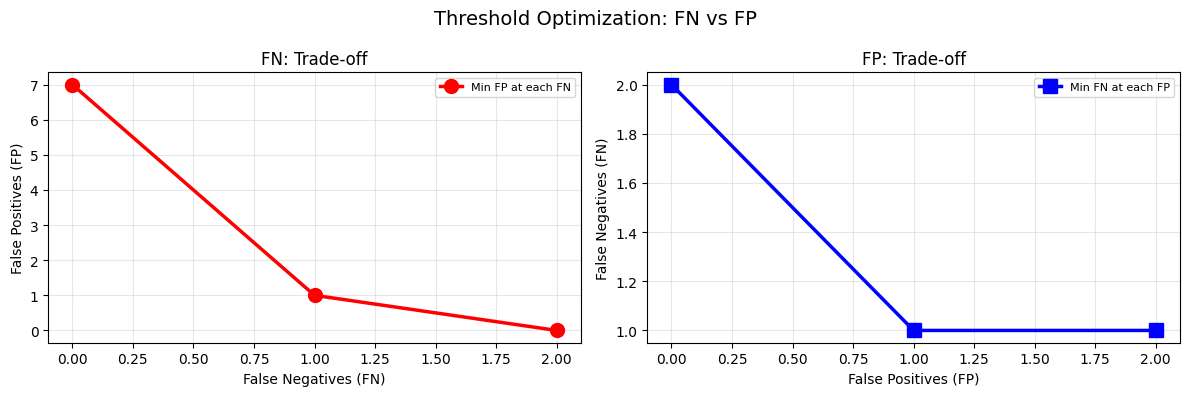

In [285]:
threshold_optimization(best_lr, X_test_t, y_test, 'lr')

In [286]:
# logistic regression with l2 regularization
from sklearn.model_selection import StratifiedKFold

ridge = LogisticRegression(
    penalty= 'l2',
    solver= 'lbfgs',
    max_iter= 1000,
    class_weight= 'balanced',
    random_state= 42
)

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

lr_l2, best_lr_l2 = evaluate_classifier(ridge, X_train_t, X_test_t, y_train, y_test, 'logistic regression with l2 regularization - threshold tuning', params, cv= cv, n_jobs=-1, verbose=1)

LOGISTIC REGRESSION WITH L2 REGULARIZATION - THRESHOLD TUNING
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 1}
Best CV Score (average_precision): 0.9934

ROC AUC: 0.9974
PR-AUC: 0.9962
Accuracy: 0.9825
Balanced Accuracy: 0.9813

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
[[70  1]
 [ 1 42]]


since best C came out to be 1, results are identical to logistic regression which use it by default

LR L2 REGULARIZATION AFTER HYPERPARAMETER TUNING: DUAL THRESHOLD OPTIMIZATION

Threshold-Independent Metrics:
  ROC-AUC:                      0.9974                        
  PR-AUC (Average Precision):   0.9962

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL
 FN  FP  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   7  43  64   0.121033  1.0000       0.9014    0.9247    0.9386             0.9507
  1   1  42  70   0.558083  0.9767       0.9859    0.9767    0.9825             0.9813
  2   0  41  71   0.834627  0.9535       1.0000    0.9762    0.9825             0.9767

TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL
 FP  FN  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   2  41  71   0.834627  0.9535       1.0000    0.9762    0.9825             0.9767
  1   1  42  70   0.558083  0.9767       0.9859    0.9767    0.9825             0.9813
  2   1  42  69   0.467077  0.9767       0.9718    0.9655    

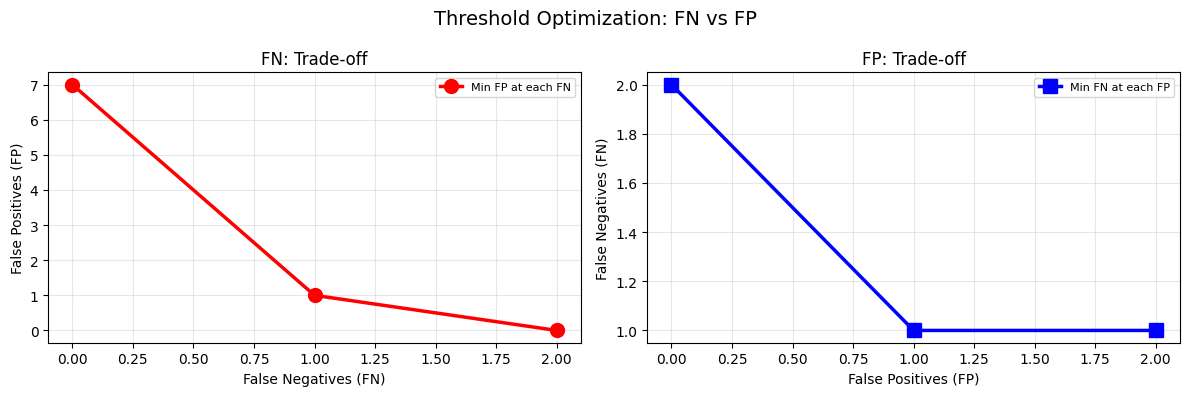

In [287]:
threshold_optimization(best_lr_l2, X_test_t, y_test, 'lr l2 regularization after hyperparameter tuning')

In [288]:
# logistic regression with l1 regularization
lasso = LogisticRegression(
    penalty= 'l1',
    solver= 'liblinear',
    max_iter=1000,
    class_weight= 'balanced',
    random_state= 42
)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

lr_l1, best_lr_l1 = evaluate_classifier(lasso, X_train_t, X_test_t, y_train, y_test, 'logistic regression with l regularization - threshold tuning', params, cv= cv, n_jobs=-1, verbose=1)


LOGISTIC REGRESSION WITH L REGULARIZATION - THRESHOLD TUNING
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 1}
Best CV Score (average_precision): 0.9918

ROC AUC: 0.9964
PR-AUC: 0.9944
Accuracy: 0.9737
Balanced Accuracy: 0.9743

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[69  2]
 [ 1 42]]


LOGISTIC REGRESSION WITH L1 REGULARIZATION AFTER HYPERPARAMETER TUNING: DUAL THRESHOLD OPTIMIZATION

Threshold-Independent Metrics:
  ROC-AUC:                      0.9964                        
  PR-AUC (Average Precision):   0.9944

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL
 FN  FP  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   6  43  65   0.144153  1.0000       0.9155    0.9348    0.9474             0.9577
  1   2  42  69   0.582834  0.9767       0.9718    0.9655    0.9737             0.9743
  2   2  41  69   0.701678  0.9535       0.9718    0.9535    0.9649             0.9627

TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL
 FP  FN  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   4  39  71   0.939198  0.9070       1.0000    0.9512    0.9649             0.9535
  1   3  40  70   0.779682  0.9302       0.9859    0.9524    0.9649             0.9581
  2   1  42  69   0.582834  0.9767     

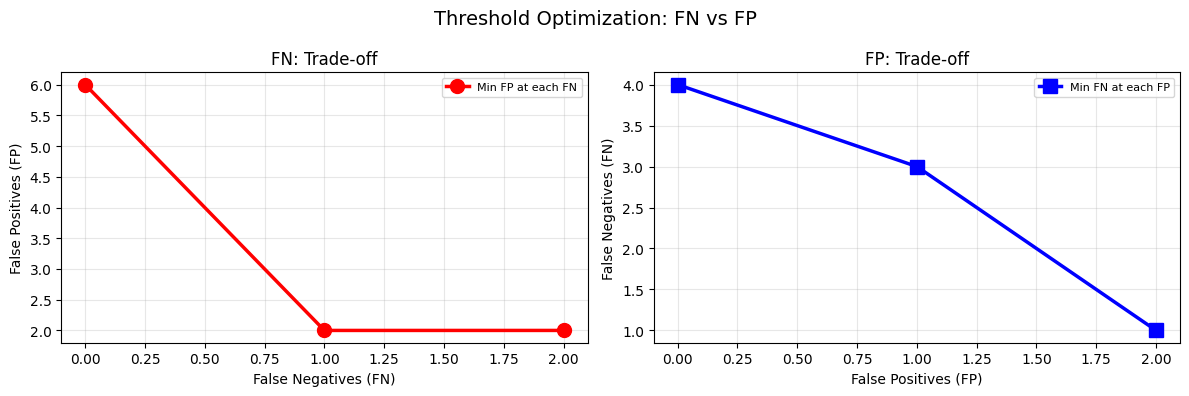

In [290]:
threshold_optimization(best_lr_l1, X_test_t, y_test, 'logistic regression with l1 regularization after hyperparameter tuning')

In [ ]:
print('='*50)
print("LASSO")
print('='*50)

lasso = LogisticRegression(
    penalty= 'l1',
    solver= 'liblinear',
    max_iter=1000,
    class_weight= 'balanced',
    random_state= 42
)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

grid = GridSearchCV(
    estimator= lasso,
    param_grid= params,
    scoring= 'average_precision',
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_t, y_train)

print(f"Best C: {grid.best_params_}")
print(f"Best CV PR-AUC: {grid.best_score_:.4f}")

best_lasso = grid.best_estimator_

y_pred = best_lasso.predict(X_test_t)
y_proba = best_lasso.predict_proba(X_test_t)[:, 1]

print(f"\nROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


LASSO
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best C: {'C': 0.1}
Best CV PR-AUC: 0.9906

ROC AUC: 0.9977
PR-AUC: 0.9963
Accuracy: 0.9737
Balanced Accuracy: 0.9743
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[69  2]
 [ 1 42]]


LASSO: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS

Threshold-Independent Metrics:
  ROC-AUC: 0.9977
  PR-AUC (Average Precision): 0.9963
  Total Test Samples: 114
  Positive Cases (disease): 43
  Negative Cases (No-disease): 71

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)
 FN  FP  TP  TN  Threshold  Sensitivity  Specificity    PPV    NPV  F1-Score  Youden_J    LR+    LR-  G-Mean    MCC    FPR  Accuracy  Balanced_Acc
  0   3  43  68   0.413908       1.0000       0.9577 0.9348 1.0000    0.9663    0.9577  23.67 0.0000  0.9786 0.9462 0.0423    0.9737        0.9789
  1   2  42  69   0.544039       0.9767       0.9718 0.9545 0.9857    0.9655    0.9486  34.67 0.0239  0.9743 0.9444 0.0282    0.9737        0.9743
  2   2  41  69   0.645935       0.9535       0.9718 0.9535 0.9718    0.9535    0.9253  33.85 0.0479  0.9626 0.9253 0.0282    0.9649        0.9627
  3   0  40  71   0.699261       0.9302       1.0000 1.0000 0.9595    0.9639    0.9302 999.99 0.0698

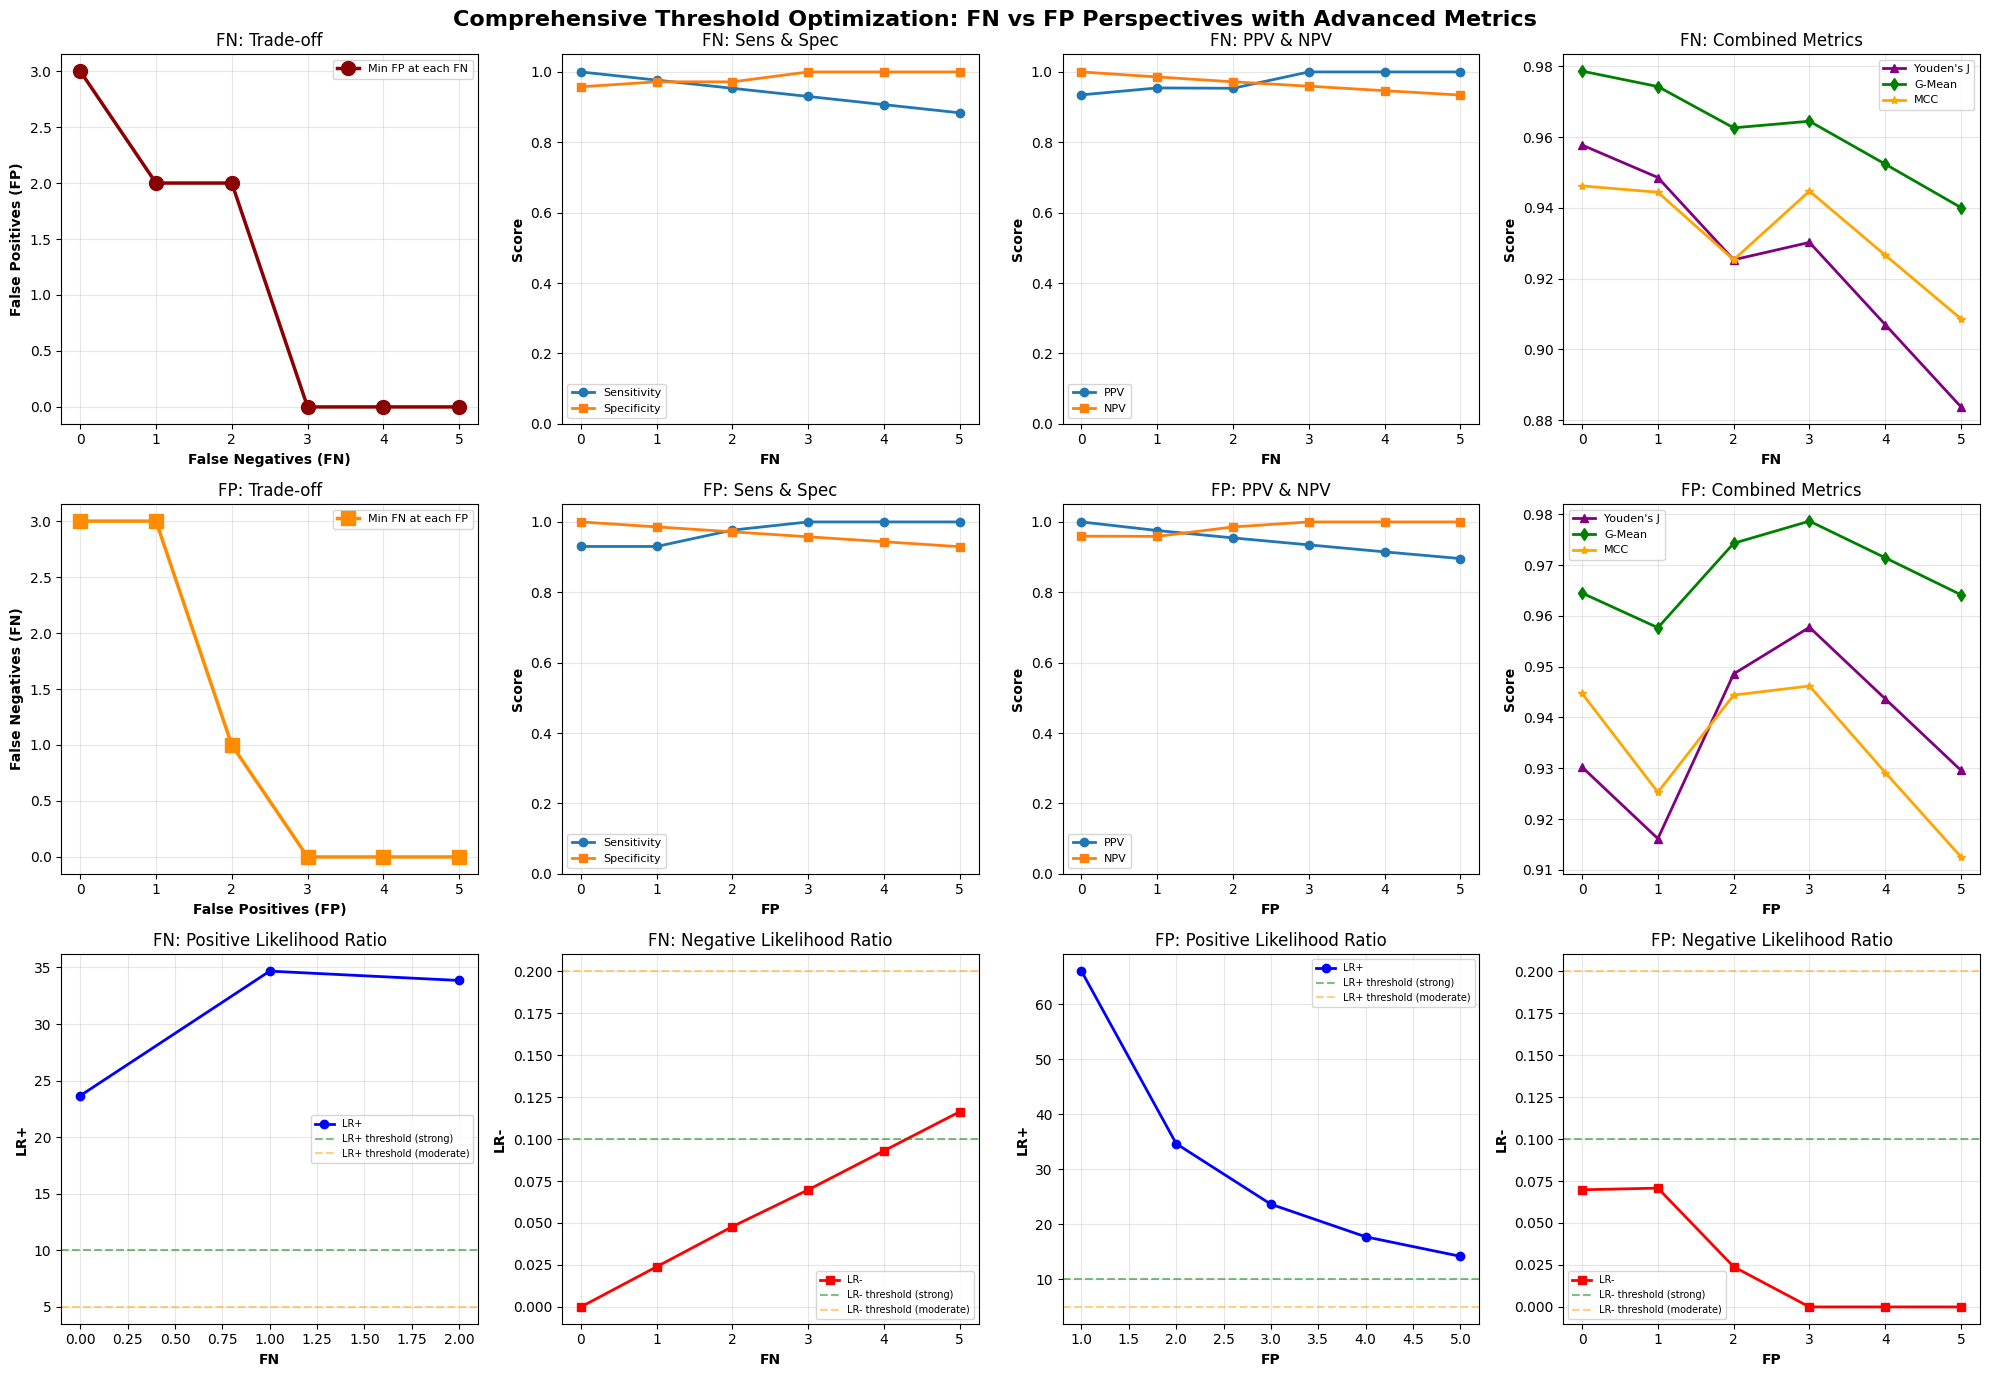

In [53]:
# ============================================================================
# DUAL THRESHOLD OPTIMIZATION WITH COMPREHENSIVE METRICS
# ============================================================================

from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score, matthews_corrcoef
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('='*100)
print("LASSO: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS")
print('='*100)

# Predicted probabilities on test set
y_proba = best_lasso.predict_proba(X_test_t)[:, 1]

# Use unique sorted thresholds from predictions
unique_thresholds = np.sort(np.unique(y_proba))

# Calculate metrics for each threshold
threshold_results = []

for threshold in unique_thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    balanced_acc = (recall + specificity) / 2
    
    youden_j = recall + specificity - 1
    
    lr_plus = recall / fpr if fpr > 0 else float('inf')
    lr_minus = fnr / specificity if specificity > 0 else float('inf')
    
    g_mean = np.sqrt(recall * specificity)
    
    mcc = matthews_corrcoef(y_test, y_pred)
    
    markedness = precision + npv - 1
    
    dor = lr_plus / lr_minus if lr_minus > 0 and not np.isinf(lr_plus) and not np.isinf(lr_minus) else np.nan
    
    threshold_results.append({
        'threshold': threshold,
        'FN': fn,
        'FP': fp,
        'TP': tp,
        'TN': tn,
        'sensitivity': recall,  # Renamed for clarity
        'specificity': specificity,
        'ppv': precision,  # Renamed from precision
        'npv': npv,
        'f1_score': f1,
        'youden_j': youden_j,
        'lr_plus': lr_plus,
        'lr_minus': lr_minus,
        'g_mean': g_mean,
        'mcc': mcc,
        'markedness': markedness,
        'dor': dor,
        'fpr': fpr,
        'fnr': fnr,
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc
    })

results_df = pd.DataFrame(threshold_results)

fpr_roc, tpr_roc, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr_roc, tpr_roc)
pr_auc = average_precision_score(y_test, y_proba)

print(f"\nThreshold-Independent Metrics:")
print(f"  ROC-AUC: {roc_auc:.4f}")
print(f"  PR-AUC (Average Precision): {pr_auc:.4f}")
print(f"  Total Test Samples: {len(y_test)}")
print(f"  Positive Cases (disease): {y_test.sum()}")
print(f"  Negative Cases (No-disease): {len(y_test) - y_test.sum()}")

# ============================================================================
# TABLE 1: MINIMUM FP AT EACH FN LEVEL (0-5)
# ============================================================================

optimal_by_fn = []
for fn_level in range(6):  # FN = 0, 1, 2, 3, 4, 5
    fn_subset = results_df[results_df['FN'] == fn_level]
    if len(fn_subset) > 0:
        best_at_fn = fn_subset.loc[fn_subset['FP'].idxmin()]
        optimal_by_fn.append(best_at_fn)

optimal_fn_df = pd.DataFrame(optimal_by_fn)

print("\n" + "="*100)
print("TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)")
print("="*100)

fn_table = optimal_fn_df[['FN', 'FP', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fn_table.columns = ['FN', 'FP', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fn_table = fn_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fn_table[['FN', 'FP', 'TP', 'TN']] = fn_table[['FN', 'FP', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fn_table = fn_table.replace([np.inf, -np.inf], 999.99)

print(fn_table.to_string(index=False))
print("="*100)

print("\nMETRIC INTERPRETATION GUIDE:")
print("  Sensitivity (Recall): % of disease cases correctly identified")
print("  Specificity: % of non-disease cases correctly identified")
print("  PPV (Precision): When test says disease, % actually having disease")
print("  NPV: When test says no disease, % actually not having disease")
print("  Youden's J: Sensitivity + Specificity - 1 (0-1, higher better, optimal threshold marker)")
print("  LR+: >10 strong evidence for disease, 5-10 moderate, <5 weak")
print("  LR-: <0.1 strong evidence against disease, 0.1-0.2 moderate, >0.2 weak")
print("  G-Mean: Geometric mean of Sensitivity & Specificity (balanced performance)")
print("  MCC: Matthews Correlation (-1 to +1, considers all CM elements)")
print("="*100)

# ============================================================================
# TABLE 2: MINIMUM FN AT EACH FP LEVEL (0-5)
# ============================================================================

optimal_by_fp = []
for fp_level in range(6):  # FP = 0, 1, 2, 3, 4, 5
    fp_subset = results_df[results_df['FP'] == fp_level]
    if len(fp_subset) > 0:
        best_at_fp = fp_subset.loc[fp_subset['FN'].idxmin()]
        optimal_by_fp.append(best_at_fp)

optimal_fp_df = pd.DataFrame(optimal_by_fp)

print("\n" + "="*100)
print("TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL (0-5)")
print("="*100)

fp_table = optimal_fp_df[['FP', 'FN', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fp_table.columns = ['FP', 'FN', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fp_table = fp_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fp_table[['FP', 'FN', 'TP', 'TN']] = fp_table[['FP', 'FN', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fp_table = fp_table.replace([np.inf, -np.inf], 999.99)

print(fp_table.to_string(index=False))
print("="*100)

# ============================================================================
# FIND OPTIMAL THRESHOLDS BASED ON DIFFERENT CRITERIA
# ============================================================================

print("\n" + "="*100)
print("OPTIMAL THRESHOLD RECOMMENDATIONS")
print("="*100)

# 1. Maximum Youden's Index (best balance of Sens + Spec)
best_youden = results_df.loc[results_df['youden_j'].idxmax()]
print(f"\n1. MAXIMUM YOUDEN'S INDEX (Best Sens+Spec Balance):")
print(f"   Threshold: {best_youden['threshold']:.6f}")
print(f"   Youden's J: {best_youden['youden_j']:.4f}")
print(f"   Sensitivity: {best_youden['sensitivity']:.1%}, Specificity: {best_youden['specificity']:.1%}")
print(f"   FN={int(best_youden['FN'])}, FP={int(best_youden['FP'])}")
print(f"   PPV: {best_youden['ppv']:.1%}, NPV: {best_youden['npv']:.1%}")
print(f"   LR+: {best_youden['lr_plus']:.2f}, LR-: {best_youden['lr_minus']:.4f}")
print(f"   → Use for: General screening with balanced sensitivity/specificity")

# 2. Maximum G-Mean
best_gmean = results_df.loc[results_df['g_mean'].idxmax()]
print(f"\n2. MAXIMUM G-MEAN (Geometric Balance):")
print(f"   Threshold: {best_gmean['threshold']:.6f}")
print(f"   G-Mean: {best_gmean['g_mean']:.4f}")
print(f"   Sensitivity: {best_gmean['sensitivity']:.1%}, Specificity: {best_gmean['specificity']:.1%}")
print(f"   FN={int(best_gmean['FN'])}, FP={int(best_gmean['FP'])}")
print(f"   → Use for: Imbalanced datasets requiring geometric balance")

# 3. Maximum MCC
best_mcc = results_df.loc[results_df['mcc'].idxmax()]
print(f"\n3. MAXIMUM MCC (Overall Best Classifier):")
print(f"   Threshold: {best_mcc['threshold']:.6f}")
print(f"   MCC: {best_mcc['mcc']:.4f}")
print(f"   Sensitivity: {best_mcc['sensitivity']:.1%}, Specificity: {best_mcc['specificity']:.1%}")
print(f"   FN={int(best_mcc['FN'])}, FP={int(best_mcc['FP'])}")
print(f"   → Use for: Overall best classification performance")

# 4. Best from FN Table 1 (excluding FN=0)
if len(optimal_fn_df) > 1:
    fn_valid = optimal_fn_df[optimal_fn_df['FN'] > 0]
    if len(fn_valid) > 0:
        best_fn_youden = fn_valid.loc[fn_valid['youden_j'].idxmax()]
        print(f"\n4. BEST FROM FN PERSPECTIVE (FN=1-5, Highest Youden):")
        print(f"   Threshold: {best_fn_youden['threshold']:.6f}")
        print(f"   FN={int(best_fn_youden['FN'])}, FP={int(best_fn_youden['FP'])}")
        print(f"   Youden's J: {best_fn_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fn_youden['sensitivity']:.1%}, Specificity: {best_fn_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize missed cases while maintaining balance")

# 5. Best from FP Table 2
if len(optimal_fp_df) > 0:
    fp_valid = optimal_fp_df[optimal_fp_df['FP'] > 0]
    if len(fp_valid) > 0:
        best_fp_youden = fp_valid.loc[fp_valid['youden_j'].idxmax()]
        print(f"\n5. BEST FROM FP PERSPECTIVE (FP=1-5, Highest Youden):")
        print(f"   Threshold: {best_fp_youden['threshold']:.6f}")
        print(f"   FP={int(best_fp_youden['FP'])}, FN={int(best_fp_youden['FN'])}")
        print(f"   Youden's J: {best_fp_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fp_youden['sensitivity']:.1%}, Specificity: {best_fp_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize false alarms while maintaining balance")

# 6. High Sensitivity (>95%) with best Specificity
high_sens = results_df[results_df['sensitivity'] >= 0.95]
if len(high_sens) > 0:
    best_high_sens = high_sens.loc[high_sens['specificity'].idxmax()]
    print(f"\n6. HIGH SENSITIVITY PRIORITY (Sens ≥95%, Best Spec):")
    print(f"   Threshold: {best_high_sens['threshold']:.6f}")
    print(f"   Sensitivity: {best_high_sens['sensitivity']:.1%}, Specificity: {best_high_sens['specificity']:.1%}")
    print(f"   FN={int(best_high_sens['FN'])}, FP={int(best_high_sens['FP'])}")
    print(f"   NPV: {best_high_sens['npv']:.1%}")
    print(f"   → Use for: Screening where missing disease cases is unacceptable")

# 7. High Specificity (>95%) with best Sensitivity
high_spec = results_df[results_df['specificity'] >= 0.95]
if len(high_spec) > 0:
    best_high_spec = high_spec.loc[high_spec['sensitivity'].idxmax()]
    print(f"\n7. HIGH SPECIFICITY PRIORITY (Spec ≥95%, Best Sens):")
    print(f"   Threshold: {best_high_spec['threshold']:.6f}")
    print(f"   Specificity: {best_high_spec['specificity']:.1%}, Sensitivity: {best_high_spec['sensitivity']:.1%}")
    print(f"   FP={int(best_high_spec['FP'])}, FN={int(best_high_spec['FN'])}")
    print(f"   PPV: {best_high_spec['ppv']:.1%}")
    print(f"   → Use for: Confirmatory testing, avoiding false alarms")

print("="*100)

# ============================================================================
# ENHANCED VISUALIZATION
# ============================================================================

fig = plt.figure(figsize=(20, 14))
fig.suptitle('Comprehensive Threshold Optimization: FN vs FP Perspectives with Advanced Metrics', 
             fontsize=16, fontweight='bold')

# Row 1: FN Perspective
ax1 = plt.subplot(3, 4, 1)
ax1.plot(optimal_fn_df['FN'], optimal_fn_df['FP'], marker='o', linewidth=2.5, 
         markersize=10, color='darkred', label='Min FP at each FN')
ax1.set_xlabel('False Negatives (FN)', fontweight='bold')
ax1.set_ylabel('False Positives (FP)', fontweight='bold')
ax1.set_title('FN: Trade-off')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=8)

ax2 = plt.subplot(3, 4, 2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax2.set_xlabel('FN', fontweight='bold')
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_title('FN: Sens & Spec')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.05])

ax3 = plt.subplot(3, 4, 3)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['ppv'], marker='o', label='PPV', linewidth=2)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['npv'], marker='s', label='NPV', linewidth=2)
ax3.set_xlabel('FN', fontweight='bold')
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_title('FN: PPV & NPV')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 1.05])

ax4 = plt.subplot(3, 4, 4)
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax4.set_xlabel('FN', fontweight='bold')
ax4.set_ylabel('Score', fontweight='bold')
ax4.set_title('FN: Combined Metrics')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

# Row 2: FP Perspective
ax5 = plt.subplot(3, 4, 5)
ax5.plot(optimal_fp_df['FP'], optimal_fp_df['FN'], marker='s', linewidth=2.5, 
         markersize=10, color='darkorange', label='Min FN at each FP')
ax5.set_xlabel('False Positives (FP)', fontweight='bold')
ax5.set_ylabel('False Negatives (FN)', fontweight='bold')
ax5.set_title('FP: Trade-off')
ax5.grid(True, alpha=0.3)
ax5.legend(fontsize=8)

ax6 = plt.subplot(3, 4, 6)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax6.set_xlabel('FP', fontweight='bold')
ax6.set_ylabel('Score', fontweight='bold')
ax6.set_title('FP: Sens & Spec')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3)
ax6.set_ylim([0, 1.05])

ax7 = plt.subplot(3, 4, 7)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['ppv'], marker='o', label='PPV', linewidth=2)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['npv'], marker='s', label='NPV', linewidth=2)
ax7.set_xlabel('FP', fontweight='bold')
ax7.set_ylabel('Score', fontweight='bold')
ax7.set_title('FP: PPV & NPV')
ax7.legend(fontsize=8)
ax7.grid(True, alpha=0.3)
ax7.set_ylim([0, 1.05])

ax8 = plt.subplot(3, 4, 8)
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax8.set_xlabel('FP', fontweight='bold')
ax8.set_ylabel('Score', fontweight='bold')
ax8.set_title('FP: Combined Metrics')
ax8.legend(fontsize=8)
ax8.grid(True, alpha=0.3)

# Row 3: Likelihood Ratios and Combined
ax9 = plt.subplot(3, 4, 9)
# Filter out infinite values for plotting
fn_lr = optimal_fn_df[optimal_fn_df['lr_plus'] < 100].copy()
if len(fn_lr) > 0:
    ax9.plot(fn_lr['FN'], fn_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax9.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax9.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax9.set_xlabel('FN', fontweight='bold')
ax9.set_ylabel('LR+', fontweight='bold')
ax9.set_title('FN: Positive Likelihood Ratio')
ax9.legend(fontsize=7)
ax9.grid(True, alpha=0.3)

ax10 = plt.subplot(3, 4, 10)
ax10.plot(optimal_fn_df['FN'], optimal_fn_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax10.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax10.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax10.set_xlabel('FN', fontweight='bold')
ax10.set_ylabel('LR-', fontweight='bold')
ax10.set_title('FN: Negative Likelihood Ratio')
ax10.legend(fontsize=7)
ax10.grid(True, alpha=0.3)

ax11 = plt.subplot(3, 4, 11)
fp_lr = optimal_fp_df[optimal_fp_df['lr_plus'] < 100].copy()
if len(fp_lr) > 0:
    ax11.plot(fp_lr['FP'], fp_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax11.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax11.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax11.set_xlabel('FP', fontweight='bold')
ax11.set_ylabel('LR+', fontweight='bold')
ax11.set_title('FP: Positive Likelihood Ratio')
ax11.legend(fontsize=7)
ax11.grid(True, alpha=0.3)

ax12 = plt.subplot(3, 4, 12)
ax12.plot(optimal_fp_df['FP'], optimal_fp_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax12.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax12.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax12.set_xlabel('FP', fontweight='bold')
ax12.set_ylabel('LR-', fontweight='bold')
ax12.set_title('FP: Negative Likelihood Ratio')
ax12.legend(fontsize=7)
ax12.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [293]:
# FEATURE SELECTION
print("\n" + "="*50)
print("LASSO FEATURE SELECTION")
print("="*50)

feature_names = list(X_train.columns)

coefs = best_lr_l1.coef_[0]

# Separate selected (non-zero) and eliminated (zero) features
selected_features = [(name, coef) for name, coef in zip(feature_names, coefs) if coef != 0]
eliminated_features = [name for name, coef in zip(feature_names, coefs) if coef == 0]

print(f"\nSELECTED FEATURES: {len(selected_features)} out of {len(feature_names)}")
print(f"ELIMINATED FEATURES: {len(eliminated_features)} out of {len(feature_names)}")

print("\n=== Selected Features (Non-Zero Coefficients) ===")
# Sort by absolute coefficient value
selected_sorted = sorted(selected_features, key=lambda x: abs(x[1]), reverse=True)
for name, coef in selected_sorted:
    print(f"{name.ljust(30)}: {coef:+.4f}")

if eliminated_features:
    print(f"\n=== Eliminated Features (Zero Coefficients) ===")
    for name in eliminated_features:
        print(f"{name.ljust(30)}: 0.0000 (not used)")


LASSO FEATURE SELECTION

SELECTED FEATURES: 16 out of 30
ELIMINATED FEATURES: 14 out of 30

=== Selected Features (Non-Zero Coefficients) ===
worst radius                  : +3.1401
radius error                  : +2.5872
mean concave points           : +2.3968
worst texture                 : +1.8341
worst concavity               : +1.3149
worst symmetry                : +1.1066
compactness error             : -0.8443
symmetry error                : -0.5037
smoothness error              : +0.4272
fractal dimension error       : -0.3006
texture error                 : -0.2992
worst concave points          : +0.2426
mean compactness              : -0.2056
mean symmetry                 : -0.1249
worst smoothness              : +0.1099
worst area                    : +0.0358

=== Eliminated Features (Zero Coefficients) ===
mean radius                   : 0.0000 (not used)
mean texture                  : 0.0000 (not used)
mean perimeter                : 0.0000 (not used)
mean area         

In [54]:
# FEATURE SELECTION
print("\n" + "="*50)
print("LASSO FEATURE SELECTION")
print("="*50)

feature_names = list(X_train.columns)

coefs = best_lasso.coef_[0]

# Separate selected (non-zero) and eliminated (zero) features
selected_features = [(name, coef) for name, coef in zip(feature_names, coefs) if coef != 0]
eliminated_features = [name for name, coef in zip(feature_names, coefs) if coef == 0]

print(f"\nSELECTED FEATURES: {len(selected_features)} out of {len(feature_names)}")
print(f"ELIMINATED FEATURES: {len(eliminated_features)} out of {len(feature_names)}")

print("\n=== Selected Features (Non-Zero Coefficients) ===")
# Sort by absolute coefficient value
selected_sorted = sorted(selected_features, key=lambda x: abs(x[1]), reverse=True)
for name, coef in selected_sorted:
    print(f"{name.ljust(30)}: {coef:+.4f}")

if eliminated_features:
    print(f"\n=== Eliminated Features (Zero Coefficients) ===")
    for name in eliminated_features:
        print(f"{name.ljust(30)}: 0.0000 (not used)")


LASSO FEATURE SELECTION

SELECTED FEATURES: 8 out of 30
ELIMINATED FEATURES: 22 out of 30

=== Selected Features (Non-Zero Coefficients) ===
worst radius                  : +2.0454
mean concave points           : +0.9068
worst texture                 : +0.7261
worst concave points          : +0.5519
radius error                  : +0.3382
worst symmetry                : +0.2201
worst smoothness              : +0.1578
worst concavity               : +0.0501

=== Eliminated Features (Zero Coefficients) ===
mean radius                   : 0.0000 (not used)
mean texture                  : 0.0000 (not used)
mean perimeter                : 0.0000 (not used)
mean area                     : 0.0000 (not used)
mean smoothness               : 0.0000 (not used)
mean compactness              : 0.0000 (not used)
mean concavity                : 0.0000 (not used)
mean symmetry                 : 0.0000 (not used)
mean fractal dimension        : 0.0000 (not used)
texture error                 : 0.0000 

In [55]:
print('='*50)
print('ELASTICNET')
print('='*50)

elastic = LogisticRegression(
    penalty= 'elasticnet',
    solver= 'saga',
    max_iter= 1000,
    class_weight= 'balanced',
    random_state= 42
)

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

cv = StratifiedKFold(
    n_splits= 5, shuffle= True, random_state= 42
)

grid = GridSearchCV(
    estimator= elastic,
    param_grid= params,
    scoring= 'average_precision',
    cv= cv,
    n_jobs= -1,
    verbose= 1
)


grid.fit(X_train_t, y_train)

print(f"\nBest params: {grid.best_params_}")
print(f"Best CV PR-AUC: {grid.best_score_:.4f}")

best_elastic = grid.best_estimator_

y_pred = best_elastic.predict(X_test_t)
y_proba = best_elastic.predict_proba(X_test_t)[:, 1]

print(f"\nROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


ELASTICNET
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best params: {'C': 1, 'l1_ratio': 0.3}
Best CV PR-AUC: 0.9938

ROC AUC: 0.9974
PR-AUC: 0.9962
Accuracy: 0.9825
Balanced Accuracy: 0.9813
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[70  1]
 [ 1 42]]


ELASTICNET: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS

Threshold-Independent Metrics:
  ROC-AUC: 0.9974
  PR-AUC (Average Precision): 0.9962
  Total Test Samples: 114
  Positive Cases (disease): 43
  Negative Cases (No-disease): 71

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)
 FN  FP  TP  TN  Threshold  Sensitivity  Specificity    PPV    NPV  F1-Score  Youden_J    LR+    LR-  G-Mean    MCC    FPR  Accuracy  Balanced_Acc
  0   7  43  64   0.115244       1.0000       0.9014 0.8600 1.0000    0.9247    0.9014  10.14 0.0000  0.9494 0.8805 0.0986    0.9386        0.9507
  1   1  42  70   0.567648       0.9767       0.9859 0.9767 0.9859    0.9767    0.9627  69.35 0.0236  0.9813 0.9627 0.0141    0.9825        0.9813
  2   0  41  71   0.834081       0.9535       1.0000 1.0000 0.9726    0.9762    0.9535 999.99 0.0465  0.9765 0.9630 0.0000    0.9825        0.9767
  3   0  40  71   0.855280       0.9302       1.0000 1.0000 0.9595    0.9639    0.9302 999.99 0

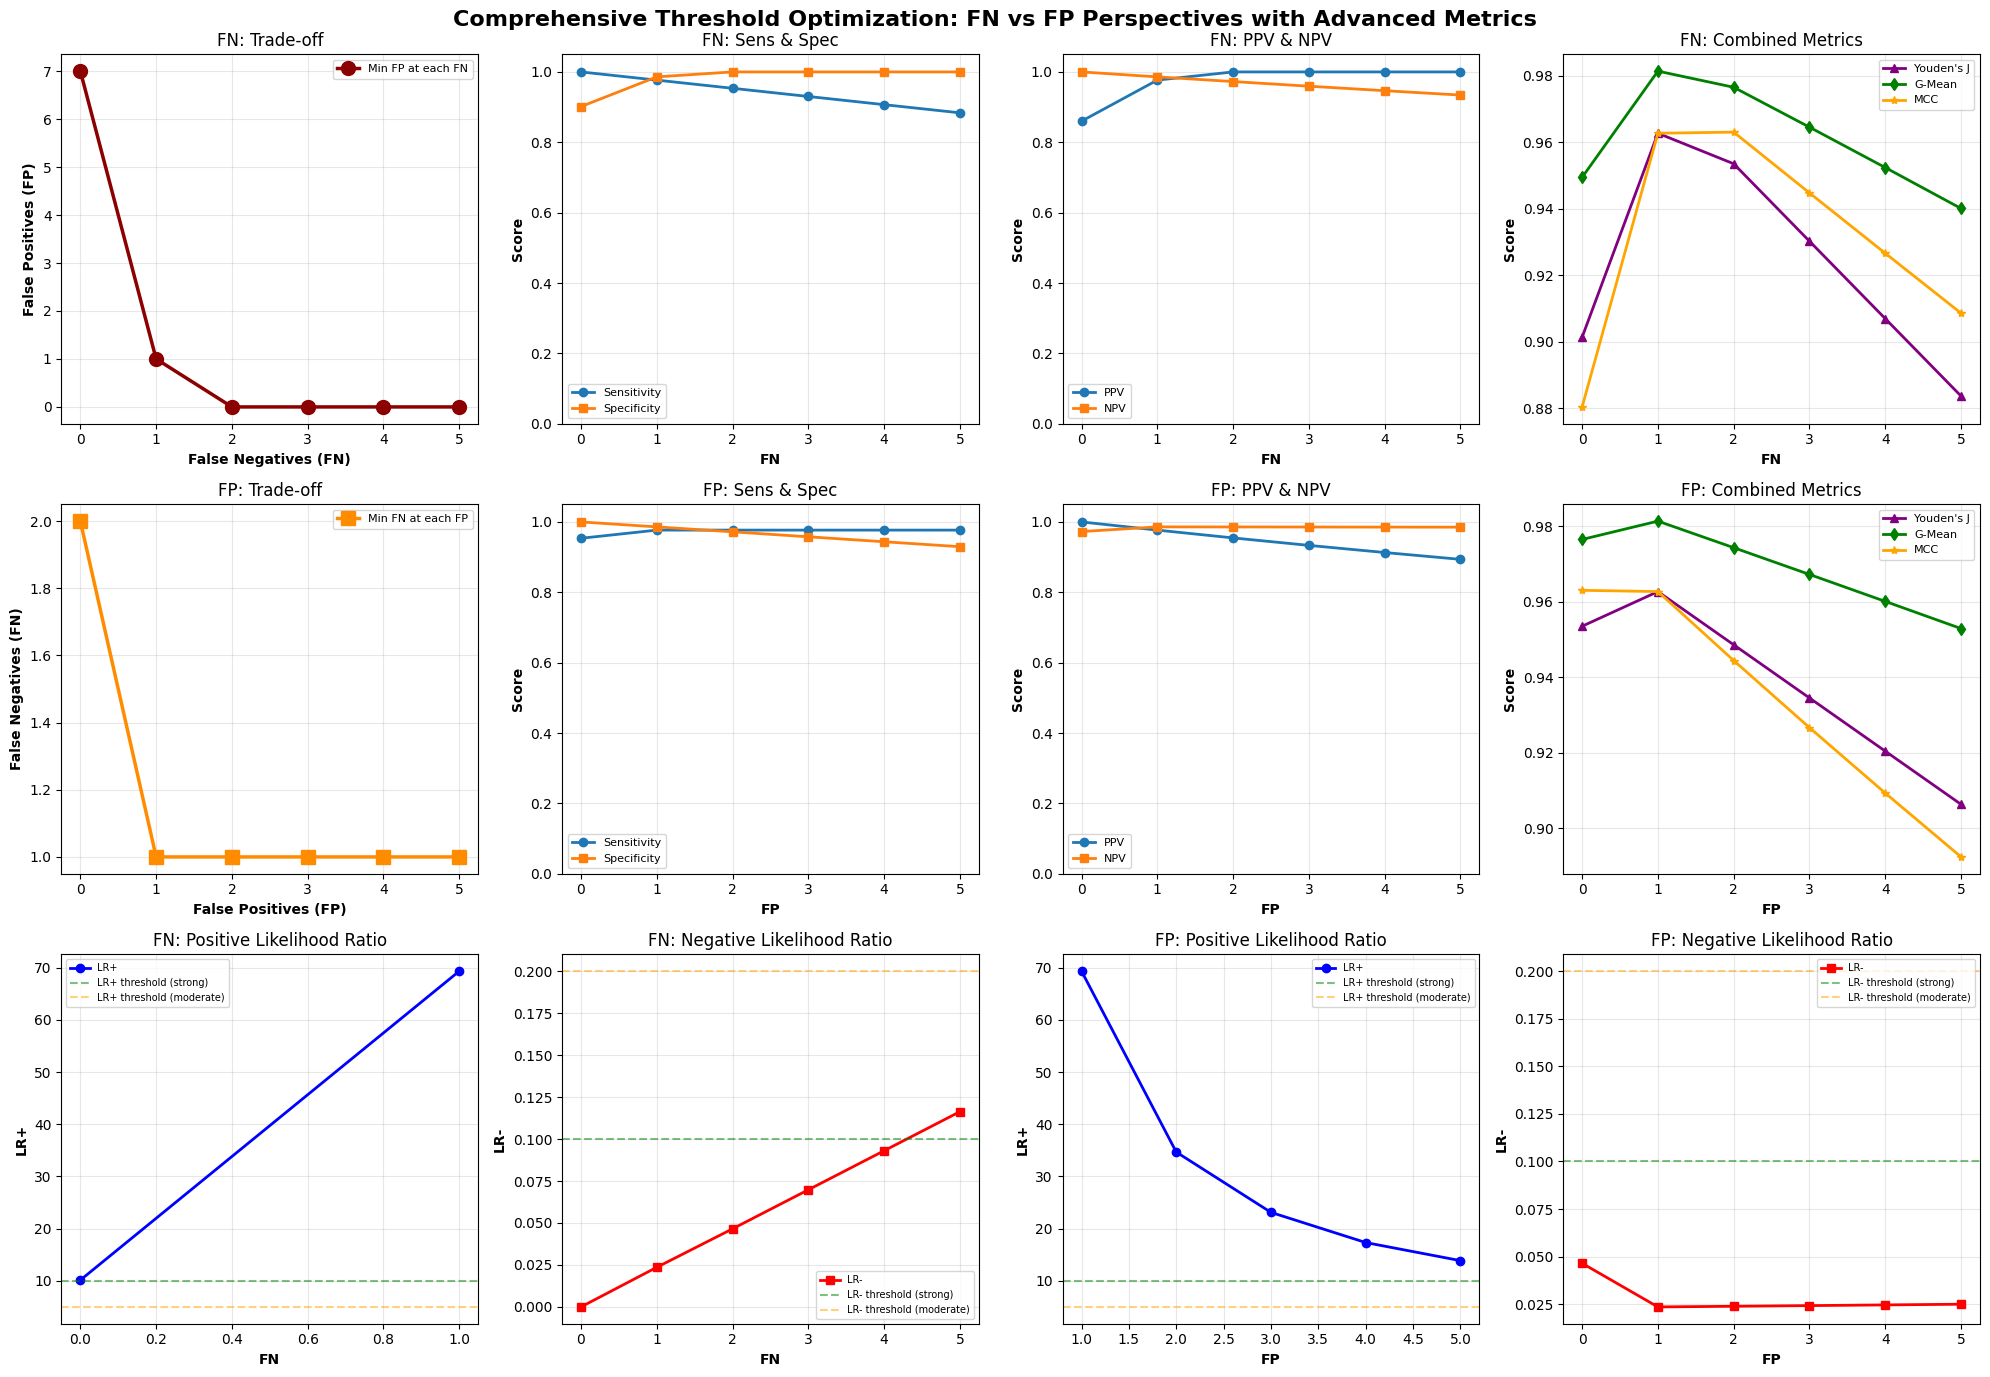

In [56]:
# ============================================================================
# DUAL THRESHOLD OPTIMIZATION WITH COMPREHENSIVE METRICS
# ============================================================================

from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score, matthews_corrcoef
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('='*100)
print("ELASTICNET: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS")
print('='*100)

# Predicted probabilities on test set
y_proba = best_elastic.predict_proba(X_test_t)[:, 1]

# Use unique sorted thresholds from predictions
unique_thresholds = np.sort(np.unique(y_proba))

# Calculate metrics for each threshold
threshold_results = []

for threshold in unique_thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    balanced_acc = (recall + specificity) / 2
    
    youden_j = recall + specificity - 1
    
    lr_plus = recall / fpr if fpr > 0 else float('inf')
    lr_minus = fnr / specificity if specificity > 0 else float('inf')
    
    g_mean = np.sqrt(recall * specificity)
    
    mcc = matthews_corrcoef(y_test, y_pred)
    
    markedness = precision + npv - 1
    
    dor = lr_plus / lr_minus if lr_minus > 0 and not np.isinf(lr_plus) and not np.isinf(lr_minus) else np.nan
    
    threshold_results.append({
        'threshold': threshold,
        'FN': fn,
        'FP': fp,
        'TP': tp,
        'TN': tn,
        'sensitivity': recall,  # Renamed for clarity
        'specificity': specificity,
        'ppv': precision,  # Renamed from precision
        'npv': npv,
        'f1_score': f1,
        'youden_j': youden_j,
        'lr_plus': lr_plus,
        'lr_minus': lr_minus,
        'g_mean': g_mean,
        'mcc': mcc,
        'markedness': markedness,
        'dor': dor,
        'fpr': fpr,
        'fnr': fnr,
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc
    })

results_df = pd.DataFrame(threshold_results)

fpr_roc, tpr_roc, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr_roc, tpr_roc)
pr_auc = average_precision_score(y_test, y_proba)

print(f"\nThreshold-Independent Metrics:")
print(f"  ROC-AUC: {roc_auc:.4f}")
print(f"  PR-AUC (Average Precision): {pr_auc:.4f}")
print(f"  Total Test Samples: {len(y_test)}")
print(f"  Positive Cases (disease): {y_test.sum()}")
print(f"  Negative Cases (No-disease): {len(y_test) - y_test.sum()}")

# ============================================================================
# TABLE 1: MINIMUM FP AT EACH FN LEVEL (0-5)
# ============================================================================

optimal_by_fn = []
for fn_level in range(6):  # FN = 0, 1, 2, 3, 4, 5
    fn_subset = results_df[results_df['FN'] == fn_level]
    if len(fn_subset) > 0:
        best_at_fn = fn_subset.loc[fn_subset['FP'].idxmin()]
        optimal_by_fn.append(best_at_fn)

optimal_fn_df = pd.DataFrame(optimal_by_fn)

print("\n" + "="*100)
print("TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)")
print("="*100)

fn_table = optimal_fn_df[['FN', 'FP', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fn_table.columns = ['FN', 'FP', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fn_table = fn_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fn_table[['FN', 'FP', 'TP', 'TN']] = fn_table[['FN', 'FP', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fn_table = fn_table.replace([np.inf, -np.inf], 999.99)

print(fn_table.to_string(index=False))
print("="*100)

print("\nMETRIC INTERPRETATION GUIDE:")
print("  Sensitivity (Recall): % of disease cases correctly identified")
print("  Specificity: % of non-disease cases correctly identified")
print("  PPV (Precision): When test says disease, % actually having disease")
print("  NPV: When test says no disease, % actually not having disease")
print("  Youden's J: Sensitivity + Specificity - 1 (0-1, higher better, optimal threshold marker)")
print("  LR+: >10 strong evidence for disease, 5-10 moderate, <5 weak")
print("  LR-: <0.1 strong evidence against disease, 0.1-0.2 moderate, >0.2 weak")
print("  G-Mean: Geometric mean of Sensitivity & Specificity (balanced performance)")
print("  MCC: Matthews Correlation (-1 to +1, considers all CM elements)")
print("="*100)

# ============================================================================
# TABLE 2: MINIMUM FN AT EACH FP LEVEL (0-5)
# ============================================================================

optimal_by_fp = []
for fp_level in range(6):  # FP = 0, 1, 2, 3, 4, 5
    fp_subset = results_df[results_df['FP'] == fp_level]
    if len(fp_subset) > 0:
        best_at_fp = fp_subset.loc[fp_subset['FN'].idxmin()]
        optimal_by_fp.append(best_at_fp)

optimal_fp_df = pd.DataFrame(optimal_by_fp)

print("\n" + "="*100)
print("TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL (0-5)")
print("="*100)

fp_table = optimal_fp_df[['FP', 'FN', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fp_table.columns = ['FP', 'FN', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fp_table = fp_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fp_table[['FP', 'FN', 'TP', 'TN']] = fp_table[['FP', 'FN', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fp_table = fp_table.replace([np.inf, -np.inf], 999.99)

print(fp_table.to_string(index=False))
print("="*100)

# ============================================================================
# FIND OPTIMAL THRESHOLDS BASED ON DIFFERENT CRITERIA
# ============================================================================

print("\n" + "="*100)
print("OPTIMAL THRESHOLD RECOMMENDATIONS")
print("="*100)

# 1. Maximum Youden's Index (best balance of Sens + Spec)
best_youden = results_df.loc[results_df['youden_j'].idxmax()]
print(f"\n1. MAXIMUM YOUDEN'S INDEX (Best Sens+Spec Balance):")
print(f"   Threshold: {best_youden['threshold']:.6f}")
print(f"   Youden's J: {best_youden['youden_j']:.4f}")
print(f"   Sensitivity: {best_youden['sensitivity']:.1%}, Specificity: {best_youden['specificity']:.1%}")
print(f"   FN={int(best_youden['FN'])}, FP={int(best_youden['FP'])}")
print(f"   PPV: {best_youden['ppv']:.1%}, NPV: {best_youden['npv']:.1%}")
print(f"   LR+: {best_youden['lr_plus']:.2f}, LR-: {best_youden['lr_minus']:.4f}")
print(f"   → Use for: General screening with balanced sensitivity/specificity")

# 2. Maximum G-Mean
best_gmean = results_df.loc[results_df['g_mean'].idxmax()]
print(f"\n2. MAXIMUM G-MEAN (Geometric Balance):")
print(f"   Threshold: {best_gmean['threshold']:.6f}")
print(f"   G-Mean: {best_gmean['g_mean']:.4f}")
print(f"   Sensitivity: {best_gmean['sensitivity']:.1%}, Specificity: {best_gmean['specificity']:.1%}")
print(f"   FN={int(best_gmean['FN'])}, FP={int(best_gmean['FP'])}")
print(f"   → Use for: Imbalanced datasets requiring geometric balance")

# 3. Maximum MCC
best_mcc = results_df.loc[results_df['mcc'].idxmax()]
print(f"\n3. MAXIMUM MCC (Overall Best Classifier):")
print(f"   Threshold: {best_mcc['threshold']:.6f}")
print(f"   MCC: {best_mcc['mcc']:.4f}")
print(f"   Sensitivity: {best_mcc['sensitivity']:.1%}, Specificity: {best_mcc['specificity']:.1%}")
print(f"   FN={int(best_mcc['FN'])}, FP={int(best_mcc['FP'])}")
print(f"   → Use for: Overall best classification performance")

# 4. Best from FN Table 1 (excluding FN=0)
if len(optimal_fn_df) > 1:
    fn_valid = optimal_fn_df[optimal_fn_df['FN'] > 0]
    if len(fn_valid) > 0:
        best_fn_youden = fn_valid.loc[fn_valid['youden_j'].idxmax()]
        print(f"\n4. BEST FROM FN PERSPECTIVE (FN=1-5, Highest Youden):")
        print(f"   Threshold: {best_fn_youden['threshold']:.6f}")
        print(f"   FN={int(best_fn_youden['FN'])}, FP={int(best_fn_youden['FP'])}")
        print(f"   Youden's J: {best_fn_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fn_youden['sensitivity']:.1%}, Specificity: {best_fn_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize missed cases while maintaining balance")

# 5. Best from FP Table 2
if len(optimal_fp_df) > 0:
    fp_valid = optimal_fp_df[optimal_fp_df['FP'] > 0]
    if len(fp_valid) > 0:
        best_fp_youden = fp_valid.loc[fp_valid['youden_j'].idxmax()]
        print(f"\n5. BEST FROM FP PERSPECTIVE (FP=1-5, Highest Youden):")
        print(f"   Threshold: {best_fp_youden['threshold']:.6f}")
        print(f"   FP={int(best_fp_youden['FP'])}, FN={int(best_fp_youden['FN'])}")
        print(f"   Youden's J: {best_fp_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fp_youden['sensitivity']:.1%}, Specificity: {best_fp_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize false alarms while maintaining balance")

# 6. High Sensitivity (>95%) with best Specificity
high_sens = results_df[results_df['sensitivity'] >= 0.95]
if len(high_sens) > 0:
    best_high_sens = high_sens.loc[high_sens['specificity'].idxmax()]
    print(f"\n6. HIGH SENSITIVITY PRIORITY (Sens ≥95%, Best Spec):")
    print(f"   Threshold: {best_high_sens['threshold']:.6f}")
    print(f"   Sensitivity: {best_high_sens['sensitivity']:.1%}, Specificity: {best_high_sens['specificity']:.1%}")
    print(f"   FN={int(best_high_sens['FN'])}, FP={int(best_high_sens['FP'])}")
    print(f"   NPV: {best_high_sens['npv']:.1%}")
    print(f"   → Use for: Screening where missing disease cases is unacceptable")

# 7. High Specificity (>95%) with best Sensitivity
high_spec = results_df[results_df['specificity'] >= 0.95]
if len(high_spec) > 0:
    best_high_spec = high_spec.loc[high_spec['sensitivity'].idxmax()]
    print(f"\n7. HIGH SPECIFICITY PRIORITY (Spec ≥95%, Best Sens):")
    print(f"   Threshold: {best_high_spec['threshold']:.6f}")
    print(f"   Specificity: {best_high_spec['specificity']:.1%}, Sensitivity: {best_high_spec['sensitivity']:.1%}")
    print(f"   FP={int(best_high_spec['FP'])}, FN={int(best_high_spec['FN'])}")
    print(f"   PPV: {best_high_spec['ppv']:.1%}")
    print(f"   → Use for: Confirmatory testing, avoiding false alarms")

print("="*100)

# ============================================================================
# ENHANCED VISUALIZATION
# ============================================================================

fig = plt.figure(figsize=(20, 14))
fig.suptitle('Comprehensive Threshold Optimization: FN vs FP Perspectives with Advanced Metrics', 
             fontsize=16, fontweight='bold')

# Row 1: FN Perspective
ax1 = plt.subplot(3, 4, 1)
ax1.plot(optimal_fn_df['FN'], optimal_fn_df['FP'], marker='o', linewidth=2.5, 
         markersize=10, color='darkred', label='Min FP at each FN')
ax1.set_xlabel('False Negatives (FN)', fontweight='bold')
ax1.set_ylabel('False Positives (FP)', fontweight='bold')
ax1.set_title('FN: Trade-off')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=8)

ax2 = plt.subplot(3, 4, 2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax2.set_xlabel('FN', fontweight='bold')
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_title('FN: Sens & Spec')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.05])

ax3 = plt.subplot(3, 4, 3)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['ppv'], marker='o', label='PPV', linewidth=2)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['npv'], marker='s', label='NPV', linewidth=2)
ax3.set_xlabel('FN', fontweight='bold')
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_title('FN: PPV & NPV')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 1.05])

ax4 = plt.subplot(3, 4, 4)
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax4.set_xlabel('FN', fontweight='bold')
ax4.set_ylabel('Score', fontweight='bold')
ax4.set_title('FN: Combined Metrics')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

# Row 2: FP Perspective
ax5 = plt.subplot(3, 4, 5)
ax5.plot(optimal_fp_df['FP'], optimal_fp_df['FN'], marker='s', linewidth=2.5, 
         markersize=10, color='darkorange', label='Min FN at each FP')
ax5.set_xlabel('False Positives (FP)', fontweight='bold')
ax5.set_ylabel('False Negatives (FN)', fontweight='bold')
ax5.set_title('FP: Trade-off')
ax5.grid(True, alpha=0.3)
ax5.legend(fontsize=8)

ax6 = plt.subplot(3, 4, 6)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax6.set_xlabel('FP', fontweight='bold')
ax6.set_ylabel('Score', fontweight='bold')
ax6.set_title('FP: Sens & Spec')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3)
ax6.set_ylim([0, 1.05])

ax7 = plt.subplot(3, 4, 7)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['ppv'], marker='o', label='PPV', linewidth=2)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['npv'], marker='s', label='NPV', linewidth=2)
ax7.set_xlabel('FP', fontweight='bold')
ax7.set_ylabel('Score', fontweight='bold')
ax7.set_title('FP: PPV & NPV')
ax7.legend(fontsize=8)
ax7.grid(True, alpha=0.3)
ax7.set_ylim([0, 1.05])

ax8 = plt.subplot(3, 4, 8)
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax8.set_xlabel('FP', fontweight='bold')
ax8.set_ylabel('Score', fontweight='bold')
ax8.set_title('FP: Combined Metrics')
ax8.legend(fontsize=8)
ax8.grid(True, alpha=0.3)

# Row 3: Likelihood Ratios and Combined
ax9 = plt.subplot(3, 4, 9)
# Filter out infinite values for plotting
fn_lr = optimal_fn_df[optimal_fn_df['lr_plus'] < 100].copy()
if len(fn_lr) > 0:
    ax9.plot(fn_lr['FN'], fn_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax9.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax9.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax9.set_xlabel('FN', fontweight='bold')
ax9.set_ylabel('LR+', fontweight='bold')
ax9.set_title('FN: Positive Likelihood Ratio')
ax9.legend(fontsize=7)
ax9.grid(True, alpha=0.3)

ax10 = plt.subplot(3, 4, 10)
ax10.plot(optimal_fn_df['FN'], optimal_fn_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax10.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax10.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax10.set_xlabel('FN', fontweight='bold')
ax10.set_ylabel('LR-', fontweight='bold')
ax10.set_title('FN: Negative Likelihood Ratio')
ax10.legend(fontsize=7)
ax10.grid(True, alpha=0.3)

ax11 = plt.subplot(3, 4, 11)
fp_lr = optimal_fp_df[optimal_fp_df['lr_plus'] < 100].copy()
if len(fp_lr) > 0:
    ax11.plot(fp_lr['FP'], fp_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax11.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax11.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax11.set_xlabel('FP', fontweight='bold')
ax11.set_ylabel('LR+', fontweight='bold')
ax11.set_title('FP: Positive Likelihood Ratio')
ax11.legend(fontsize=7)
ax11.grid(True, alpha=0.3)

ax12 = plt.subplot(3, 4, 12)
ax12.plot(optimal_fp_df['FP'], optimal_fp_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax12.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax12.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax12.set_xlabel('FP', fontweight='bold')
ax12.set_ylabel('LR-', fontweight='bold')
ax12.set_title('FP: Negative Likelihood Ratio')
ax12.legend(fontsize=7)
ax12.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [57]:

# FEATURE SELECTION ANALYSIS
print("\n" + "="*50)
print("ELASTIC NET FEATURE SELECTION")
print("="*50)

feature_names = list(X_train.columns)
coefs = best_elastic.coef_[0]

# Separate selected (non-zero) and eliminated (near-zero) features
# Use small threshold since Elastic Net rarely gives exact zeros
threshold = 1e-5
selected_features = [(name, coef) for name, coef in zip(feature_names, coefs) if abs(coef) > threshold]
eliminated_features = [(name, coef) for name, coef in zip(feature_names, coefs) if abs(coef) <= threshold]

print(f"\nSELECTED FEATURES: {len(selected_features)} out of {len(feature_names)}")
print(f"ELIMINATED FEATURES: {len(eliminated_features)} out of {len(feature_names)}")

print("\n=== Selected Features (Non-Zero Coefficients) ===")
# Sort by absolute coefficient value
selected_sorted = sorted(selected_features, key=lambda x: abs(x[1]), reverse=True)
for name, coef in selected_sorted:
    print(f"{name.ljust(30)}: {coef:+.4f}")

if eliminated_features:
    print(f"\n=== Eliminated Features (Near-Zero Coefficients) ===")
    for name, coef in eliminated_features:
        print(f"{name.ljust(30)}: {coef:+.4f} (not used)")



ELASTIC NET FEATURE SELECTION

SELECTED FEATURES: 27 out of 30
ELIMINATED FEATURES: 3 out of 30

=== Selected Features (Non-Zero Coefficients) ===
radius error                  : +1.4482
worst texture                 : +1.4154
mean concave points           : +1.2514
worst symmetry                : +1.2118
worst radius                  : +0.9598
worst concavity               : +0.9117
area error                    : +0.9105
worst area                    : +0.8943
worst concave points          : +0.8431
compactness error             : -0.6967
mean concavity                : +0.6683
worst perimeter               : +0.5590
symmetry error                : -0.5356
perimeter error               : +0.5083
mean compactness              : -0.4973
fractal dimension error       : -0.4774
worst smoothness              : +0.4755
mean area                     : +0.3630
mean radius                   : +0.3218
mean texture                  : +0.2969
smoothness error              : +0.2870
mean perimet

# KNN

In [58]:
print('='*50)
print('KNN')
print('='*50)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, balanced_accuracy_score, average_precision_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train_t, y_train)

y_pred = knn.predict(X_test_t)
y_proba = knn.predict_proba(X_test_t)[:, 1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

KNN
ROC AUC: 0.9820
PR-AUC (AP): 0.9732
Accuracy: 0.9474
Balanced Accuracy: 0.9440
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[68  3]
 [ 3 40]]


In [59]:
print('='*50)
print('KNN HYPERPARAMETER TUNING:')
print('='*50)

from sklearn.model_selection import GridSearchCV, StratifiedKFold

knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3,5,7,9,11,15,21],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2, 3, 4, 5]
}


cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

grid = GridSearchCV(
    estimator= knn,
    param_grid= params,
    cv=cv,
    scoring='average_precision',
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_t,y_train)

print("Best KNN params:", grid.best_params_)
print("Best CV PR-AUC:", grid.best_score_)

best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test_t)
y_proba = best_knn.predict_proba(X_test_t)[:, 1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)


KNN HYPERPARAMETER TUNING:
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best KNN params: {'metric': 'minkowski', 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Best CV PR-AUC: 0.9914185678389178
ROC AUC: 0.9823
PR-AUC (AP): 0.9791
Accuracy: 0.9474
Balanced Accuracy: 0.9440
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[68  3]
 [ 3 40]]



PCA ANALYSIS
Original features: 30
PCA components: 10
Dimensionality reduction: 30 → 10 (33.3% of features)

Total variance explained: 0.9511 (95.11%)

Variance per component:
  PC1: 0.4350 (43.50%) | Cumulative: 0.4350 (43.50%)
  PC2: 0.1950 (19.50%) | Cumulative: 0.6300 (63.00%)
  PC3: 0.0978 (9.78%) | Cumulative: 0.7278 (72.78%)
  PC4: 0.0649 (6.49%) | Cumulative: 0.7927 (79.27%)
  PC5: 0.0525 (5.25%) | Cumulative: 0.8452 (84.52%)
  PC6: 0.0411 (4.11%) | Cumulative: 0.8864 (88.64%)
  PC7: 0.0224 (2.24%) | Cumulative: 0.9087 (90.87%)
  PC8: 0.0165 (1.65%) | Cumulative: 0.9252 (92.52%)
  PC9: 0.0138 (1.38%) | Cumulative: 0.9390 (93.90%)
  PC10: 0.0121 (1.21%) | Cumulative: 0.9511 (95.11%)


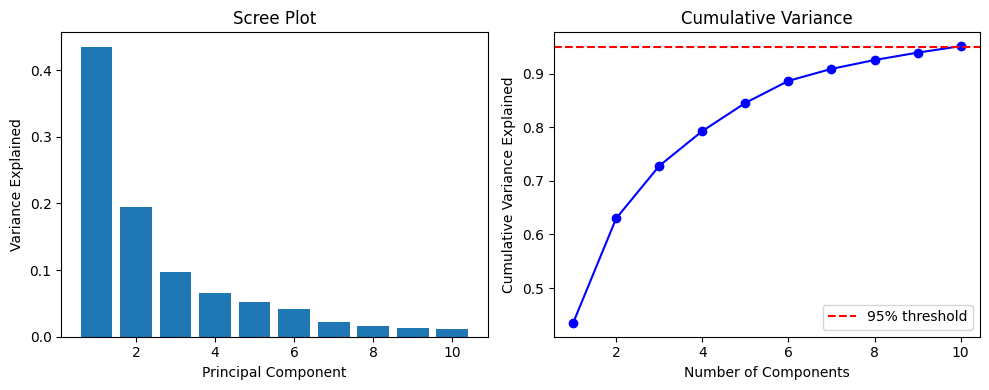

In [60]:
# doing PCA to check if there is any imporovement

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keep 95% variance
X_train_pca = pca.fit_transform(X_train_t)
X_test_pca = pca.transform(X_test_t)

print("\n" + "="*50)
print("PCA ANALYSIS")
print("="*50)

print(f"Original features: {X_train_t.shape[1]}")
print(f"PCA components: {pca.n_components_}")
print(f"Dimensionality reduction: {X_train_t.shape[1]} → {pca.n_components_} ({pca.n_components_/X_train_t.shape[1]*100:.1f}% of features)")

# Total variance explained
total_var = pca.explained_variance_ratio_.sum()
print(f"\nTotal variance explained: {total_var:.4f} ({total_var*100:.2f}%)")

# Individual component variance
print(f"\nVariance per component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    cumsum = pca.explained_variance_ratio_[:i+1].sum()
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%) | Cumulative: {cumsum:.4f} ({cumsum*100:.2f}%)")

# Scree plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(range(1, pca.n_components_+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')

plt.subplot(1, 2, 2)
plt.plot(range(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance')
plt.legend()
plt.tight_layout()
plt.show()


In [62]:
# Doing KNN again
print('='*50)
print('KNN WITH PCA HYPERPARAMETER TUNING:')
print('='*50)

from sklearn.model_selection import GridSearchCV, StratifiedKFold

knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3,5,7,9,11,15,21],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2, 3, 4, 5]
}


cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

grid = GridSearchCV(
    estimator= knn,
    param_grid= params,
    cv=cv,
    scoring='average_precision',
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_pca,y_train)

print("Best KNN params:", grid.best_params_)
print("Best CV PR-AUC:", grid.best_score_)

best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test_pca)
y_proba = best_knn.predict_proba(X_test_pca)[:, 1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)


KNN WITH PCA HYPERPARAMETER TUNING:
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best KNN params: {'metric': 'minkowski', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best CV PR-AUC: 0.9893727724141993
ROC AUC: 0.9905
PR-AUC (AP): 0.9859
Accuracy: 0.9649
Balanced Accuracy: 0.9627
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[69  2]
 [ 2 41]]


RIDGE: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS

Threshold-Independent Metrics:
  ROC-AUC: 0.9905
  PR-AUC (Average Precision): 0.9859
  Total Test Samples: 114
  Positive Cases (disease): 43
  Negative Cases (No-disease): 71

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)
 FN  FP  TP  TN  Threshold  Sensitivity  Specificity    PPV    NPV  F1-Score  Youden_J   LR+    LR-  G-Mean    MCC    FPR  Accuracy  Balanced_Acc
  0  11  43  60   0.099431       1.0000       0.8451 0.7963 1.0000    0.8866    0.8451  6.45 0.0000  0.9193 0.8203 0.1549    0.9035        0.9225
  1   8  42  63   0.124604       0.9767       0.8873 0.8400 0.9844    0.9032    0.8641  8.67 0.0262  0.9310 0.8440 0.1127    0.9211        0.9320
  2   2  41  69   0.551238       0.9535       0.9718 0.9535 0.9718    0.9535    0.9253 33.85 0.0479  0.9626 0.9253 0.0282    0.9649        0.9627
  3   2  40  69   0.569412       0.9302       0.9718 0.9524 0.9583    0.9412    0.9021 33.02 0.0718  0.9

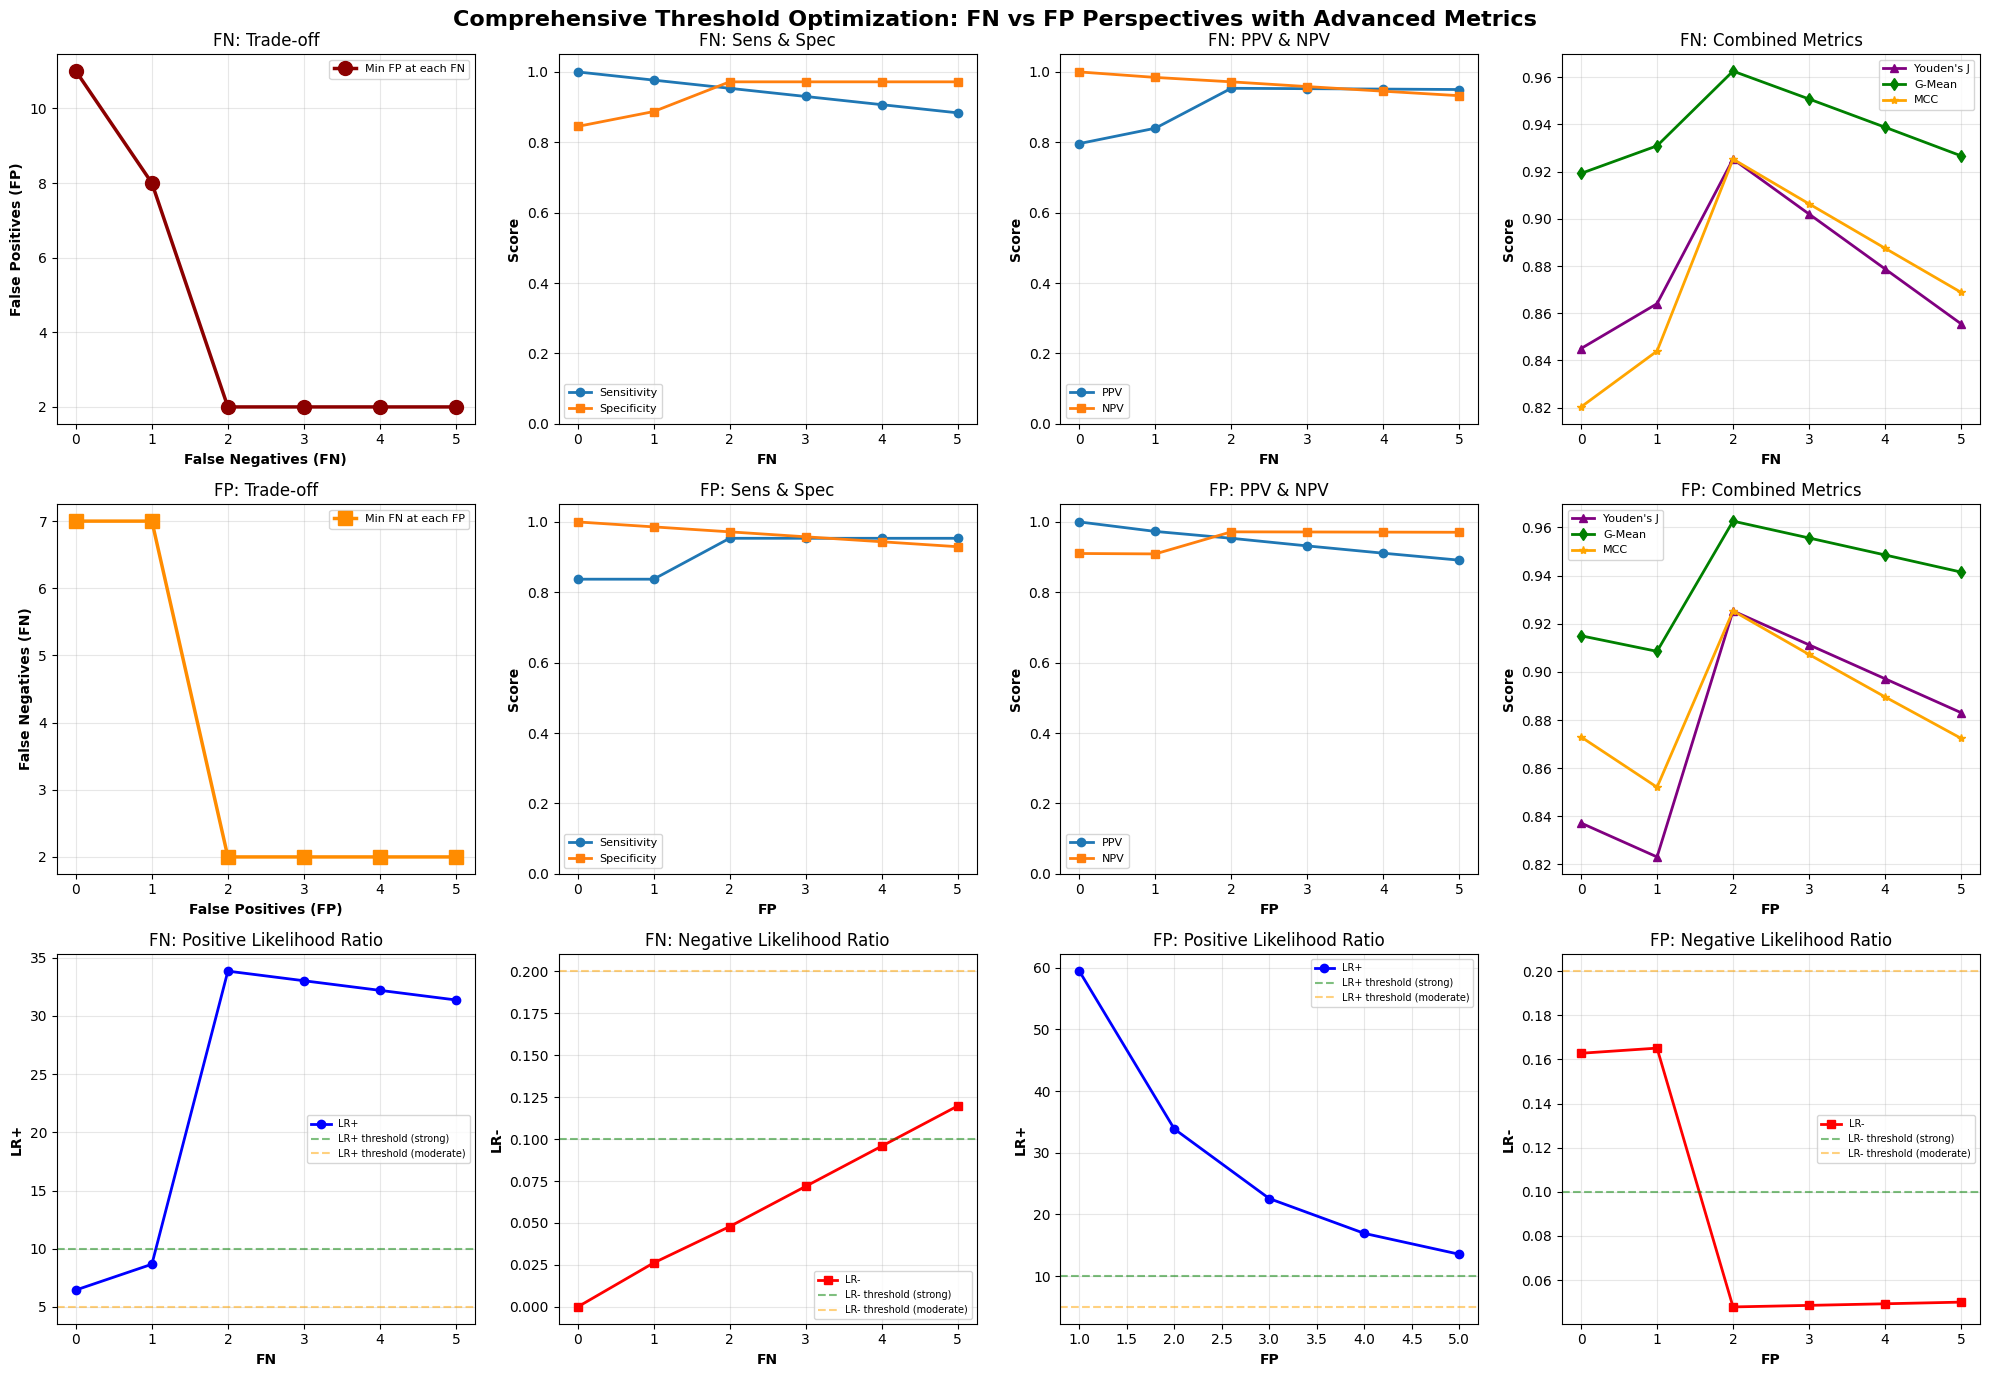

In [63]:
# ============================================================================
# DUAL THRESHOLD OPTIMIZATION WITH COMPREHENSIVE METRICS
# ============================================================================

from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score, matthews_corrcoef
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('='*100)
print("RIDGE: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS")
print('='*100)

# Predicted probabilities on test set
y_proba = best_knn.predict_proba(X_test_pca)[:, 1]

# Use unique sorted thresholds from predictions
unique_thresholds = np.sort(np.unique(y_proba))

# Calculate metrics for each threshold
threshold_results = []

for threshold in unique_thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    balanced_acc = (recall + specificity) / 2
    
    youden_j = recall + specificity - 1
    
    lr_plus = recall / fpr if fpr > 0 else float('inf')
    lr_minus = fnr / specificity if specificity > 0 else float('inf')
    
    g_mean = np.sqrt(recall * specificity)
    
    mcc = matthews_corrcoef(y_test, y_pred)
    
    markedness = precision + npv - 1
    
    dor = lr_plus / lr_minus if lr_minus > 0 and not np.isinf(lr_plus) and not np.isinf(lr_minus) else np.nan
    
    threshold_results.append({
        'threshold': threshold,
        'FN': fn,
        'FP': fp,
        'TP': tp,
        'TN': tn,
        'sensitivity': recall,  # Renamed for clarity
        'specificity': specificity,
        'ppv': precision,  # Renamed from precision
        'npv': npv,
        'f1_score': f1,
        'youden_j': youden_j,
        'lr_plus': lr_plus,
        'lr_minus': lr_minus,
        'g_mean': g_mean,
        'mcc': mcc,
        'markedness': markedness,
        'dor': dor,
        'fpr': fpr,
        'fnr': fnr,
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc
    })

results_df = pd.DataFrame(threshold_results)

fpr_roc, tpr_roc, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr_roc, tpr_roc)
pr_auc = average_precision_score(y_test, y_proba)

print(f"\nThreshold-Independent Metrics:")
print(f"  ROC-AUC: {roc_auc:.4f}")
print(f"  PR-AUC (Average Precision): {pr_auc:.4f}")
print(f"  Total Test Samples: {len(y_test)}")
print(f"  Positive Cases (disease): {y_test.sum()}")
print(f"  Negative Cases (No-disease): {len(y_test) - y_test.sum()}")

# ============================================================================
# TABLE 1: MINIMUM FP AT EACH FN LEVEL (0-5)
# ============================================================================

optimal_by_fn = []
for fn_level in range(6):  # FN = 0, 1, 2, 3, 4, 5
    fn_subset = results_df[results_df['FN'] == fn_level]
    if len(fn_subset) > 0:
        best_at_fn = fn_subset.loc[fn_subset['FP'].idxmin()]
        optimal_by_fn.append(best_at_fn)

optimal_fn_df = pd.DataFrame(optimal_by_fn)

print("\n" + "="*100)
print("TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)")
print("="*100)

fn_table = optimal_fn_df[['FN', 'FP', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fn_table.columns = ['FN', 'FP', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fn_table = fn_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fn_table[['FN', 'FP', 'TP', 'TN']] = fn_table[['FN', 'FP', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fn_table = fn_table.replace([np.inf, -np.inf], 999.99)

print(fn_table.to_string(index=False))
print("="*100)

print("\nMETRIC INTERPRETATION GUIDE:")
print("  Sensitivity (Recall): % of disease cases correctly identified")
print("  Specificity: % of non-disease cases correctly identified")
print("  PPV (Precision): When test says disease, % actually having disease")
print("  NPV: When test says no disease, % actually not having disease")
print("  Youden's J: Sensitivity + Specificity - 1 (0-1, higher better, optimal threshold marker)")
print("  LR+: >10 strong evidence for disease, 5-10 moderate, <5 weak")
print("  LR-: <0.1 strong evidence against disease, 0.1-0.2 moderate, >0.2 weak")
print("  G-Mean: Geometric mean of Sensitivity & Specificity (balanced performance)")
print("  MCC: Matthews Correlation (-1 to +1, considers all CM elements)")
print("="*100)

# ============================================================================
# TABLE 2: MINIMUM FN AT EACH FP LEVEL (0-5)
# ============================================================================

optimal_by_fp = []
for fp_level in range(6):  # FP = 0, 1, 2, 3, 4, 5
    fp_subset = results_df[results_df['FP'] == fp_level]
    if len(fp_subset) > 0:
        best_at_fp = fp_subset.loc[fp_subset['FN'].idxmin()]
        optimal_by_fp.append(best_at_fp)

optimal_fp_df = pd.DataFrame(optimal_by_fp)

print("\n" + "="*100)
print("TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL (0-5)")
print("="*100)

fp_table = optimal_fp_df[['FP', 'FN', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fp_table.columns = ['FP', 'FN', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fp_table = fp_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fp_table[['FP', 'FN', 'TP', 'TN']] = fp_table[['FP', 'FN', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fp_table = fp_table.replace([np.inf, -np.inf], 999.99)

print(fp_table.to_string(index=False))
print("="*100)

# ============================================================================
# FIND OPTIMAL THRESHOLDS BASED ON DIFFERENT CRITERIA
# ============================================================================

print("\n" + "="*100)
print("OPTIMAL THRESHOLD RECOMMENDATIONS")
print("="*100)

# 1. Maximum Youden's Index (best balance of Sens + Spec)
best_youden = results_df.loc[results_df['youden_j'].idxmax()]
print(f"\n1. MAXIMUM YOUDEN'S INDEX (Best Sens+Spec Balance):")
print(f"   Threshold: {best_youden['threshold']:.6f}")
print(f"   Youden's J: {best_youden['youden_j']:.4f}")
print(f"   Sensitivity: {best_youden['sensitivity']:.1%}, Specificity: {best_youden['specificity']:.1%}")
print(f"   FN={int(best_youden['FN'])}, FP={int(best_youden['FP'])}")
print(f"   PPV: {best_youden['ppv']:.1%}, NPV: {best_youden['npv']:.1%}")
print(f"   LR+: {best_youden['lr_plus']:.2f}, LR-: {best_youden['lr_minus']:.4f}")
print(f"   → Use for: General screening with balanced sensitivity/specificity")

# 2. Maximum G-Mean
best_gmean = results_df.loc[results_df['g_mean'].idxmax()]
print(f"\n2. MAXIMUM G-MEAN (Geometric Balance):")
print(f"   Threshold: {best_gmean['threshold']:.6f}")
print(f"   G-Mean: {best_gmean['g_mean']:.4f}")
print(f"   Sensitivity: {best_gmean['sensitivity']:.1%}, Specificity: {best_gmean['specificity']:.1%}")
print(f"   FN={int(best_gmean['FN'])}, FP={int(best_gmean['FP'])}")
print(f"   → Use for: Imbalanced datasets requiring geometric balance")

# 3. Maximum MCC
best_mcc = results_df.loc[results_df['mcc'].idxmax()]
print(f"\n3. MAXIMUM MCC (Overall Best Classifier):")
print(f"   Threshold: {best_mcc['threshold']:.6f}")
print(f"   MCC: {best_mcc['mcc']:.4f}")
print(f"   Sensitivity: {best_mcc['sensitivity']:.1%}, Specificity: {best_mcc['specificity']:.1%}")
print(f"   FN={int(best_mcc['FN'])}, FP={int(best_mcc['FP'])}")
print(f"   → Use for: Overall best classification performance")

# 4. Best from FN Table 1 (excluding FN=0)
if len(optimal_fn_df) > 1:
    fn_valid = optimal_fn_df[optimal_fn_df['FN'] > 0]
    if len(fn_valid) > 0:
        best_fn_youden = fn_valid.loc[fn_valid['youden_j'].idxmax()]
        print(f"\n4. BEST FROM FN PERSPECTIVE (FN=1-5, Highest Youden):")
        print(f"   Threshold: {best_fn_youden['threshold']:.6f}")
        print(f"   FN={int(best_fn_youden['FN'])}, FP={int(best_fn_youden['FP'])}")
        print(f"   Youden's J: {best_fn_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fn_youden['sensitivity']:.1%}, Specificity: {best_fn_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize missed cases while maintaining balance")

# 5. Best from FP Table 2
if len(optimal_fp_df) > 0:
    fp_valid = optimal_fp_df[optimal_fp_df['FP'] > 0]
    if len(fp_valid) > 0:
        best_fp_youden = fp_valid.loc[fp_valid['youden_j'].idxmax()]
        print(f"\n5. BEST FROM FP PERSPECTIVE (FP=1-5, Highest Youden):")
        print(f"   Threshold: {best_fp_youden['threshold']:.6f}")
        print(f"   FP={int(best_fp_youden['FP'])}, FN={int(best_fp_youden['FN'])}")
        print(f"   Youden's J: {best_fp_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fp_youden['sensitivity']:.1%}, Specificity: {best_fp_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize false alarms while maintaining balance")

# 6. High Sensitivity (>95%) with best Specificity
high_sens = results_df[results_df['sensitivity'] >= 0.95]
if len(high_sens) > 0:
    best_high_sens = high_sens.loc[high_sens['specificity'].idxmax()]
    print(f"\n6. HIGH SENSITIVITY PRIORITY (Sens ≥95%, Best Spec):")
    print(f"   Threshold: {best_high_sens['threshold']:.6f}")
    print(f"   Sensitivity: {best_high_sens['sensitivity']:.1%}, Specificity: {best_high_sens['specificity']:.1%}")
    print(f"   FN={int(best_high_sens['FN'])}, FP={int(best_high_sens['FP'])}")
    print(f"   NPV: {best_high_sens['npv']:.1%}")
    print(f"   → Use for: Screening where missing disease cases is unacceptable")

# 7. High Specificity (>95%) with best Sensitivity
high_spec = results_df[results_df['specificity'] >= 0.95]
if len(high_spec) > 0:
    best_high_spec = high_spec.loc[high_spec['sensitivity'].idxmax()]
    print(f"\n7. HIGH SPECIFICITY PRIORITY (Spec ≥95%, Best Sens):")
    print(f"   Threshold: {best_high_spec['threshold']:.6f}")
    print(f"   Specificity: {best_high_spec['specificity']:.1%}, Sensitivity: {best_high_spec['sensitivity']:.1%}")
    print(f"   FP={int(best_high_spec['FP'])}, FN={int(best_high_spec['FN'])}")
    print(f"   PPV: {best_high_spec['ppv']:.1%}")
    print(f"   → Use for: Confirmatory testing, avoiding false alarms")

print("="*100)

# ============================================================================
# ENHANCED VISUALIZATION
# ============================================================================

fig = plt.figure(figsize=(20, 14))
fig.suptitle('Comprehensive Threshold Optimization: FN vs FP Perspectives with Advanced Metrics', 
             fontsize=16, fontweight='bold')

# Row 1: FN Perspective
ax1 = plt.subplot(3, 4, 1)
ax1.plot(optimal_fn_df['FN'], optimal_fn_df['FP'], marker='o', linewidth=2.5, 
         markersize=10, color='darkred', label='Min FP at each FN')
ax1.set_xlabel('False Negatives (FN)', fontweight='bold')
ax1.set_ylabel('False Positives (FP)', fontweight='bold')
ax1.set_title('FN: Trade-off')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=8)

ax2 = plt.subplot(3, 4, 2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax2.set_xlabel('FN', fontweight='bold')
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_title('FN: Sens & Spec')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.05])

ax3 = plt.subplot(3, 4, 3)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['ppv'], marker='o', label='PPV', linewidth=2)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['npv'], marker='s', label='NPV', linewidth=2)
ax3.set_xlabel('FN', fontweight='bold')
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_title('FN: PPV & NPV')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 1.05])

ax4 = plt.subplot(3, 4, 4)
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax4.set_xlabel('FN', fontweight='bold')
ax4.set_ylabel('Score', fontweight='bold')
ax4.set_title('FN: Combined Metrics')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

# Row 2: FP Perspective
ax5 = plt.subplot(3, 4, 5)
ax5.plot(optimal_fp_df['FP'], optimal_fp_df['FN'], marker='s', linewidth=2.5, 
         markersize=10, color='darkorange', label='Min FN at each FP')
ax5.set_xlabel('False Positives (FP)', fontweight='bold')
ax5.set_ylabel('False Negatives (FN)', fontweight='bold')
ax5.set_title('FP: Trade-off')
ax5.grid(True, alpha=0.3)
ax5.legend(fontsize=8)

ax6 = plt.subplot(3, 4, 6)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax6.set_xlabel('FP', fontweight='bold')
ax6.set_ylabel('Score', fontweight='bold')
ax6.set_title('FP: Sens & Spec')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3)
ax6.set_ylim([0, 1.05])

ax7 = plt.subplot(3, 4, 7)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['ppv'], marker='o', label='PPV', linewidth=2)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['npv'], marker='s', label='NPV', linewidth=2)
ax7.set_xlabel('FP', fontweight='bold')
ax7.set_ylabel('Score', fontweight='bold')
ax7.set_title('FP: PPV & NPV')
ax7.legend(fontsize=8)
ax7.grid(True, alpha=0.3)
ax7.set_ylim([0, 1.05])

ax8 = plt.subplot(3, 4, 8)
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax8.set_xlabel('FP', fontweight='bold')
ax8.set_ylabel('Score', fontweight='bold')
ax8.set_title('FP: Combined Metrics')
ax8.legend(fontsize=8)
ax8.grid(True, alpha=0.3)

# Row 3: Likelihood Ratios and Combined
ax9 = plt.subplot(3, 4, 9)
# Filter out infinite values for plotting
fn_lr = optimal_fn_df[optimal_fn_df['lr_plus'] < 100].copy()
if len(fn_lr) > 0:
    ax9.plot(fn_lr['FN'], fn_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax9.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax9.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax9.set_xlabel('FN', fontweight='bold')
ax9.set_ylabel('LR+', fontweight='bold')
ax9.set_title('FN: Positive Likelihood Ratio')
ax9.legend(fontsize=7)
ax9.grid(True, alpha=0.3)

ax10 = plt.subplot(3, 4, 10)
ax10.plot(optimal_fn_df['FN'], optimal_fn_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax10.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax10.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax10.set_xlabel('FN', fontweight='bold')
ax10.set_ylabel('LR-', fontweight='bold')
ax10.set_title('FN: Negative Likelihood Ratio')
ax10.legend(fontsize=7)
ax10.grid(True, alpha=0.3)

ax11 = plt.subplot(3, 4, 11)
fp_lr = optimal_fp_df[optimal_fp_df['lr_plus'] < 100].copy()
if len(fp_lr) > 0:
    ax11.plot(fp_lr['FP'], fp_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax11.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax11.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax11.set_xlabel('FP', fontweight='bold')
ax11.set_ylabel('LR+', fontweight='bold')
ax11.set_title('FP: Positive Likelihood Ratio')
ax11.legend(fontsize=7)
ax11.grid(True, alpha=0.3)

ax12 = plt.subplot(3, 4, 12)
ax12.plot(optimal_fp_df['FP'], optimal_fp_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax12.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax12.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax12.set_xlabel('FP', fontweight='bold')
ax12.set_ylabel('LR-', fontweight='bold')
ax12.set_title('FP: Negative Likelihood Ratio')
ax12.legend(fontsize=7)
ax12.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



# SVM

In [66]:
print('='*50)
print('SVM')
print('='*50)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, average_precision_score, classification_report, confusion_matrix

# Taking default values of hyperparameters first
svm = SVC(
    kernel= 'rbf',
    C= 1.0,
    gamma= 'scale',
    class_weight= 'balanced',
    probability= True,
    random_state= 42
)

svm.fit(X_train_t, y_train)

y_pred = svm.predict(X_test_t)
y_proba = svm.predict_proba(X_test_t)[:,1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)


SVM
ROC AUC: 0.9971
PR-AUC (AP): 0.9956
Accuracy: 0.9649
Balanced Accuracy: 0.9627
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[69  2]
 [ 2 41]]


In [70]:
print('='*50)
print('SVM HYPERPARAMETER TUNING')
print('='*50)

svm = SVC(
    class_weight= 'balanced',
    probability= True,
    random_state= 42
)

params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

cv = StratifiedKFold(n_splits= 5, shuffle=True, random_state= 42)

grid = GridSearchCV(
    estimator= svm,
    param_grid= params,
    cv= cv,
    scoring= 'average_precision',
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_t, y_train)

print(f"Best params: {grid.best_params_}")
print(f"Best CV PR-AUC: {grid.best_score_:.4f}")

best_svm = grid.best_estimator_

y_pred = best_svm.predict(X_test_t)
y_proba = best_svm.predict_proba(X_test_t)[:, 1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nTest Set Evaluation")
print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)


SVM HYPERPARAMETER TUNING
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV PR-AUC: 0.9955

Test Set Evaluation
ROC AUC: 0.9964
PR-AUC (AP): 0.9948
Accuracy: 0.9825
Balanced Accuracy: 0.9767
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[71  0]
 [ 2 41]]


SVM: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS

Threshold-Independent Metrics:
  ROC-AUC: 0.9964
  PR-AUC (Average Precision): 0.9948
  Total Test Samples: 114
  Positive Cases (disease): 43
  Negative Cases (No-disease): 71

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)
 FN  FP  TP  TN  Threshold  Sensitivity  Specificity    PPV    NPV  F1-Score  Youden_J    LR+    LR-  G-Mean    MCC    FPR  Accuracy  Balanced_Acc
  0   8  43  63   0.089500       1.0000       0.8873 0.8431 1.0000    0.9149    0.8873   8.88 0.0000  0.9420 0.8649 0.1127    0.9298        0.9437
  1   3  42  68   0.344213       0.9767       0.9577 0.9333 0.9855    0.9545    0.9345  23.12 0.0243  0.9672 0.9266 0.0423    0.9649        0.9672
  2   0  41  71   0.886081       0.9535       1.0000 1.0000 0.9726    0.9762    0.9535 999.99 0.0465  0.9765 0.9630 0.0000    0.9825        0.9767
  3   0  40  71   0.895657       0.9302       1.0000 1.0000 0.9595    0.9639    0.9302 999.99 0.0698  

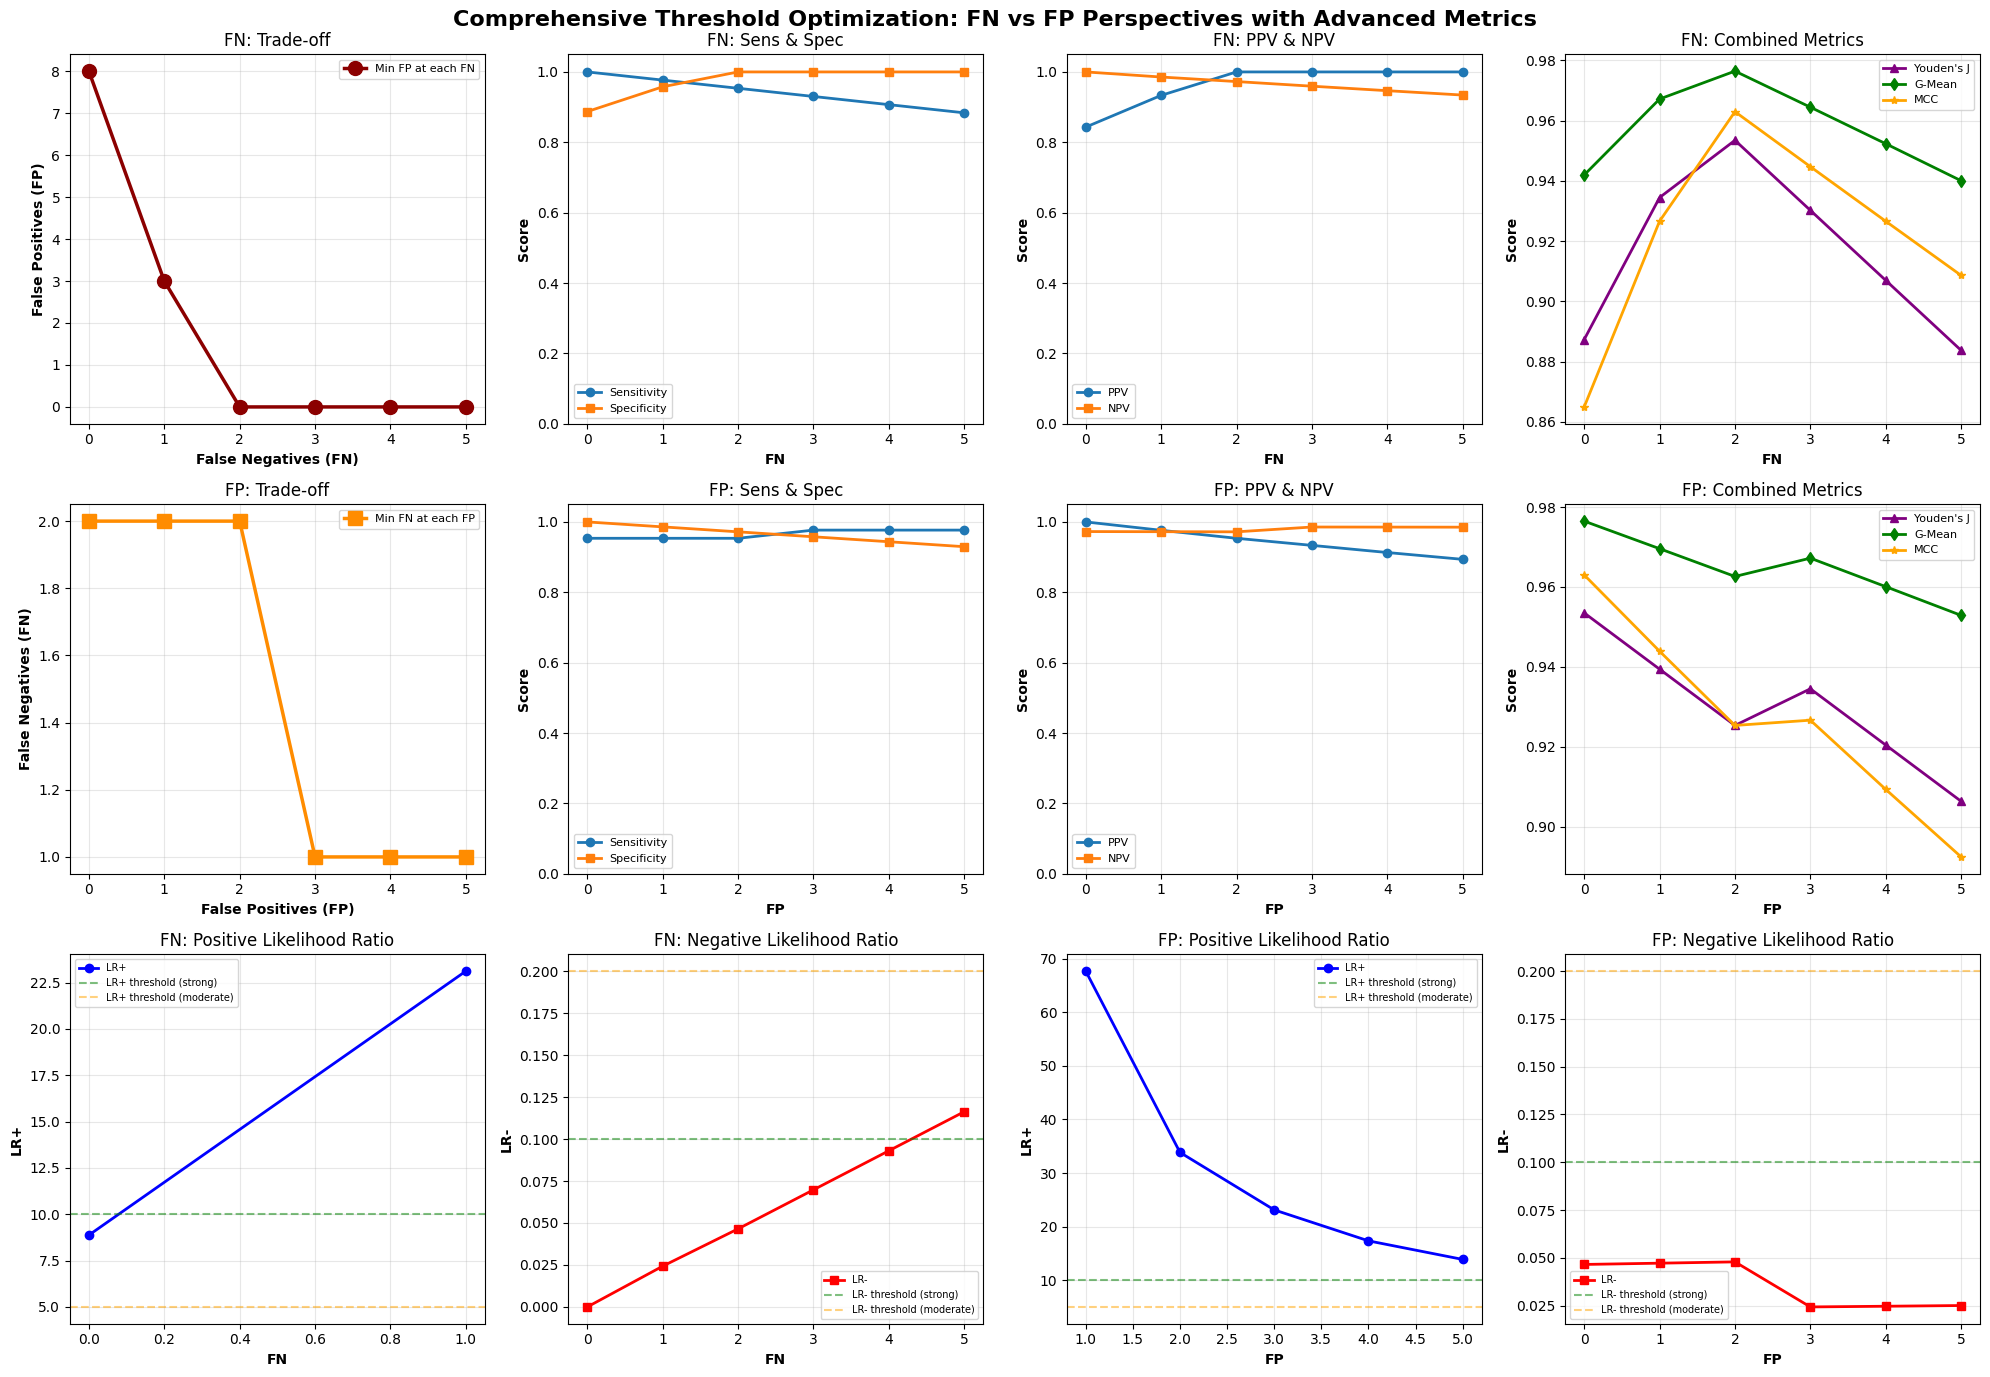

In [72]:
# ============================================================================
# DUAL THRESHOLD OPTIMIZATION WITH COMPREHENSIVE METRICS
# ============================================================================

from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score, matthews_corrcoef
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('='*100)
print("SVM: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS")
print('='*100)

# Predicted probabilities on test set
y_proba = best_svm.predict_proba(X_test_t)[:, 1]

# Use unique sorted thresholds from predictions
unique_thresholds = np.sort(np.unique(y_proba))

# Calculate metrics for each threshold
threshold_results = []

for threshold in unique_thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    balanced_acc = (recall + specificity) / 2
    
    youden_j = recall + specificity - 1
    
    lr_plus = recall / fpr if fpr > 0 else float('inf')
    lr_minus = fnr / specificity if specificity > 0 else float('inf')
    
    g_mean = np.sqrt(recall * specificity)
    
    mcc = matthews_corrcoef(y_test, y_pred)
    
    markedness = precision + npv - 1
    
    dor = lr_plus / lr_minus if lr_minus > 0 and not np.isinf(lr_plus) and not np.isinf(lr_minus) else np.nan
    
    threshold_results.append({
        'threshold': threshold,
        'FN': fn,
        'FP': fp,
        'TP': tp,
        'TN': tn,
        'sensitivity': recall,  # Renamed for clarity
        'specificity': specificity,
        'ppv': precision,  # Renamed from precision
        'npv': npv,
        'f1_score': f1,
        'youden_j': youden_j,
        'lr_plus': lr_plus,
        'lr_minus': lr_minus,
        'g_mean': g_mean,
        'mcc': mcc,
        'markedness': markedness,
        'dor': dor,
        'fpr': fpr,
        'fnr': fnr,
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc
    })

results_df = pd.DataFrame(threshold_results)

fpr_roc, tpr_roc, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr_roc, tpr_roc)
pr_auc = average_precision_score(y_test, y_proba)

print(f"\nThreshold-Independent Metrics:")
print(f"  ROC-AUC: {roc_auc:.4f}")
print(f"  PR-AUC (Average Precision): {pr_auc:.4f}")
print(f"  Total Test Samples: {len(y_test)}")
print(f"  Positive Cases (disease): {y_test.sum()}")
print(f"  Negative Cases (No-disease): {len(y_test) - y_test.sum()}")

# ============================================================================
# TABLE 1: MINIMUM FP AT EACH FN LEVEL (0-5)
# ============================================================================

optimal_by_fn = []
for fn_level in range(6):  # FN = 0, 1, 2, 3, 4, 5
    fn_subset = results_df[results_df['FN'] == fn_level]
    if len(fn_subset) > 0:
        best_at_fn = fn_subset.loc[fn_subset['FP'].idxmin()]
        optimal_by_fn.append(best_at_fn)

optimal_fn_df = pd.DataFrame(optimal_by_fn)

print("\n" + "="*100)
print("TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)")
print("="*100)

fn_table = optimal_fn_df[['FN', 'FP', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fn_table.columns = ['FN', 'FP', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fn_table = fn_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fn_table[['FN', 'FP', 'TP', 'TN']] = fn_table[['FN', 'FP', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fn_table = fn_table.replace([np.inf, -np.inf], 999.99)

print(fn_table.to_string(index=False))
print("="*100)

print("\nMETRIC INTERPRETATION GUIDE:")
print("  Sensitivity (Recall): % of disease cases correctly identified")
print("  Specificity: % of non-disease cases correctly identified")
print("  PPV (Precision): When test says disease, % actually having disease")
print("  NPV: When test says no disease, % actually not having disease")
print("  Youden's J: Sensitivity + Specificity - 1 (0-1, higher better, optimal threshold marker)")
print("  LR+: >10 strong evidence for disease, 5-10 moderate, <5 weak")
print("  LR-: <0.1 strong evidence against disease, 0.1-0.2 moderate, >0.2 weak")
print("  G-Mean: Geometric mean of Sensitivity & Specificity (balanced performance)")
print("  MCC: Matthews Correlation (-1 to +1, considers all CM elements)")
print("="*100)

# ============================================================================
# TABLE 2: MINIMUM FN AT EACH FP LEVEL (0-5)
# ============================================================================

optimal_by_fp = []
for fp_level in range(6):  # FP = 0, 1, 2, 3, 4, 5
    fp_subset = results_df[results_df['FP'] == fp_level]
    if len(fp_subset) > 0:
        best_at_fp = fp_subset.loc[fp_subset['FN'].idxmin()]
        optimal_by_fp.append(best_at_fp)

optimal_fp_df = pd.DataFrame(optimal_by_fp)

print("\n" + "="*100)
print("TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL (0-5)")
print("="*100)

fp_table = optimal_fp_df[['FP', 'FN', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fp_table.columns = ['FP', 'FN', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fp_table = fp_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fp_table[['FP', 'FN', 'TP', 'TN']] = fp_table[['FP', 'FN', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fp_table = fp_table.replace([np.inf, -np.inf], 999.99)

print(fp_table.to_string(index=False))
print("="*100)

# ============================================================================
# FIND OPTIMAL THRESHOLDS BASED ON DIFFERENT CRITERIA
# ============================================================================

print("\n" + "="*100)
print("OPTIMAL THRESHOLD RECOMMENDATIONS")
print("="*100)

# 1. Maximum Youden's Index (best balance of Sens + Spec)
best_youden = results_df.loc[results_df['youden_j'].idxmax()]
print(f"\n1. MAXIMUM YOUDEN'S INDEX (Best Sens+Spec Balance):")
print(f"   Threshold: {best_youden['threshold']:.6f}")
print(f"   Youden's J: {best_youden['youden_j']:.4f}")
print(f"   Sensitivity: {best_youden['sensitivity']:.1%}, Specificity: {best_youden['specificity']:.1%}")
print(f"   FN={int(best_youden['FN'])}, FP={int(best_youden['FP'])}")
print(f"   PPV: {best_youden['ppv']:.1%}, NPV: {best_youden['npv']:.1%}")
print(f"   LR+: {best_youden['lr_plus']:.2f}, LR-: {best_youden['lr_minus']:.4f}")
print(f"   → Use for: General screening with balanced sensitivity/specificity")

# 2. Maximum G-Mean
best_gmean = results_df.loc[results_df['g_mean'].idxmax()]
print(f"\n2. MAXIMUM G-MEAN (Geometric Balance):")
print(f"   Threshold: {best_gmean['threshold']:.6f}")
print(f"   G-Mean: {best_gmean['g_mean']:.4f}")
print(f"   Sensitivity: {best_gmean['sensitivity']:.1%}, Specificity: {best_gmean['specificity']:.1%}")
print(f"   FN={int(best_gmean['FN'])}, FP={int(best_gmean['FP'])}")
print(f"   → Use for: Imbalanced datasets requiring geometric balance")

# 3. Maximum MCC
best_mcc = results_df.loc[results_df['mcc'].idxmax()]
print(f"\n3. MAXIMUM MCC (Overall Best Classifier):")
print(f"   Threshold: {best_mcc['threshold']:.6f}")
print(f"   MCC: {best_mcc['mcc']:.4f}")
print(f"   Sensitivity: {best_mcc['sensitivity']:.1%}, Specificity: {best_mcc['specificity']:.1%}")
print(f"   FN={int(best_mcc['FN'])}, FP={int(best_mcc['FP'])}")
print(f"   → Use for: Overall best classification performance")

# 4. Best from FN Table 1 (excluding FN=0)
if len(optimal_fn_df) > 1:
    fn_valid = optimal_fn_df[optimal_fn_df['FN'] > 0]
    if len(fn_valid) > 0:
        best_fn_youden = fn_valid.loc[fn_valid['youden_j'].idxmax()]
        print(f"\n4. BEST FROM FN PERSPECTIVE (FN=1-5, Highest Youden):")
        print(f"   Threshold: {best_fn_youden['threshold']:.6f}")
        print(f"   FN={int(best_fn_youden['FN'])}, FP={int(best_fn_youden['FP'])}")
        print(f"   Youden's J: {best_fn_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fn_youden['sensitivity']:.1%}, Specificity: {best_fn_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize missed cases while maintaining balance")

# 5. Best from FP Table 2
if len(optimal_fp_df) > 0:
    fp_valid = optimal_fp_df[optimal_fp_df['FP'] > 0]
    if len(fp_valid) > 0:
        best_fp_youden = fp_valid.loc[fp_valid['youden_j'].idxmax()]
        print(f"\n5. BEST FROM FP PERSPECTIVE (FP=1-5, Highest Youden):")
        print(f"   Threshold: {best_fp_youden['threshold']:.6f}")
        print(f"   FP={int(best_fp_youden['FP'])}, FN={int(best_fp_youden['FN'])}")
        print(f"   Youden's J: {best_fp_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fp_youden['sensitivity']:.1%}, Specificity: {best_fp_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize false alarms while maintaining balance")

# 6. High Sensitivity (>95%) with best Specificity
high_sens = results_df[results_df['sensitivity'] >= 0.95]
if len(high_sens) > 0:
    best_high_sens = high_sens.loc[high_sens['specificity'].idxmax()]
    print(f"\n6. HIGH SENSITIVITY PRIORITY (Sens ≥95%, Best Spec):")
    print(f"   Threshold: {best_high_sens['threshold']:.6f}")
    print(f"   Sensitivity: {best_high_sens['sensitivity']:.1%}, Specificity: {best_high_sens['specificity']:.1%}")
    print(f"   FN={int(best_high_sens['FN'])}, FP={int(best_high_sens['FP'])}")
    print(f"   NPV: {best_high_sens['npv']:.1%}")
    print(f"   → Use for: Screening where missing disease cases is unacceptable")

# 7. High Specificity (>95%) with best Sensitivity
high_spec = results_df[results_df['specificity'] >= 0.95]
if len(high_spec) > 0:
    best_high_spec = high_spec.loc[high_spec['sensitivity'].idxmax()]
    print(f"\n7. HIGH SPECIFICITY PRIORITY (Spec ≥95%, Best Sens):")
    print(f"   Threshold: {best_high_spec['threshold']:.6f}")
    print(f"   Specificity: {best_high_spec['specificity']:.1%}, Sensitivity: {best_high_spec['sensitivity']:.1%}")
    print(f"   FP={int(best_high_spec['FP'])}, FN={int(best_high_spec['FN'])}")
    print(f"   PPV: {best_high_spec['ppv']:.1%}")
    print(f"   → Use for: Confirmatory testing, avoiding false alarms")

print("="*100)

# ============================================================================
# ENHANCED VISUALIZATION
# ============================================================================

fig = plt.figure(figsize=(20, 14))
fig.suptitle('Comprehensive Threshold Optimization: FN vs FP Perspectives with Advanced Metrics', 
             fontsize=16, fontweight='bold')

# Row 1: FN Perspective
ax1 = plt.subplot(3, 4, 1)
ax1.plot(optimal_fn_df['FN'], optimal_fn_df['FP'], marker='o', linewidth=2.5, 
         markersize=10, color='darkred', label='Min FP at each FN')
ax1.set_xlabel('False Negatives (FN)', fontweight='bold')
ax1.set_ylabel('False Positives (FP)', fontweight='bold')
ax1.set_title('FN: Trade-off')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=8)

ax2 = plt.subplot(3, 4, 2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax2.set_xlabel('FN', fontweight='bold')
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_title('FN: Sens & Spec')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.05])

ax3 = plt.subplot(3, 4, 3)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['ppv'], marker='o', label='PPV', linewidth=2)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['npv'], marker='s', label='NPV', linewidth=2)
ax3.set_xlabel('FN', fontweight='bold')
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_title('FN: PPV & NPV')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 1.05])

ax4 = plt.subplot(3, 4, 4)
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax4.set_xlabel('FN', fontweight='bold')
ax4.set_ylabel('Score', fontweight='bold')
ax4.set_title('FN: Combined Metrics')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

# Row 2: FP Perspective
ax5 = plt.subplot(3, 4, 5)
ax5.plot(optimal_fp_df['FP'], optimal_fp_df['FN'], marker='s', linewidth=2.5, 
         markersize=10, color='darkorange', label='Min FN at each FP')
ax5.set_xlabel('False Positives (FP)', fontweight='bold')
ax5.set_ylabel('False Negatives (FN)', fontweight='bold')
ax5.set_title('FP: Trade-off')
ax5.grid(True, alpha=0.3)
ax5.legend(fontsize=8)

ax6 = plt.subplot(3, 4, 6)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax6.set_xlabel('FP', fontweight='bold')
ax6.set_ylabel('Score', fontweight='bold')
ax6.set_title('FP: Sens & Spec')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3)
ax6.set_ylim([0, 1.05])

ax7 = plt.subplot(3, 4, 7)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['ppv'], marker='o', label='PPV', linewidth=2)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['npv'], marker='s', label='NPV', linewidth=2)
ax7.set_xlabel('FP', fontweight='bold')
ax7.set_ylabel('Score', fontweight='bold')
ax7.set_title('FP: PPV & NPV')
ax7.legend(fontsize=8)
ax7.grid(True, alpha=0.3)
ax7.set_ylim([0, 1.05])

ax8 = plt.subplot(3, 4, 8)
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax8.set_xlabel('FP', fontweight='bold')
ax8.set_ylabel('Score', fontweight='bold')
ax8.set_title('FP: Combined Metrics')
ax8.legend(fontsize=8)
ax8.grid(True, alpha=0.3)

# Row 3: Likelihood Ratios and Combined
ax9 = plt.subplot(3, 4, 9)
# Filter out infinite values for plotting
fn_lr = optimal_fn_df[optimal_fn_df['lr_plus'] < 100].copy()
if len(fn_lr) > 0:
    ax9.plot(fn_lr['FN'], fn_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax9.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax9.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax9.set_xlabel('FN', fontweight='bold')
ax9.set_ylabel('LR+', fontweight='bold')
ax9.set_title('FN: Positive Likelihood Ratio')
ax9.legend(fontsize=7)
ax9.grid(True, alpha=0.3)

ax10 = plt.subplot(3, 4, 10)
ax10.plot(optimal_fn_df['FN'], optimal_fn_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax10.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax10.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax10.set_xlabel('FN', fontweight='bold')
ax10.set_ylabel('LR-', fontweight='bold')
ax10.set_title('FN: Negative Likelihood Ratio')
ax10.legend(fontsize=7)
ax10.grid(True, alpha=0.3)

ax11 = plt.subplot(3, 4, 11)
fp_lr = optimal_fp_df[optimal_fp_df['lr_plus'] < 100].copy()
if len(fp_lr) > 0:
    ax11.plot(fp_lr['FP'], fp_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax11.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax11.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax11.set_xlabel('FP', fontweight='bold')
ax11.set_ylabel('LR+', fontweight='bold')
ax11.set_title('FP: Positive Likelihood Ratio')
ax11.legend(fontsize=7)
ax11.grid(True, alpha=0.3)

ax12 = plt.subplot(3, 4, 12)
ax12.plot(optimal_fp_df['FP'], optimal_fp_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax12.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax12.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax12.set_xlabel('FP', fontweight='bold')
ax12.set_ylabel('LR-', fontweight='bold')
ax12.set_title('FP: Negative Likelihood Ratio')
ax12.legend(fontsize=7)
ax12.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



# NAIVE BAYES

In [73]:
print('='*50)
print('NAIVE BAYES')
print('='*50)

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_t, y_train)
y_pred = nb.predict(X_test_t)
y_proba = nb.predict_proba(X_test_t)[:,1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

NAIVE BAYES
ROC AUC: 0.9974
PR-AUC (AP): 0.9958
Accuracy: 0.9649
Balanced Accuracy: 0.9581
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[70  1]
 [ 3 40]]


In [74]:
print('='*50)
print('HYPERPARAMETER TUNING FOR NAIVE BAYES')
print('='*50)

params = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

cv = StratifiedKFold(n_splits=5, shuffle= True, random_state= 42)

grid = GridSearchCV(
    estimator= nb,
    param_grid= params,
    scoring= 'average_precision',
    cv= cv,
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_t, y_train)

print(f"Best params: {grid.best_params_}")
print(f"Best CV-PR-AUC: {grid.best_score_:.4f}")

best_nb = grid.best_estimator_
y_pred = best_nb.predict(X_test_t)
y_proba = best_nb.predict_proba(X_test_t)[:, 1]


roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

HYPERPARAMETER TUNING FOR NAIVE BAYES
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best params: {'var_smoothing': 1e-10}
Best CV-PR-AUC: 0.9604
ROC AUC: 0.9974
PR-AUC (AP): 0.9958
Accuracy: 0.9649
Balanced Accuracy: 0.9581
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[70  1]
 [ 3 40]]


NAIVE BAYES: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS

Threshold-Independent Metrics:
  ROC-AUC: 0.9974
  PR-AUC (Average Precision): 0.9958
  Total Test Samples: 114
  Positive Cases (disease): 43
  Negative Cases (No-disease): 71

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)
 FN  FP  TP  TN  Threshold  Sensitivity  Specificity    PPV    NPV  F1-Score  Youden_J    LR+    LR-  G-Mean    MCC    FPR  Accuracy  Balanced_Acc
  0   4  43  67   0.000021       1.0000       0.9437 0.9149 1.0000    0.9556    0.9437  17.75 0.0000  0.9714 0.9292 0.0563    0.9649        0.9718
  1   2  42  69   0.012629       0.9767       0.9718 0.9545 0.9857    0.9655    0.9486  34.67 0.0239  0.9743 0.9444 0.0282    0.9737        0.9743
  2   1  41  70   0.034647       0.9535       0.9859 0.9762 0.9722    0.9647    0.9394  67.70 0.0472  0.9696 0.9439 0.0141    0.9737        0.9697
  3   1  40  70   0.658454       0.9302       0.9859 0.9756 0.9589    0.9524    0.9161  66.05 

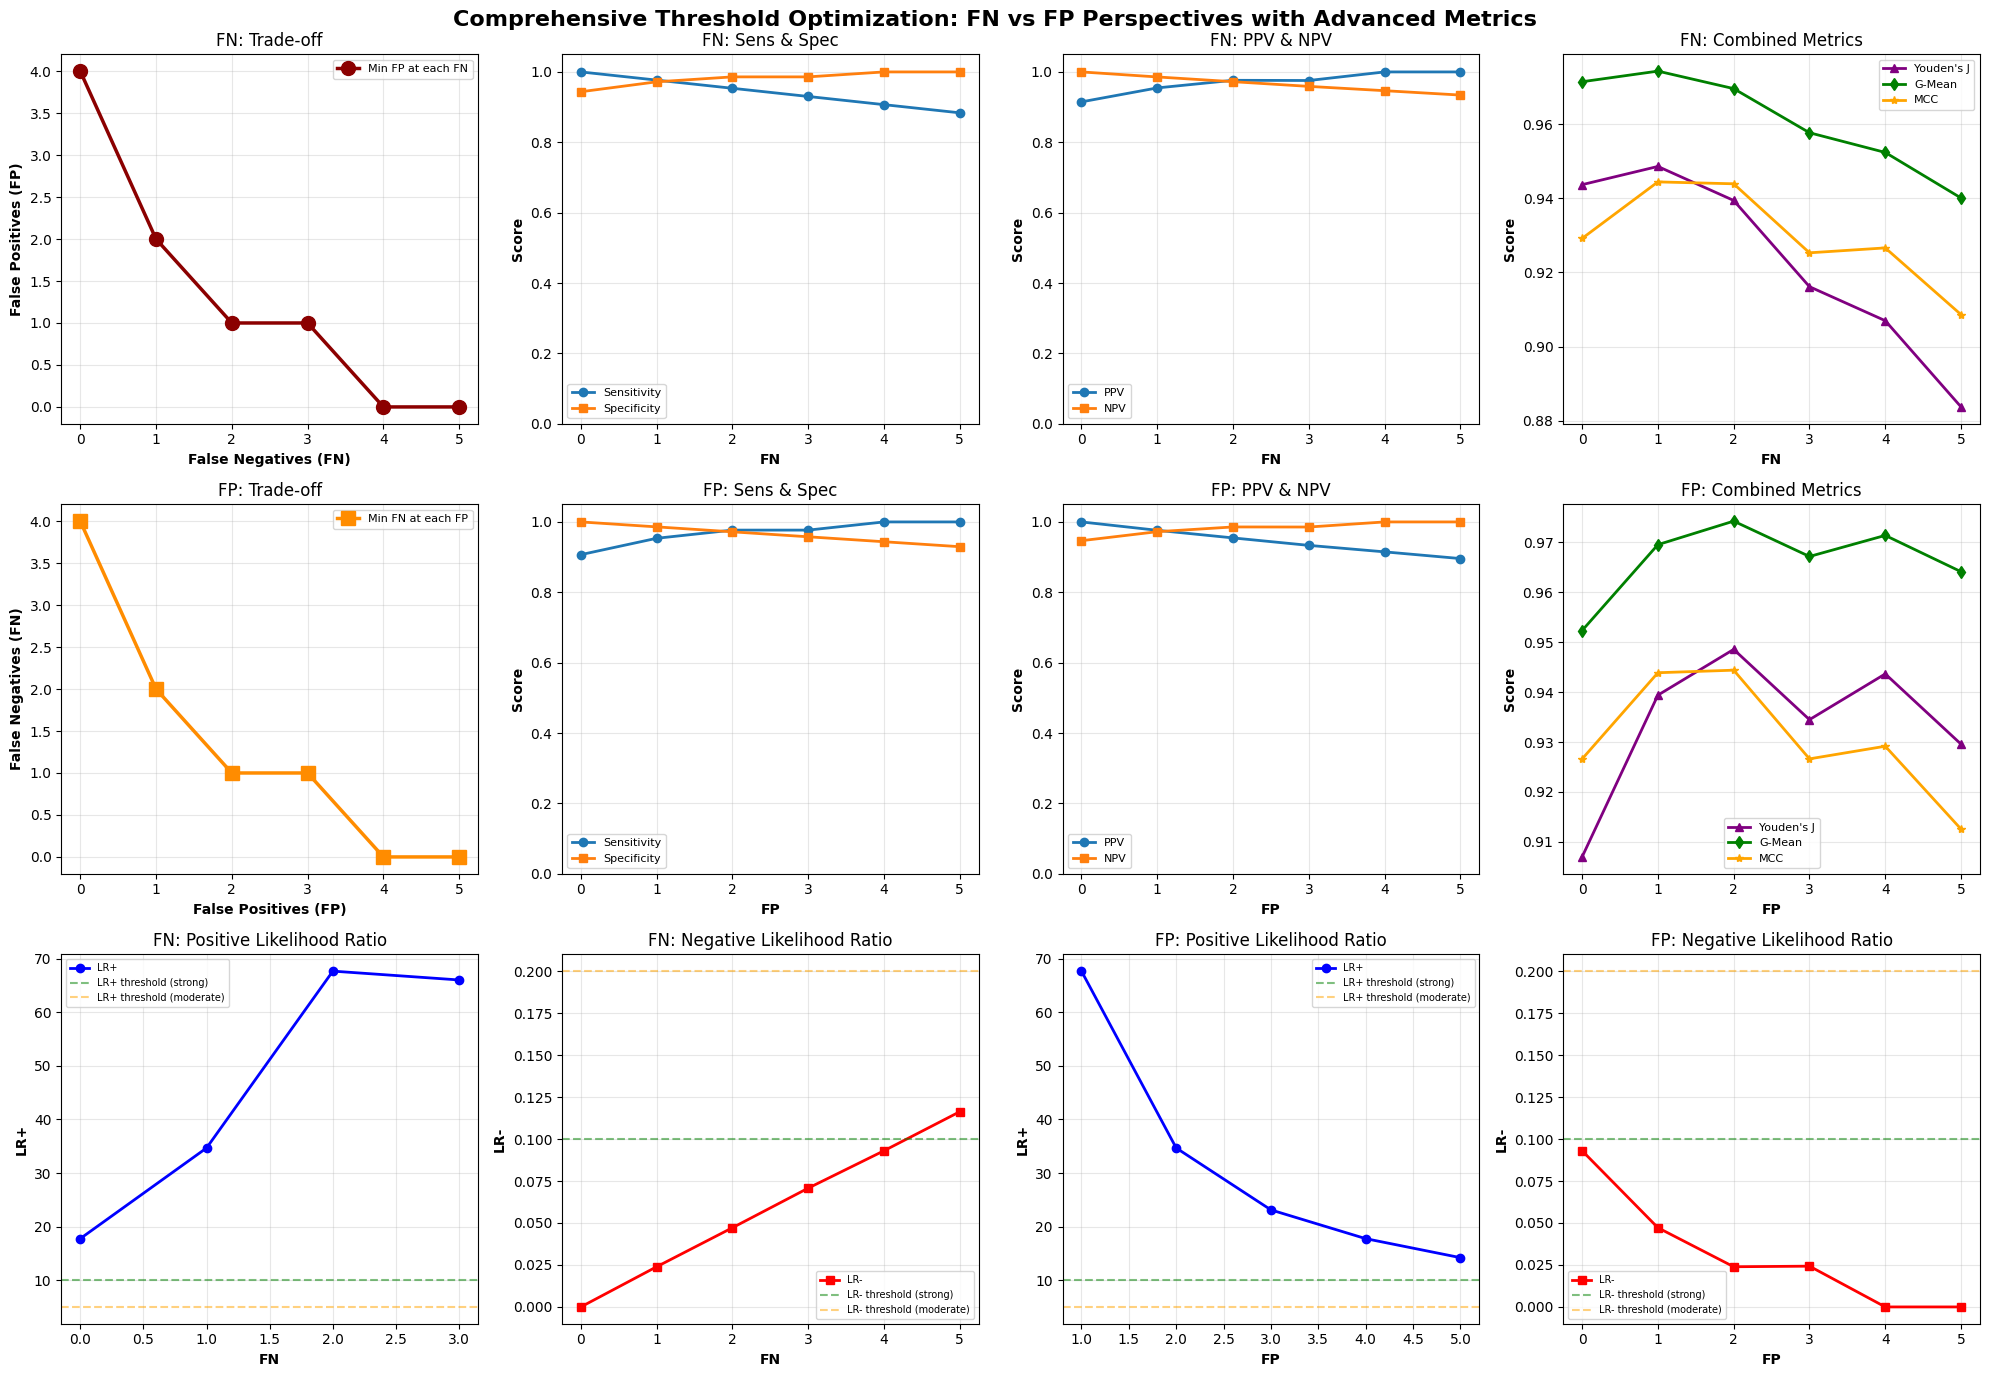

In [75]:
# ============================================================================
# DUAL THRESHOLD OPTIMIZATION WITH COMPREHENSIVE METRICS
# ============================================================================

from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score, matthews_corrcoef
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('='*100)
print("NAIVE BAYES: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS")
print('='*100)

# Predicted probabilities on test set
y_proba = best_nb.predict_proba(X_test_t)[:, 1]

# Use unique sorted thresholds from predictions
unique_thresholds = np.sort(np.unique(y_proba))

# Calculate metrics for each threshold
threshold_results = []

for threshold in unique_thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    balanced_acc = (recall + specificity) / 2
    
    youden_j = recall + specificity - 1
    
    lr_plus = recall / fpr if fpr > 0 else float('inf')
    lr_minus = fnr / specificity if specificity > 0 else float('inf')
    
    g_mean = np.sqrt(recall * specificity)
    
    mcc = matthews_corrcoef(y_test, y_pred)
    
    markedness = precision + npv - 1
    
    dor = lr_plus / lr_minus if lr_minus > 0 and not np.isinf(lr_plus) and not np.isinf(lr_minus) else np.nan
    
    threshold_results.append({
        'threshold': threshold,
        'FN': fn,
        'FP': fp,
        'TP': tp,
        'TN': tn,
        'sensitivity': recall,  # Renamed for clarity
        'specificity': specificity,
        'ppv': precision,  # Renamed from precision
        'npv': npv,
        'f1_score': f1,
        'youden_j': youden_j,
        'lr_plus': lr_plus,
        'lr_minus': lr_minus,
        'g_mean': g_mean,
        'mcc': mcc,
        'markedness': markedness,
        'dor': dor,
        'fpr': fpr,
        'fnr': fnr,
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc
    })

results_df = pd.DataFrame(threshold_results)

fpr_roc, tpr_roc, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr_roc, tpr_roc)
pr_auc = average_precision_score(y_test, y_proba)

print(f"\nThreshold-Independent Metrics:")
print(f"  ROC-AUC: {roc_auc:.4f}")
print(f"  PR-AUC (Average Precision): {pr_auc:.4f}")
print(f"  Total Test Samples: {len(y_test)}")
print(f"  Positive Cases (disease): {y_test.sum()}")
print(f"  Negative Cases (No-disease): {len(y_test) - y_test.sum()}")

# ============================================================================
# TABLE 1: MINIMUM FP AT EACH FN LEVEL (0-5)
# ============================================================================

optimal_by_fn = []
for fn_level in range(6):  # FN = 0, 1, 2, 3, 4, 5
    fn_subset = results_df[results_df['FN'] == fn_level]
    if len(fn_subset) > 0:
        best_at_fn = fn_subset.loc[fn_subset['FP'].idxmin()]
        optimal_by_fn.append(best_at_fn)

optimal_fn_df = pd.DataFrame(optimal_by_fn)

print("\n" + "="*100)
print("TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)")
print("="*100)

fn_table = optimal_fn_df[['FN', 'FP', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fn_table.columns = ['FN', 'FP', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fn_table = fn_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fn_table[['FN', 'FP', 'TP', 'TN']] = fn_table[['FN', 'FP', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fn_table = fn_table.replace([np.inf, -np.inf], 999.99)

print(fn_table.to_string(index=False))
print("="*100)

print("\nMETRIC INTERPRETATION GUIDE:")
print("  Sensitivity (Recall): % of disease cases correctly identified")
print("  Specificity: % of non-disease cases correctly identified")
print("  PPV (Precision): When test says disease, % actually having disease")
print("  NPV: When test says no disease, % actually not having disease")
print("  Youden's J: Sensitivity + Specificity - 1 (0-1, higher better, optimal threshold marker)")
print("  LR+: >10 strong evidence for disease, 5-10 moderate, <5 weak")
print("  LR-: <0.1 strong evidence against disease, 0.1-0.2 moderate, >0.2 weak")
print("  G-Mean: Geometric mean of Sensitivity & Specificity (balanced performance)")
print("  MCC: Matthews Correlation (-1 to +1, considers all CM elements)")
print("="*100)

# ============================================================================
# TABLE 2: MINIMUM FN AT EACH FP LEVEL (0-5)
# ============================================================================

optimal_by_fp = []
for fp_level in range(6):  # FP = 0, 1, 2, 3, 4, 5
    fp_subset = results_df[results_df['FP'] == fp_level]
    if len(fp_subset) > 0:
        best_at_fp = fp_subset.loc[fp_subset['FN'].idxmin()]
        optimal_by_fp.append(best_at_fp)

optimal_fp_df = pd.DataFrame(optimal_by_fp)

print("\n" + "="*100)
print("TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL (0-5)")
print("="*100)

fp_table = optimal_fp_df[['FP', 'FN', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fp_table.columns = ['FP', 'FN', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fp_table = fp_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fp_table[['FP', 'FN', 'TP', 'TN']] = fp_table[['FP', 'FN', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fp_table = fp_table.replace([np.inf, -np.inf], 999.99)

print(fp_table.to_string(index=False))
print("="*100)

# ============================================================================
# FIND OPTIMAL THRESHOLDS BASED ON DIFFERENT CRITERIA
# ============================================================================

print("\n" + "="*100)
print("OPTIMAL THRESHOLD RECOMMENDATIONS")
print("="*100)

# 1. Maximum Youden's Index (best balance of Sens + Spec)
best_youden = results_df.loc[results_df['youden_j'].idxmax()]
print(f"\n1. MAXIMUM YOUDEN'S INDEX (Best Sens+Spec Balance):")
print(f"   Threshold: {best_youden['threshold']:.6f}")
print(f"   Youden's J: {best_youden['youden_j']:.4f}")
print(f"   Sensitivity: {best_youden['sensitivity']:.1%}, Specificity: {best_youden['specificity']:.1%}")
print(f"   FN={int(best_youden['FN'])}, FP={int(best_youden['FP'])}")
print(f"   PPV: {best_youden['ppv']:.1%}, NPV: {best_youden['npv']:.1%}")
print(f"   LR+: {best_youden['lr_plus']:.2f}, LR-: {best_youden['lr_minus']:.4f}")
print(f"   → Use for: General screening with balanced sensitivity/specificity")

# 2. Maximum G-Mean
best_gmean = results_df.loc[results_df['g_mean'].idxmax()]
print(f"\n2. MAXIMUM G-MEAN (Geometric Balance):")
print(f"   Threshold: {best_gmean['threshold']:.6f}")
print(f"   G-Mean: {best_gmean['g_mean']:.4f}")
print(f"   Sensitivity: {best_gmean['sensitivity']:.1%}, Specificity: {best_gmean['specificity']:.1%}")
print(f"   FN={int(best_gmean['FN'])}, FP={int(best_gmean['FP'])}")
print(f"   → Use for: Imbalanced datasets requiring geometric balance")

# 3. Maximum MCC
best_mcc = results_df.loc[results_df['mcc'].idxmax()]
print(f"\n3. MAXIMUM MCC (Overall Best Classifier):")
print(f"   Threshold: {best_mcc['threshold']:.6f}")
print(f"   MCC: {best_mcc['mcc']:.4f}")
print(f"   Sensitivity: {best_mcc['sensitivity']:.1%}, Specificity: {best_mcc['specificity']:.1%}")
print(f"   FN={int(best_mcc['FN'])}, FP={int(best_mcc['FP'])}")
print(f"   → Use for: Overall best classification performance")

# 4. Best from FN Table 1 (excluding FN=0)
if len(optimal_fn_df) > 1:
    fn_valid = optimal_fn_df[optimal_fn_df['FN'] > 0]
    if len(fn_valid) > 0:
        best_fn_youden = fn_valid.loc[fn_valid['youden_j'].idxmax()]
        print(f"\n4. BEST FROM FN PERSPECTIVE (FN=1-5, Highest Youden):")
        print(f"   Threshold: {best_fn_youden['threshold']:.6f}")
        print(f"   FN={int(best_fn_youden['FN'])}, FP={int(best_fn_youden['FP'])}")
        print(f"   Youden's J: {best_fn_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fn_youden['sensitivity']:.1%}, Specificity: {best_fn_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize missed cases while maintaining balance")

# 5. Best from FP Table 2
if len(optimal_fp_df) > 0:
    fp_valid = optimal_fp_df[optimal_fp_df['FP'] > 0]
    if len(fp_valid) > 0:
        best_fp_youden = fp_valid.loc[fp_valid['youden_j'].idxmax()]
        print(f"\n5. BEST FROM FP PERSPECTIVE (FP=1-5, Highest Youden):")
        print(f"   Threshold: {best_fp_youden['threshold']:.6f}")
        print(f"   FP={int(best_fp_youden['FP'])}, FN={int(best_fp_youden['FN'])}")
        print(f"   Youden's J: {best_fp_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fp_youden['sensitivity']:.1%}, Specificity: {best_fp_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize false alarms while maintaining balance")

# 6. High Sensitivity (>95%) with best Specificity
high_sens = results_df[results_df['sensitivity'] >= 0.95]
if len(high_sens) > 0:
    best_high_sens = high_sens.loc[high_sens['specificity'].idxmax()]
    print(f"\n6. HIGH SENSITIVITY PRIORITY (Sens ≥95%, Best Spec):")
    print(f"   Threshold: {best_high_sens['threshold']:.6f}")
    print(f"   Sensitivity: {best_high_sens['sensitivity']:.1%}, Specificity: {best_high_sens['specificity']:.1%}")
    print(f"   FN={int(best_high_sens['FN'])}, FP={int(best_high_sens['FP'])}")
    print(f"   NPV: {best_high_sens['npv']:.1%}")
    print(f"   → Use for: Screening where missing disease cases is unacceptable")

# 7. High Specificity (>95%) with best Sensitivity
high_spec = results_df[results_df['specificity'] >= 0.95]
if len(high_spec) > 0:
    best_high_spec = high_spec.loc[high_spec['sensitivity'].idxmax()]
    print(f"\n7. HIGH SPECIFICITY PRIORITY (Spec ≥95%, Best Sens):")
    print(f"   Threshold: {best_high_spec['threshold']:.6f}")
    print(f"   Specificity: {best_high_spec['specificity']:.1%}, Sensitivity: {best_high_spec['sensitivity']:.1%}")
    print(f"   FP={int(best_high_spec['FP'])}, FN={int(best_high_spec['FN'])}")
    print(f"   PPV: {best_high_spec['ppv']:.1%}")
    print(f"   → Use for: Confirmatory testing, avoiding false alarms")

print("="*100)

# ============================================================================
# ENHANCED VISUALIZATION
# ============================================================================

fig = plt.figure(figsize=(20, 14))
fig.suptitle('Comprehensive Threshold Optimization: FN vs FP Perspectives with Advanced Metrics', 
             fontsize=16, fontweight='bold')

# Row 1: FN Perspective
ax1 = plt.subplot(3, 4, 1)
ax1.plot(optimal_fn_df['FN'], optimal_fn_df['FP'], marker='o', linewidth=2.5, 
         markersize=10, color='darkred', label='Min FP at each FN')
ax1.set_xlabel('False Negatives (FN)', fontweight='bold')
ax1.set_ylabel('False Positives (FP)', fontweight='bold')
ax1.set_title('FN: Trade-off')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=8)

ax2 = plt.subplot(3, 4, 2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax2.set_xlabel('FN', fontweight='bold')
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_title('FN: Sens & Spec')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.05])

ax3 = plt.subplot(3, 4, 3)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['ppv'], marker='o', label='PPV', linewidth=2)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['npv'], marker='s', label='NPV', linewidth=2)
ax3.set_xlabel('FN', fontweight='bold')
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_title('FN: PPV & NPV')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 1.05])

ax4 = plt.subplot(3, 4, 4)
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax4.set_xlabel('FN', fontweight='bold')
ax4.set_ylabel('Score', fontweight='bold')
ax4.set_title('FN: Combined Metrics')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

# Row 2: FP Perspective
ax5 = plt.subplot(3, 4, 5)
ax5.plot(optimal_fp_df['FP'], optimal_fp_df['FN'], marker='s', linewidth=2.5, 
         markersize=10, color='darkorange', label='Min FN at each FP')
ax5.set_xlabel('False Positives (FP)', fontweight='bold')
ax5.set_ylabel('False Negatives (FN)', fontweight='bold')
ax5.set_title('FP: Trade-off')
ax5.grid(True, alpha=0.3)
ax5.legend(fontsize=8)

ax6 = plt.subplot(3, 4, 6)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax6.set_xlabel('FP', fontweight='bold')
ax6.set_ylabel('Score', fontweight='bold')
ax6.set_title('FP: Sens & Spec')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3)
ax6.set_ylim([0, 1.05])

ax7 = plt.subplot(3, 4, 7)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['ppv'], marker='o', label='PPV', linewidth=2)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['npv'], marker='s', label='NPV', linewidth=2)
ax7.set_xlabel('FP', fontweight='bold')
ax7.set_ylabel('Score', fontweight='bold')
ax7.set_title('FP: PPV & NPV')
ax7.legend(fontsize=8)
ax7.grid(True, alpha=0.3)
ax7.set_ylim([0, 1.05])

ax8 = plt.subplot(3, 4, 8)
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax8.set_xlabel('FP', fontweight='bold')
ax8.set_ylabel('Score', fontweight='bold')
ax8.set_title('FP: Combined Metrics')
ax8.legend(fontsize=8)
ax8.grid(True, alpha=0.3)

# Row 3: Likelihood Ratios and Combined
ax9 = plt.subplot(3, 4, 9)
# Filter out infinite values for plotting
fn_lr = optimal_fn_df[optimal_fn_df['lr_plus'] < 100].copy()
if len(fn_lr) > 0:
    ax9.plot(fn_lr['FN'], fn_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax9.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax9.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax9.set_xlabel('FN', fontweight='bold')
ax9.set_ylabel('LR+', fontweight='bold')
ax9.set_title('FN: Positive Likelihood Ratio')
ax9.legend(fontsize=7)
ax9.grid(True, alpha=0.3)

ax10 = plt.subplot(3, 4, 10)
ax10.plot(optimal_fn_df['FN'], optimal_fn_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax10.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax10.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax10.set_xlabel('FN', fontweight='bold')
ax10.set_ylabel('LR-', fontweight='bold')
ax10.set_title('FN: Negative Likelihood Ratio')
ax10.legend(fontsize=7)
ax10.grid(True, alpha=0.3)

ax11 = plt.subplot(3, 4, 11)
fp_lr = optimal_fp_df[optimal_fp_df['lr_plus'] < 100].copy()
if len(fp_lr) > 0:
    ax11.plot(fp_lr['FP'], fp_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax11.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax11.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax11.set_xlabel('FP', fontweight='bold')
ax11.set_ylabel('LR+', fontweight='bold')
ax11.set_title('FP: Positive Likelihood Ratio')
ax11.legend(fontsize=7)
ax11.grid(True, alpha=0.3)

ax12 = plt.subplot(3, 4, 12)
ax12.plot(optimal_fp_df['FP'], optimal_fp_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax12.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax12.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax12.set_xlabel('FP', fontweight='bold')
ax12.set_ylabel('LR-', fontweight='bold')
ax12.set_title('FP: Negative Likelihood Ratio')
ax12.legend(fontsize=7)
ax12.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



# DECISION TREE

In [76]:
print('='*50)
print('DECISION TREE')
print('='*50)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, balanced_accuracy_score

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

dt.fit(X_train_t,y_train)


y_pred = dt.predict(X_test_t)
y_proba = dt.predict_proba(X_test_t)[:, 1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

DECISION TREE
ROC AUC: 0.9510
PR-AUC (AP): 0.9123
Accuracy: 0.9561
Balanced Accuracy: 0.9510
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[69  2]
 [ 3 40]]


In [80]:
print('='*50)
print('DECISION TREE HYPERPARAMETER TUNING')
print('='*50)

from sklearn.model_selection import GridSearchCV, StratifiedKFold
dt = DecisionTreeClassifier(class_weight= 'balanced', 
                            random_state=42
                            )

params = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
}

cv = StratifiedKFold(n_splits=5, shuffle= True, random_state= 42)

grid_search = GridSearchCV(
    dt,
    param_grid= params,
    scoring= 'average_precision',
    cv=cv,
    verbose= 1
)


grid_search.fit(X_train_t,y_train)

print(f"Best params: {grid_search.best_params_}")
print(f"Best CV PR-AUC score: {grid_search.best_score_:.4f}")

best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test_t)
y_proba = best_dt.predict_proba(X_test_t)[:,1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

DECISION TREE HYPERPARAMETER TUNING
Fitting 5 folds for each of 224 candidates, totalling 1120 fits
Best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best CV PR-AUC score: 0.9357
ROC AUC: 0.9630
PR-AUC (AP): 0.9396
Accuracy: 0.9474
Balanced Accuracy: 0.9440
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[68  3]
 [ 3 40]]


DECISION TREE: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS

Threshold-Independent Metrics:
  ROC-AUC: 0.9630
  PR-AUC (Average Precision): 0.9396
  Total Test Samples: 114
  Positive Cases (disease): 43
  Negative Cases (No-disease): 71

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)
 FN  FP  TP  TN  Threshold  Sensitivity  Specificity    PPV    NPV  F1-Score  Youden_J   LR+      LR-  G-Mean    MCC    FPR  Accuracy  Balanced_Acc
  0  71  43   0   0.000000       1.0000       0.0000 0.3772 0.0000    0.5478    0.0000  1.00 999.9900  0.0000 0.0000 1.0000    0.3772        0.5000
  2   9  41  62   0.438538       0.9535       0.8732 0.8200 0.9688    0.8817    0.8267  7.52   0.0533  0.9125 0.8075 0.1268    0.9035        0.9134
  3   2  40  69   0.628571       0.9302       0.9718 0.9524 0.9583    0.9412    0.9021 33.02   0.0718  0.9508 0.9064 0.0282    0.9561        0.9510
  5   1  38  70   0.699422       0.8837       0.9859 0.9744 0.9333    0.9268    0.8696 6

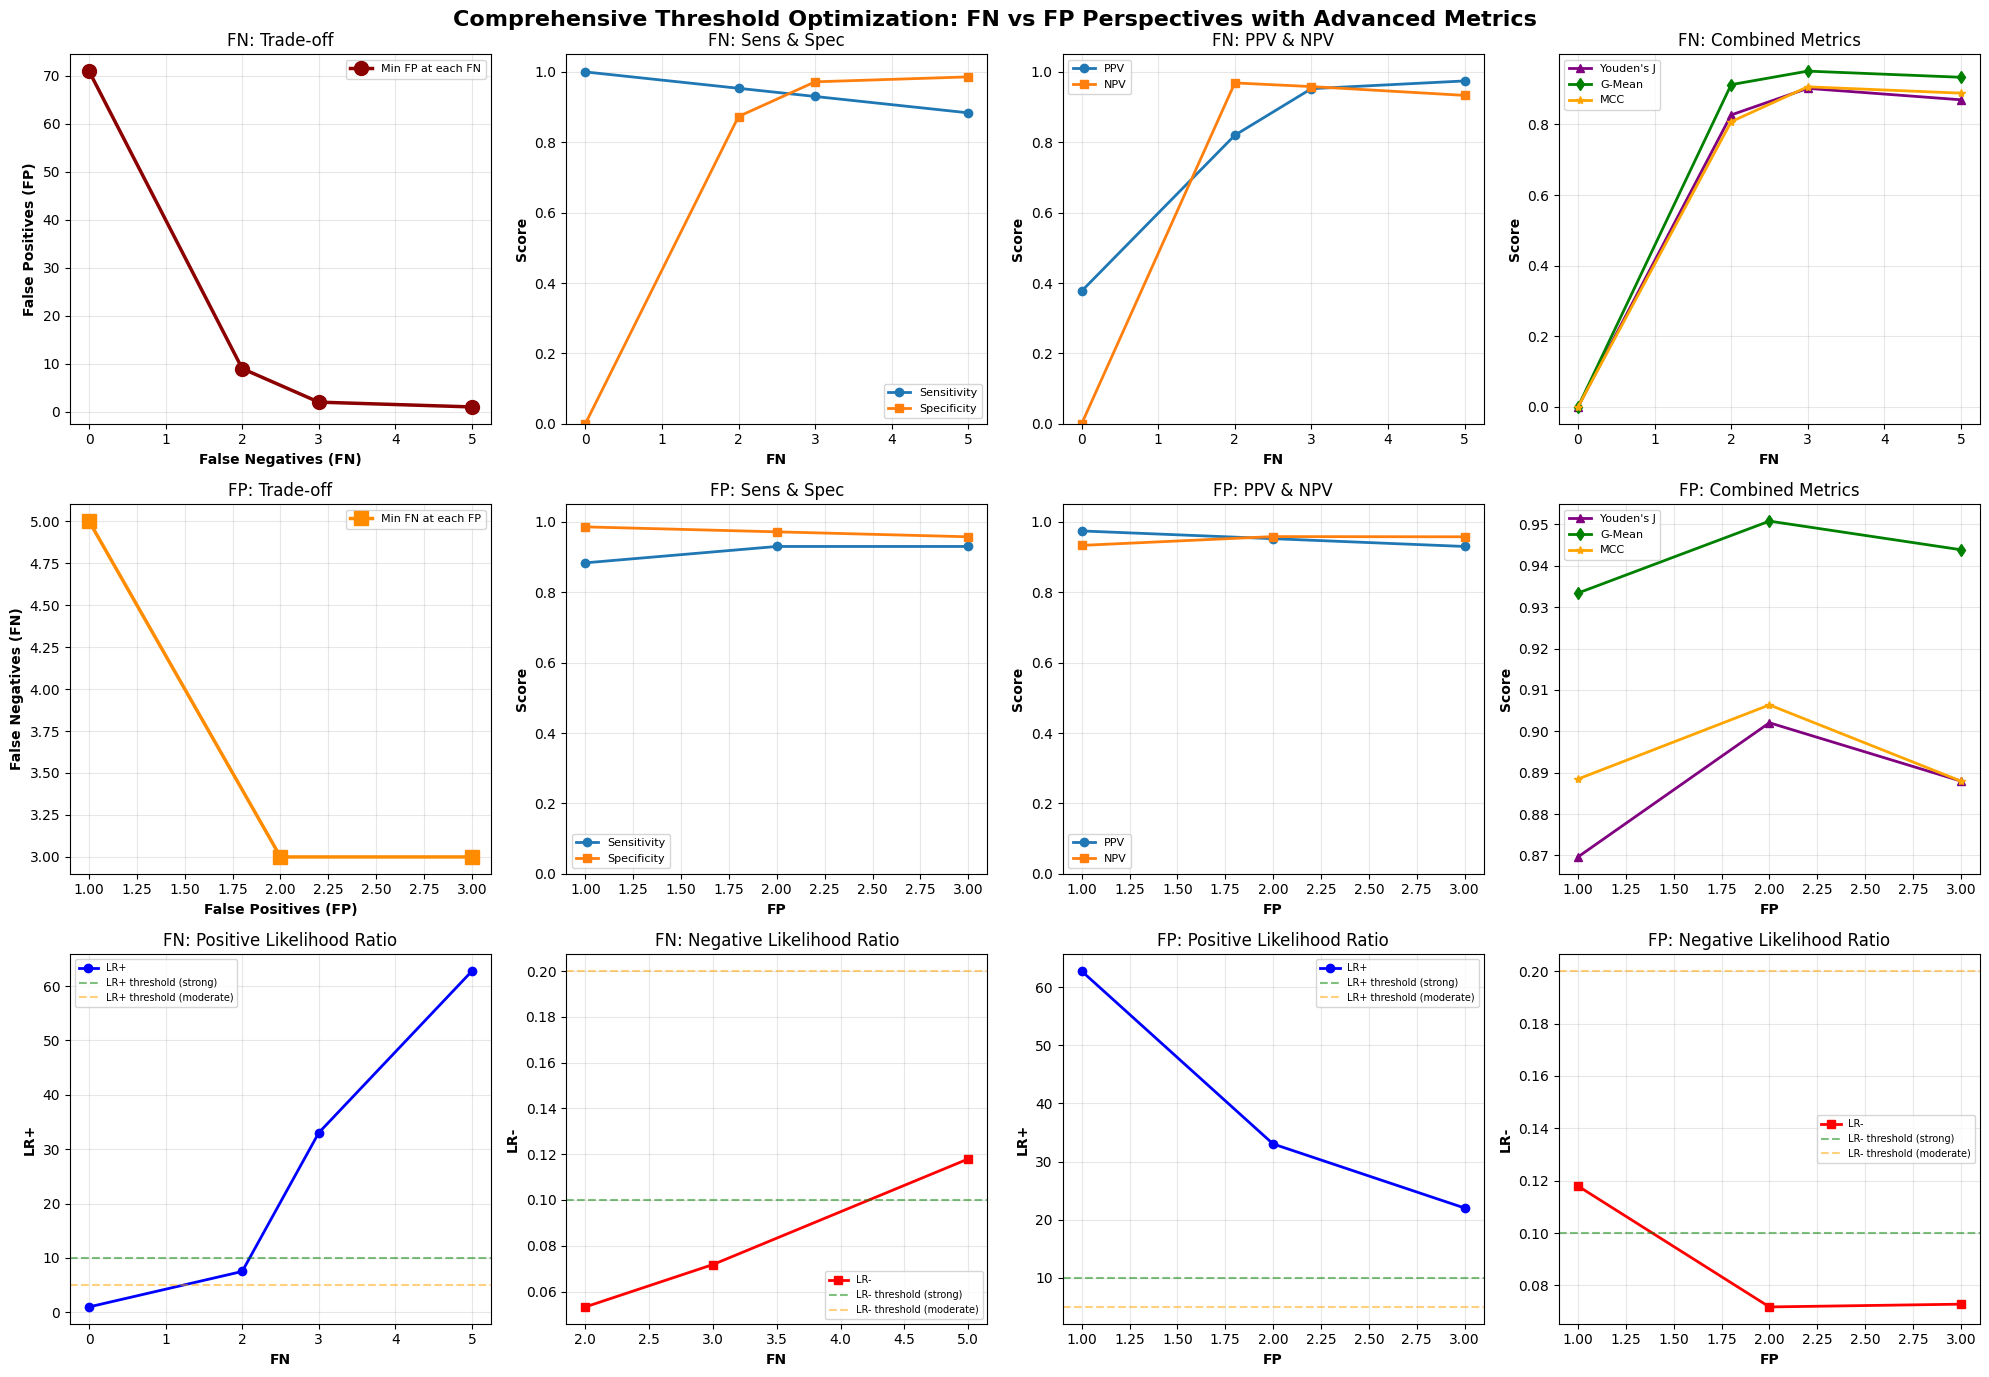

In [78]:
# ============================================================================
# DUAL THRESHOLD OPTIMIZATION WITH COMPREHENSIVE METRICS
# ============================================================================

from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score, matthews_corrcoef
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('='*100)
print("DECISION TREE: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS")
print('='*100)

# Predicted probabilities on test set
y_proba = best_dt.predict_proba(X_test_t)[:, 1]

# Use unique sorted thresholds from predictions
unique_thresholds = np.sort(np.unique(y_proba))

# Calculate metrics for each threshold
threshold_results = []

for threshold in unique_thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    balanced_acc = (recall + specificity) / 2
    
    youden_j = recall + specificity - 1
    
    lr_plus = recall / fpr if fpr > 0 else float('inf')
    lr_minus = fnr / specificity if specificity > 0 else float('inf')
    
    g_mean = np.sqrt(recall * specificity)
    
    mcc = matthews_corrcoef(y_test, y_pred)
    
    markedness = precision + npv - 1
    
    dor = lr_plus / lr_minus if lr_minus > 0 and not np.isinf(lr_plus) and not np.isinf(lr_minus) else np.nan
    
    threshold_results.append({
        'threshold': threshold,
        'FN': fn,
        'FP': fp,
        'TP': tp,
        'TN': tn,
        'sensitivity': recall,  # Renamed for clarity
        'specificity': specificity,
        'ppv': precision,  # Renamed from precision
        'npv': npv,
        'f1_score': f1,
        'youden_j': youden_j,
        'lr_plus': lr_plus,
        'lr_minus': lr_minus,
        'g_mean': g_mean,
        'mcc': mcc,
        'markedness': markedness,
        'dor': dor,
        'fpr': fpr,
        'fnr': fnr,
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc
    })

results_df = pd.DataFrame(threshold_results)

fpr_roc, tpr_roc, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr_roc, tpr_roc)
pr_auc = average_precision_score(y_test, y_proba)

print(f"\nThreshold-Independent Metrics:")
print(f"  ROC-AUC: {roc_auc:.4f}")
print(f"  PR-AUC (Average Precision): {pr_auc:.4f}")
print(f"  Total Test Samples: {len(y_test)}")
print(f"  Positive Cases (disease): {y_test.sum()}")
print(f"  Negative Cases (No-disease): {len(y_test) - y_test.sum()}")

# ============================================================================
# TABLE 1: MINIMUM FP AT EACH FN LEVEL (0-5)
# ============================================================================

optimal_by_fn = []
for fn_level in range(6):  # FN = 0, 1, 2, 3, 4, 5
    fn_subset = results_df[results_df['FN'] == fn_level]
    if len(fn_subset) > 0:
        best_at_fn = fn_subset.loc[fn_subset['FP'].idxmin()]
        optimal_by_fn.append(best_at_fn)

optimal_fn_df = pd.DataFrame(optimal_by_fn)

print("\n" + "="*100)
print("TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)")
print("="*100)

fn_table = optimal_fn_df[['FN', 'FP', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fn_table.columns = ['FN', 'FP', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fn_table = fn_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fn_table[['FN', 'FP', 'TP', 'TN']] = fn_table[['FN', 'FP', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fn_table = fn_table.replace([np.inf, -np.inf], 999.99)

print(fn_table.to_string(index=False))
print("="*100)

print("\nMETRIC INTERPRETATION GUIDE:")
print("  Sensitivity (Recall): % of disease cases correctly identified")
print("  Specificity: % of non-disease cases correctly identified")
print("  PPV (Precision): When test says disease, % actually having disease")
print("  NPV: When test says no disease, % actually not having disease")
print("  Youden's J: Sensitivity + Specificity - 1 (0-1, higher better, optimal threshold marker)")
print("  LR+: >10 strong evidence for disease, 5-10 moderate, <5 weak")
print("  LR-: <0.1 strong evidence against disease, 0.1-0.2 moderate, >0.2 weak")
print("  G-Mean: Geometric mean of Sensitivity & Specificity (balanced performance)")
print("  MCC: Matthews Correlation (-1 to +1, considers all CM elements)")
print("="*100)

# ============================================================================
# TABLE 2: MINIMUM FN AT EACH FP LEVEL (0-5)
# ============================================================================

optimal_by_fp = []
for fp_level in range(6):  # FP = 0, 1, 2, 3, 4, 5
    fp_subset = results_df[results_df['FP'] == fp_level]
    if len(fp_subset) > 0:
        best_at_fp = fp_subset.loc[fp_subset['FN'].idxmin()]
        optimal_by_fp.append(best_at_fp)

optimal_fp_df = pd.DataFrame(optimal_by_fp)

print("\n" + "="*100)
print("TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL (0-5)")
print("="*100)

fp_table = optimal_fp_df[['FP', 'FN', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fp_table.columns = ['FP', 'FN', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fp_table = fp_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fp_table[['FP', 'FN', 'TP', 'TN']] = fp_table[['FP', 'FN', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fp_table = fp_table.replace([np.inf, -np.inf], 999.99)

print(fp_table.to_string(index=False))
print("="*100)

# ============================================================================
# FIND OPTIMAL THRESHOLDS BASED ON DIFFERENT CRITERIA
# ============================================================================

print("\n" + "="*100)
print("OPTIMAL THRESHOLD RECOMMENDATIONS")
print("="*100)

# 1. Maximum Youden's Index (best balance of Sens + Spec)
best_youden = results_df.loc[results_df['youden_j'].idxmax()]
print(f"\n1. MAXIMUM YOUDEN'S INDEX (Best Sens+Spec Balance):")
print(f"   Threshold: {best_youden['threshold']:.6f}")
print(f"   Youden's J: {best_youden['youden_j']:.4f}")
print(f"   Sensitivity: {best_youden['sensitivity']:.1%}, Specificity: {best_youden['specificity']:.1%}")
print(f"   FN={int(best_youden['FN'])}, FP={int(best_youden['FP'])}")
print(f"   PPV: {best_youden['ppv']:.1%}, NPV: {best_youden['npv']:.1%}")
print(f"   LR+: {best_youden['lr_plus']:.2f}, LR-: {best_youden['lr_minus']:.4f}")
print(f"   → Use for: General screening with balanced sensitivity/specificity")

# 2. Maximum G-Mean
best_gmean = results_df.loc[results_df['g_mean'].idxmax()]
print(f"\n2. MAXIMUM G-MEAN (Geometric Balance):")
print(f"   Threshold: {best_gmean['threshold']:.6f}")
print(f"   G-Mean: {best_gmean['g_mean']:.4f}")
print(f"   Sensitivity: {best_gmean['sensitivity']:.1%}, Specificity: {best_gmean['specificity']:.1%}")
print(f"   FN={int(best_gmean['FN'])}, FP={int(best_gmean['FP'])}")
print(f"   → Use for: Imbalanced datasets requiring geometric balance")

# 3. Maximum MCC
best_mcc = results_df.loc[results_df['mcc'].idxmax()]
print(f"\n3. MAXIMUM MCC (Overall Best Classifier):")
print(f"   Threshold: {best_mcc['threshold']:.6f}")
print(f"   MCC: {best_mcc['mcc']:.4f}")
print(f"   Sensitivity: {best_mcc['sensitivity']:.1%}, Specificity: {best_mcc['specificity']:.1%}")
print(f"   FN={int(best_mcc['FN'])}, FP={int(best_mcc['FP'])}")
print(f"   → Use for: Overall best classification performance")

# 4. Best from FN Table 1 (excluding FN=0)
if len(optimal_fn_df) > 1:
    fn_valid = optimal_fn_df[optimal_fn_df['FN'] > 0]
    if len(fn_valid) > 0:
        best_fn_youden = fn_valid.loc[fn_valid['youden_j'].idxmax()]
        print(f"\n4. BEST FROM FN PERSPECTIVE (FN=1-5, Highest Youden):")
        print(f"   Threshold: {best_fn_youden['threshold']:.6f}")
        print(f"   FN={int(best_fn_youden['FN'])}, FP={int(best_fn_youden['FP'])}")
        print(f"   Youden's J: {best_fn_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fn_youden['sensitivity']:.1%}, Specificity: {best_fn_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize missed cases while maintaining balance")

# 5. Best from FP Table 2
if len(optimal_fp_df) > 0:
    fp_valid = optimal_fp_df[optimal_fp_df['FP'] > 0]
    if len(fp_valid) > 0:
        best_fp_youden = fp_valid.loc[fp_valid['youden_j'].idxmax()]
        print(f"\n5. BEST FROM FP PERSPECTIVE (FP=1-5, Highest Youden):")
        print(f"   Threshold: {best_fp_youden['threshold']:.6f}")
        print(f"   FP={int(best_fp_youden['FP'])}, FN={int(best_fp_youden['FN'])}")
        print(f"   Youden's J: {best_fp_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fp_youden['sensitivity']:.1%}, Specificity: {best_fp_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize false alarms while maintaining balance")

# 6. High Sensitivity (>95%) with best Specificity
high_sens = results_df[results_df['sensitivity'] >= 0.95]
if len(high_sens) > 0:
    best_high_sens = high_sens.loc[high_sens['specificity'].idxmax()]
    print(f"\n6. HIGH SENSITIVITY PRIORITY (Sens ≥95%, Best Spec):")
    print(f"   Threshold: {best_high_sens['threshold']:.6f}")
    print(f"   Sensitivity: {best_high_sens['sensitivity']:.1%}, Specificity: {best_high_sens['specificity']:.1%}")
    print(f"   FN={int(best_high_sens['FN'])}, FP={int(best_high_sens['FP'])}")
    print(f"   NPV: {best_high_sens['npv']:.1%}")
    print(f"   → Use for: Screening where missing disease cases is unacceptable")

# 7. High Specificity (>95%) with best Sensitivity
high_spec = results_df[results_df['specificity'] >= 0.95]
if len(high_spec) > 0:
    best_high_spec = high_spec.loc[high_spec['sensitivity'].idxmax()]
    print(f"\n7. HIGH SPECIFICITY PRIORITY (Spec ≥95%, Best Sens):")
    print(f"   Threshold: {best_high_spec['threshold']:.6f}")
    print(f"   Specificity: {best_high_spec['specificity']:.1%}, Sensitivity: {best_high_spec['sensitivity']:.1%}")
    print(f"   FP={int(best_high_spec['FP'])}, FN={int(best_high_spec['FN'])}")
    print(f"   PPV: {best_high_spec['ppv']:.1%}")
    print(f"   → Use for: Confirmatory testing, avoiding false alarms")

print("="*100)

# ============================================================================
# ENHANCED VISUALIZATION
# ============================================================================

fig = plt.figure(figsize=(20, 14))
fig.suptitle('Comprehensive Threshold Optimization: FN vs FP Perspectives with Advanced Metrics', 
             fontsize=16, fontweight='bold')

# Row 1: FN Perspective
ax1 = plt.subplot(3, 4, 1)
ax1.plot(optimal_fn_df['FN'], optimal_fn_df['FP'], marker='o', linewidth=2.5, 
         markersize=10, color='darkred', label='Min FP at each FN')
ax1.set_xlabel('False Negatives (FN)', fontweight='bold')
ax1.set_ylabel('False Positives (FP)', fontweight='bold')
ax1.set_title('FN: Trade-off')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=8)

ax2 = plt.subplot(3, 4, 2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax2.set_xlabel('FN', fontweight='bold')
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_title('FN: Sens & Spec')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.05])

ax3 = plt.subplot(3, 4, 3)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['ppv'], marker='o', label='PPV', linewidth=2)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['npv'], marker='s', label='NPV', linewidth=2)
ax3.set_xlabel('FN', fontweight='bold')
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_title('FN: PPV & NPV')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 1.05])

ax4 = plt.subplot(3, 4, 4)
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax4.set_xlabel('FN', fontweight='bold')
ax4.set_ylabel('Score', fontweight='bold')
ax4.set_title('FN: Combined Metrics')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

# Row 2: FP Perspective
ax5 = plt.subplot(3, 4, 5)
ax5.plot(optimal_fp_df['FP'], optimal_fp_df['FN'], marker='s', linewidth=2.5, 
         markersize=10, color='darkorange', label='Min FN at each FP')
ax5.set_xlabel('False Positives (FP)', fontweight='bold')
ax5.set_ylabel('False Negatives (FN)', fontweight='bold')
ax5.set_title('FP: Trade-off')
ax5.grid(True, alpha=0.3)
ax5.legend(fontsize=8)

ax6 = plt.subplot(3, 4, 6)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax6.set_xlabel('FP', fontweight='bold')
ax6.set_ylabel('Score', fontweight='bold')
ax6.set_title('FP: Sens & Spec')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3)
ax6.set_ylim([0, 1.05])

ax7 = plt.subplot(3, 4, 7)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['ppv'], marker='o', label='PPV', linewidth=2)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['npv'], marker='s', label='NPV', linewidth=2)
ax7.set_xlabel('FP', fontweight='bold')
ax7.set_ylabel('Score', fontweight='bold')
ax7.set_title('FP: PPV & NPV')
ax7.legend(fontsize=8)
ax7.grid(True, alpha=0.3)
ax7.set_ylim([0, 1.05])

ax8 = plt.subplot(3, 4, 8)
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax8.set_xlabel('FP', fontweight='bold')
ax8.set_ylabel('Score', fontweight='bold')
ax8.set_title('FP: Combined Metrics')
ax8.legend(fontsize=8)
ax8.grid(True, alpha=0.3)

# Row 3: Likelihood Ratios and Combined
ax9 = plt.subplot(3, 4, 9)
# Filter out infinite values for plotting
fn_lr = optimal_fn_df[optimal_fn_df['lr_plus'] < 100].copy()
if len(fn_lr) > 0:
    ax9.plot(fn_lr['FN'], fn_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax9.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax9.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax9.set_xlabel('FN', fontweight='bold')
ax9.set_ylabel('LR+', fontweight='bold')
ax9.set_title('FN: Positive Likelihood Ratio')
ax9.legend(fontsize=7)
ax9.grid(True, alpha=0.3)

ax10 = plt.subplot(3, 4, 10)
ax10.plot(optimal_fn_df['FN'], optimal_fn_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax10.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax10.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax10.set_xlabel('FN', fontweight='bold')
ax10.set_ylabel('LR-', fontweight='bold')
ax10.set_title('FN: Negative Likelihood Ratio')
ax10.legend(fontsize=7)
ax10.grid(True, alpha=0.3)

ax11 = plt.subplot(3, 4, 11)
fp_lr = optimal_fp_df[optimal_fp_df['lr_plus'] < 100].copy()
if len(fp_lr) > 0:
    ax11.plot(fp_lr['FP'], fp_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax11.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax11.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax11.set_xlabel('FP', fontweight='bold')
ax11.set_ylabel('LR+', fontweight='bold')
ax11.set_title('FP: Positive Likelihood Ratio')
ax11.legend(fontsize=7)
ax11.grid(True, alpha=0.3)

ax12 = plt.subplot(3, 4, 12)
ax12.plot(optimal_fp_df['FP'], optimal_fp_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax12.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax12.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax12.set_xlabel('FP', fontweight='bold')
ax12.set_ylabel('LR-', fontweight='bold')
ax12.set_title('FP: Negative Likelihood Ratio')
ax12.legend(fontsize=7)
ax12.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



# RANDOM FOREST

In [81]:
print('='*50)
print('RANDOM FOREST')
print('='*50)


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

rf.fit(X_train_t,y_train)
y_pred = rf.predict(X_test_t)
y_proba = rf.predict_proba(X_test_t)[:,1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

RANDOM FOREST
ROC AUC: 0.9984
PR-AUC (AP): 0.9974
Accuracy: 0.9649
Balanced Accuracy: 0.9581
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[70  1]
 [ 3 40]]


In [82]:
print('='*50)
print('RANDOM FOREST HYPERPARAMETER TUNING')
print('='*50)

rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

grid = GridSearchCV(
    estimator=rf,
    param_grid= params,
    scoring='average_precision',
    cv=cv,
    n_jobs= -1,
    verbose= 1,
)

grid.fit(X_train_t,y_train)
print(f"Best params: {grid.best_params_}")
print(f"Best CV PR-AUC: {grid.best_score_:.4f}")

best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test_t)
y_proba = best_rf.predict_proba(X_test_t)[:,1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

RANDOM FOREST HYPERPARAMETER TUNING
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best params: {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best CV PR-AUC: 0.9856
ROC AUC: 0.9987
PR-AUC (AP): 0.9979
Accuracy: 0.9649
Balanced Accuracy: 0.9581
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[70  1]
 [ 3 40]]


RANDOM FOREST: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS

Threshold-Independent Metrics:
  ROC-AUC: 0.9987
  PR-AUC (Average Precision): 0.9979
  Total Test Samples: 114
  Positive Cases (disease): 43
  Negative Cases (No-disease): 71

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)
 FN  FP  TP  TN  Threshold  Sensitivity  Specificity    PPV    NPV  F1-Score  Youden_J    LR+    LR-  G-Mean    MCC    FPR  Accuracy  Balanced_Acc
  0   2  43  69   0.354608       1.0000       0.9718 0.9556 1.0000    0.9773    0.9718  35.50 0.0000  0.9858 0.9637 0.0282    0.9825        0.9859
  1   1  42  70   0.478640       0.9767       0.9859 0.9767 0.9859    0.9767    0.9627  69.35 0.0236  0.9813 0.9627 0.0141    0.9825        0.9813
  2   1  41  70   0.485550       0.9535       0.9859 0.9762 0.9722    0.9647    0.9394  67.70 0.0472  0.9696 0.9439 0.0141    0.9737        0.9697
  3   0  40  71   0.666866       0.9302       1.0000 1.0000 0.9595    0.9639    0.9302 999.9

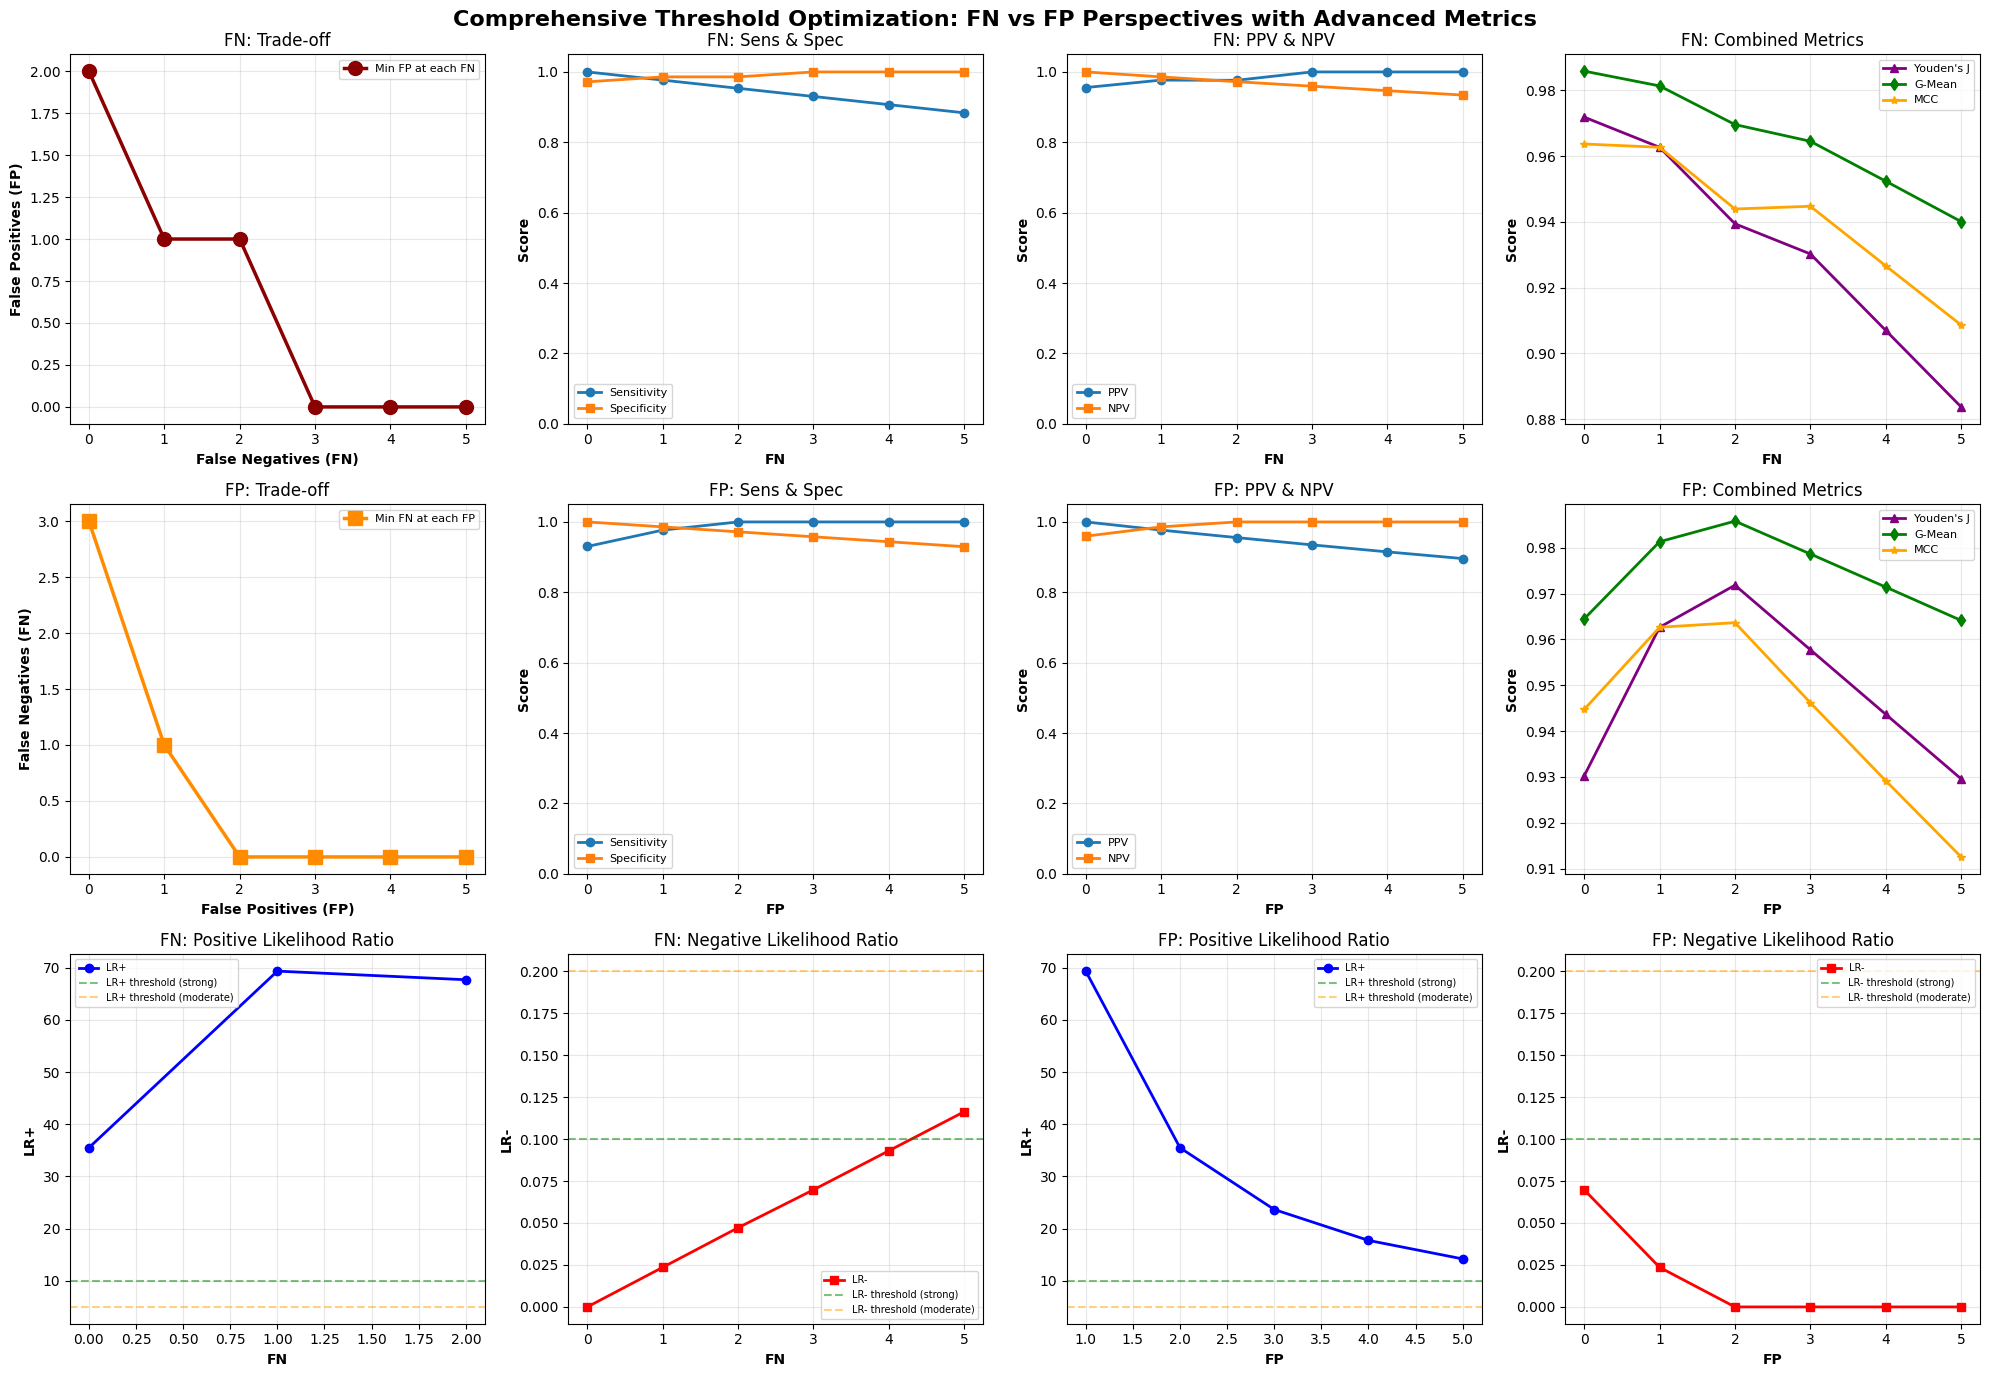

In [83]:
# ============================================================================
# DUAL THRESHOLD OPTIMIZATION WITH COMPREHENSIVE METRICS
# ============================================================================

from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score, matthews_corrcoef
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('='*100)
print("RANDOM FOREST: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS")
print('='*100)

# Predicted probabilities on test set
y_proba = best_rf.predict_proba(X_test_t)[:, 1]

# Use unique sorted thresholds from predictions
unique_thresholds = np.sort(np.unique(y_proba))

# Calculate metrics for each threshold
threshold_results = []

for threshold in unique_thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    balanced_acc = (recall + specificity) / 2
    
    youden_j = recall + specificity - 1
    
    lr_plus = recall / fpr if fpr > 0 else float('inf')
    lr_minus = fnr / specificity if specificity > 0 else float('inf')
    
    g_mean = np.sqrt(recall * specificity)
    
    mcc = matthews_corrcoef(y_test, y_pred)
    
    markedness = precision + npv - 1
    
    dor = lr_plus / lr_minus if lr_minus > 0 and not np.isinf(lr_plus) and not np.isinf(lr_minus) else np.nan
    
    threshold_results.append({
        'threshold': threshold,
        'FN': fn,
        'FP': fp,
        'TP': tp,
        'TN': tn,
        'sensitivity': recall,  # Renamed for clarity
        'specificity': specificity,
        'ppv': precision,  # Renamed from precision
        'npv': npv,
        'f1_score': f1,
        'youden_j': youden_j,
        'lr_plus': lr_plus,
        'lr_minus': lr_minus,
        'g_mean': g_mean,
        'mcc': mcc,
        'markedness': markedness,
        'dor': dor,
        'fpr': fpr,
        'fnr': fnr,
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc
    })

results_df = pd.DataFrame(threshold_results)

fpr_roc, tpr_roc, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr_roc, tpr_roc)
pr_auc = average_precision_score(y_test, y_proba)

print(f"\nThreshold-Independent Metrics:")
print(f"  ROC-AUC: {roc_auc:.4f}")
print(f"  PR-AUC (Average Precision): {pr_auc:.4f}")
print(f"  Total Test Samples: {len(y_test)}")
print(f"  Positive Cases (disease): {y_test.sum()}")
print(f"  Negative Cases (No-disease): {len(y_test) - y_test.sum()}")

# ============================================================================
# TABLE 1: MINIMUM FP AT EACH FN LEVEL (0-5)
# ============================================================================

optimal_by_fn = []
for fn_level in range(6):  # FN = 0, 1, 2, 3, 4, 5
    fn_subset = results_df[results_df['FN'] == fn_level]
    if len(fn_subset) > 0:
        best_at_fn = fn_subset.loc[fn_subset['FP'].idxmin()]
        optimal_by_fn.append(best_at_fn)

optimal_fn_df = pd.DataFrame(optimal_by_fn)

print("\n" + "="*100)
print("TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)")
print("="*100)

fn_table = optimal_fn_df[['FN', 'FP', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fn_table.columns = ['FN', 'FP', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fn_table = fn_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fn_table[['FN', 'FP', 'TP', 'TN']] = fn_table[['FN', 'FP', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fn_table = fn_table.replace([np.inf, -np.inf], 999.99)

print(fn_table.to_string(index=False))
print("="*100)

print("\nMETRIC INTERPRETATION GUIDE:")
print("  Sensitivity (Recall): % of disease cases correctly identified")
print("  Specificity: % of non-disease cases correctly identified")
print("  PPV (Precision): When test says disease, % actually having disease")
print("  NPV: When test says no disease, % actually not having disease")
print("  Youden's J: Sensitivity + Specificity - 1 (0-1, higher better, optimal threshold marker)")
print("  LR+: >10 strong evidence for disease, 5-10 moderate, <5 weak")
print("  LR-: <0.1 strong evidence against disease, 0.1-0.2 moderate, >0.2 weak")
print("  G-Mean: Geometric mean of Sensitivity & Specificity (balanced performance)")
print("  MCC: Matthews Correlation (-1 to +1, considers all CM elements)")
print("="*100)

# ============================================================================
# TABLE 2: MINIMUM FN AT EACH FP LEVEL (0-5)
# ============================================================================

optimal_by_fp = []
for fp_level in range(6):  # FP = 0, 1, 2, 3, 4, 5
    fp_subset = results_df[results_df['FP'] == fp_level]
    if len(fp_subset) > 0:
        best_at_fp = fp_subset.loc[fp_subset['FN'].idxmin()]
        optimal_by_fp.append(best_at_fp)

optimal_fp_df = pd.DataFrame(optimal_by_fp)

print("\n" + "="*100)
print("TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL (0-5)")
print("="*100)

fp_table = optimal_fp_df[['FP', 'FN', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fp_table.columns = ['FP', 'FN', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fp_table = fp_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fp_table[['FP', 'FN', 'TP', 'TN']] = fp_table[['FP', 'FN', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fp_table = fp_table.replace([np.inf, -np.inf], 999.99)

print(fp_table.to_string(index=False))
print("="*100)

# ============================================================================
# FIND OPTIMAL THRESHOLDS BASED ON DIFFERENT CRITERIA
# ============================================================================

print("\n" + "="*100)
print("OPTIMAL THRESHOLD RECOMMENDATIONS")
print("="*100)

# 1. Maximum Youden's Index (best balance of Sens + Spec)
best_youden = results_df.loc[results_df['youden_j'].idxmax()]
print(f"\n1. MAXIMUM YOUDEN'S INDEX (Best Sens+Spec Balance):")
print(f"   Threshold: {best_youden['threshold']:.6f}")
print(f"   Youden's J: {best_youden['youden_j']:.4f}")
print(f"   Sensitivity: {best_youden['sensitivity']:.1%}, Specificity: {best_youden['specificity']:.1%}")
print(f"   FN={int(best_youden['FN'])}, FP={int(best_youden['FP'])}")
print(f"   PPV: {best_youden['ppv']:.1%}, NPV: {best_youden['npv']:.1%}")
print(f"   LR+: {best_youden['lr_plus']:.2f}, LR-: {best_youden['lr_minus']:.4f}")
print(f"   → Use for: General screening with balanced sensitivity/specificity")

# 2. Maximum G-Mean
best_gmean = results_df.loc[results_df['g_mean'].idxmax()]
print(f"\n2. MAXIMUM G-MEAN (Geometric Balance):")
print(f"   Threshold: {best_gmean['threshold']:.6f}")
print(f"   G-Mean: {best_gmean['g_mean']:.4f}")
print(f"   Sensitivity: {best_gmean['sensitivity']:.1%}, Specificity: {best_gmean['specificity']:.1%}")
print(f"   FN={int(best_gmean['FN'])}, FP={int(best_gmean['FP'])}")
print(f"   → Use for: Imbalanced datasets requiring geometric balance")

# 3. Maximum MCC
best_mcc = results_df.loc[results_df['mcc'].idxmax()]
print(f"\n3. MAXIMUM MCC (Overall Best Classifier):")
print(f"   Threshold: {best_mcc['threshold']:.6f}")
print(f"   MCC: {best_mcc['mcc']:.4f}")
print(f"   Sensitivity: {best_mcc['sensitivity']:.1%}, Specificity: {best_mcc['specificity']:.1%}")
print(f"   FN={int(best_mcc['FN'])}, FP={int(best_mcc['FP'])}")
print(f"   → Use for: Overall best classification performance")

# 4. Best from FN Table 1 (excluding FN=0)
if len(optimal_fn_df) > 1:
    fn_valid = optimal_fn_df[optimal_fn_df['FN'] > 0]
    if len(fn_valid) > 0:
        best_fn_youden = fn_valid.loc[fn_valid['youden_j'].idxmax()]
        print(f"\n4. BEST FROM FN PERSPECTIVE (FN=1-5, Highest Youden):")
        print(f"   Threshold: {best_fn_youden['threshold']:.6f}")
        print(f"   FN={int(best_fn_youden['FN'])}, FP={int(best_fn_youden['FP'])}")
        print(f"   Youden's J: {best_fn_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fn_youden['sensitivity']:.1%}, Specificity: {best_fn_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize missed cases while maintaining balance")

# 5. Best from FP Table 2
if len(optimal_fp_df) > 0:
    fp_valid = optimal_fp_df[optimal_fp_df['FP'] > 0]
    if len(fp_valid) > 0:
        best_fp_youden = fp_valid.loc[fp_valid['youden_j'].idxmax()]
        print(f"\n5. BEST FROM FP PERSPECTIVE (FP=1-5, Highest Youden):")
        print(f"   Threshold: {best_fp_youden['threshold']:.6f}")
        print(f"   FP={int(best_fp_youden['FP'])}, FN={int(best_fp_youden['FN'])}")
        print(f"   Youden's J: {best_fp_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fp_youden['sensitivity']:.1%}, Specificity: {best_fp_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize false alarms while maintaining balance")

# 6. High Sensitivity (>95%) with best Specificity
high_sens = results_df[results_df['sensitivity'] >= 0.95]
if len(high_sens) > 0:
    best_high_sens = high_sens.loc[high_sens['specificity'].idxmax()]
    print(f"\n6. HIGH SENSITIVITY PRIORITY (Sens ≥95%, Best Spec):")
    print(f"   Threshold: {best_high_sens['threshold']:.6f}")
    print(f"   Sensitivity: {best_high_sens['sensitivity']:.1%}, Specificity: {best_high_sens['specificity']:.1%}")
    print(f"   FN={int(best_high_sens['FN'])}, FP={int(best_high_sens['FP'])}")
    print(f"   NPV: {best_high_sens['npv']:.1%}")
    print(f"   → Use for: Screening where missing disease cases is unacceptable")

# 7. High Specificity (>95%) with best Sensitivity
high_spec = results_df[results_df['specificity'] >= 0.95]
if len(high_spec) > 0:
    best_high_spec = high_spec.loc[high_spec['sensitivity'].idxmax()]
    print(f"\n7. HIGH SPECIFICITY PRIORITY (Spec ≥95%, Best Sens):")
    print(f"   Threshold: {best_high_spec['threshold']:.6f}")
    print(f"   Specificity: {best_high_spec['specificity']:.1%}, Sensitivity: {best_high_spec['sensitivity']:.1%}")
    print(f"   FP={int(best_high_spec['FP'])}, FN={int(best_high_spec['FN'])}")
    print(f"   PPV: {best_high_spec['ppv']:.1%}")
    print(f"   → Use for: Confirmatory testing, avoiding false alarms")

print("="*100)

# ============================================================================
# ENHANCED VISUALIZATION
# ============================================================================

fig = plt.figure(figsize=(20, 14))
fig.suptitle('Comprehensive Threshold Optimization: FN vs FP Perspectives with Advanced Metrics', 
             fontsize=16, fontweight='bold')

# Row 1: FN Perspective
ax1 = plt.subplot(3, 4, 1)
ax1.plot(optimal_fn_df['FN'], optimal_fn_df['FP'], marker='o', linewidth=2.5, 
         markersize=10, color='darkred', label='Min FP at each FN')
ax1.set_xlabel('False Negatives (FN)', fontweight='bold')
ax1.set_ylabel('False Positives (FP)', fontweight='bold')
ax1.set_title('FN: Trade-off')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=8)

ax2 = plt.subplot(3, 4, 2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax2.set_xlabel('FN', fontweight='bold')
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_title('FN: Sens & Spec')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.05])

ax3 = plt.subplot(3, 4, 3)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['ppv'], marker='o', label='PPV', linewidth=2)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['npv'], marker='s', label='NPV', linewidth=2)
ax3.set_xlabel('FN', fontweight='bold')
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_title('FN: PPV & NPV')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 1.05])

ax4 = plt.subplot(3, 4, 4)
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax4.set_xlabel('FN', fontweight='bold')
ax4.set_ylabel('Score', fontweight='bold')
ax4.set_title('FN: Combined Metrics')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

# Row 2: FP Perspective
ax5 = plt.subplot(3, 4, 5)
ax5.plot(optimal_fp_df['FP'], optimal_fp_df['FN'], marker='s', linewidth=2.5, 
         markersize=10, color='darkorange', label='Min FN at each FP')
ax5.set_xlabel('False Positives (FP)', fontweight='bold')
ax5.set_ylabel('False Negatives (FN)', fontweight='bold')
ax5.set_title('FP: Trade-off')
ax5.grid(True, alpha=0.3)
ax5.legend(fontsize=8)

ax6 = plt.subplot(3, 4, 6)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax6.set_xlabel('FP', fontweight='bold')
ax6.set_ylabel('Score', fontweight='bold')
ax6.set_title('FP: Sens & Spec')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3)
ax6.set_ylim([0, 1.05])

ax7 = plt.subplot(3, 4, 7)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['ppv'], marker='o', label='PPV', linewidth=2)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['npv'], marker='s', label='NPV', linewidth=2)
ax7.set_xlabel('FP', fontweight='bold')
ax7.set_ylabel('Score', fontweight='bold')
ax7.set_title('FP: PPV & NPV')
ax7.legend(fontsize=8)
ax7.grid(True, alpha=0.3)
ax7.set_ylim([0, 1.05])

ax8 = plt.subplot(3, 4, 8)
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax8.set_xlabel('FP', fontweight='bold')
ax8.set_ylabel('Score', fontweight='bold')
ax8.set_title('FP: Combined Metrics')
ax8.legend(fontsize=8)
ax8.grid(True, alpha=0.3)

# Row 3: Likelihood Ratios and Combined
ax9 = plt.subplot(3, 4, 9)
# Filter out infinite values for plotting
fn_lr = optimal_fn_df[optimal_fn_df['lr_plus'] < 100].copy()
if len(fn_lr) > 0:
    ax9.plot(fn_lr['FN'], fn_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax9.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax9.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax9.set_xlabel('FN', fontweight='bold')
ax9.set_ylabel('LR+', fontweight='bold')
ax9.set_title('FN: Positive Likelihood Ratio')
ax9.legend(fontsize=7)
ax9.grid(True, alpha=0.3)

ax10 = plt.subplot(3, 4, 10)
ax10.plot(optimal_fn_df['FN'], optimal_fn_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax10.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax10.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax10.set_xlabel('FN', fontweight='bold')
ax10.set_ylabel('LR-', fontweight='bold')
ax10.set_title('FN: Negative Likelihood Ratio')
ax10.legend(fontsize=7)
ax10.grid(True, alpha=0.3)

ax11 = plt.subplot(3, 4, 11)
fp_lr = optimal_fp_df[optimal_fp_df['lr_plus'] < 100].copy()
if len(fp_lr) > 0:
    ax11.plot(fp_lr['FP'], fp_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax11.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax11.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax11.set_xlabel('FP', fontweight='bold')
ax11.set_ylabel('LR+', fontweight='bold')
ax11.set_title('FP: Positive Likelihood Ratio')
ax11.legend(fontsize=7)
ax11.grid(True, alpha=0.3)

ax12 = plt.subplot(3, 4, 12)
ax12.plot(optimal_fp_df['FP'], optimal_fp_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax12.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax12.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax12.set_xlabel('FP', fontweight='bold')
ax12.set_ylabel('LR-', fontweight='bold')
ax12.set_title('FP: Negative Likelihood Ratio')
ax12.legend(fontsize=7)
ax12.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



# ADABOOST

In [84]:
print('='*50)
print('ADABOOST')
print('='*50)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


adaboost = AdaBoostClassifier(
    estimator= DecisionTreeClassifier(max_depth= 1,
                                      class_weight= 'balanced')
    )

params = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3]
}

grid = GridSearchCV(
    estimator= adaboost,
    param_grid= params,
    cv= cv,
    scoring= 'average_precision',
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_t, y_train)

print(f"\nBest params: {grid.best_params_}")
print(f"Best CV-PR-AUC: {grid.best_score_:.4f}")

best_adaboost = grid.best_estimator_

y_pred = best_adaboost.predict(X_test_t)
y_proba = best_adaboost.predict_proba(X_test_t)[:, 1]

print(f"\nROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



ADABOOST
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best params: {'estimator__max_depth': 2, 'learning_rate': 1.0, 'n_estimators': 300}
Best CV-PR-AUC: 0.9944

ROC AUC: 0.9938
PR-AUC: 0.9915
Accuracy: 0.9737
Balanced Accuracy: 0.9697
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[70  1]
 [ 2 41]]


ADABOOST: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS

Threshold-Independent Metrics:
  ROC-AUC: 0.9938
  PR-AUC (Average Precision): 0.9915
  Total Test Samples: 114
  Positive Cases (disease): 43
  Negative Cases (No-disease): 71

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)
 FN  FP  TP  TN  Threshold  Sensitivity  Specificity    PPV    NPV  F1-Score  Youden_J    LR+    LR-  G-Mean    MCC    FPR  Accuracy  Balanced_Acc
  0  13  43  58   0.355038       1.0000       0.8169 0.7679 1.0000    0.8687    0.8169   5.46 0.0000  0.9038 0.7920 0.1831    0.8860        0.9085
  1   4  42  67   0.425120       0.9767       0.9437 0.9130 0.9853    0.9438    0.9204  17.34 0.0246  0.9601 0.9093 0.0563    0.9561        0.9602
  2   1  41  70   0.540582       0.9535       0.9859 0.9762 0.9722    0.9647    0.9394  67.70 0.0472  0.9696 0.9439 0.0141    0.9737        0.9697
  3   1  40  70   0.543209       0.9302       0.9859 0.9756 0.9589    0.9524    0.9161  66.05 0.0

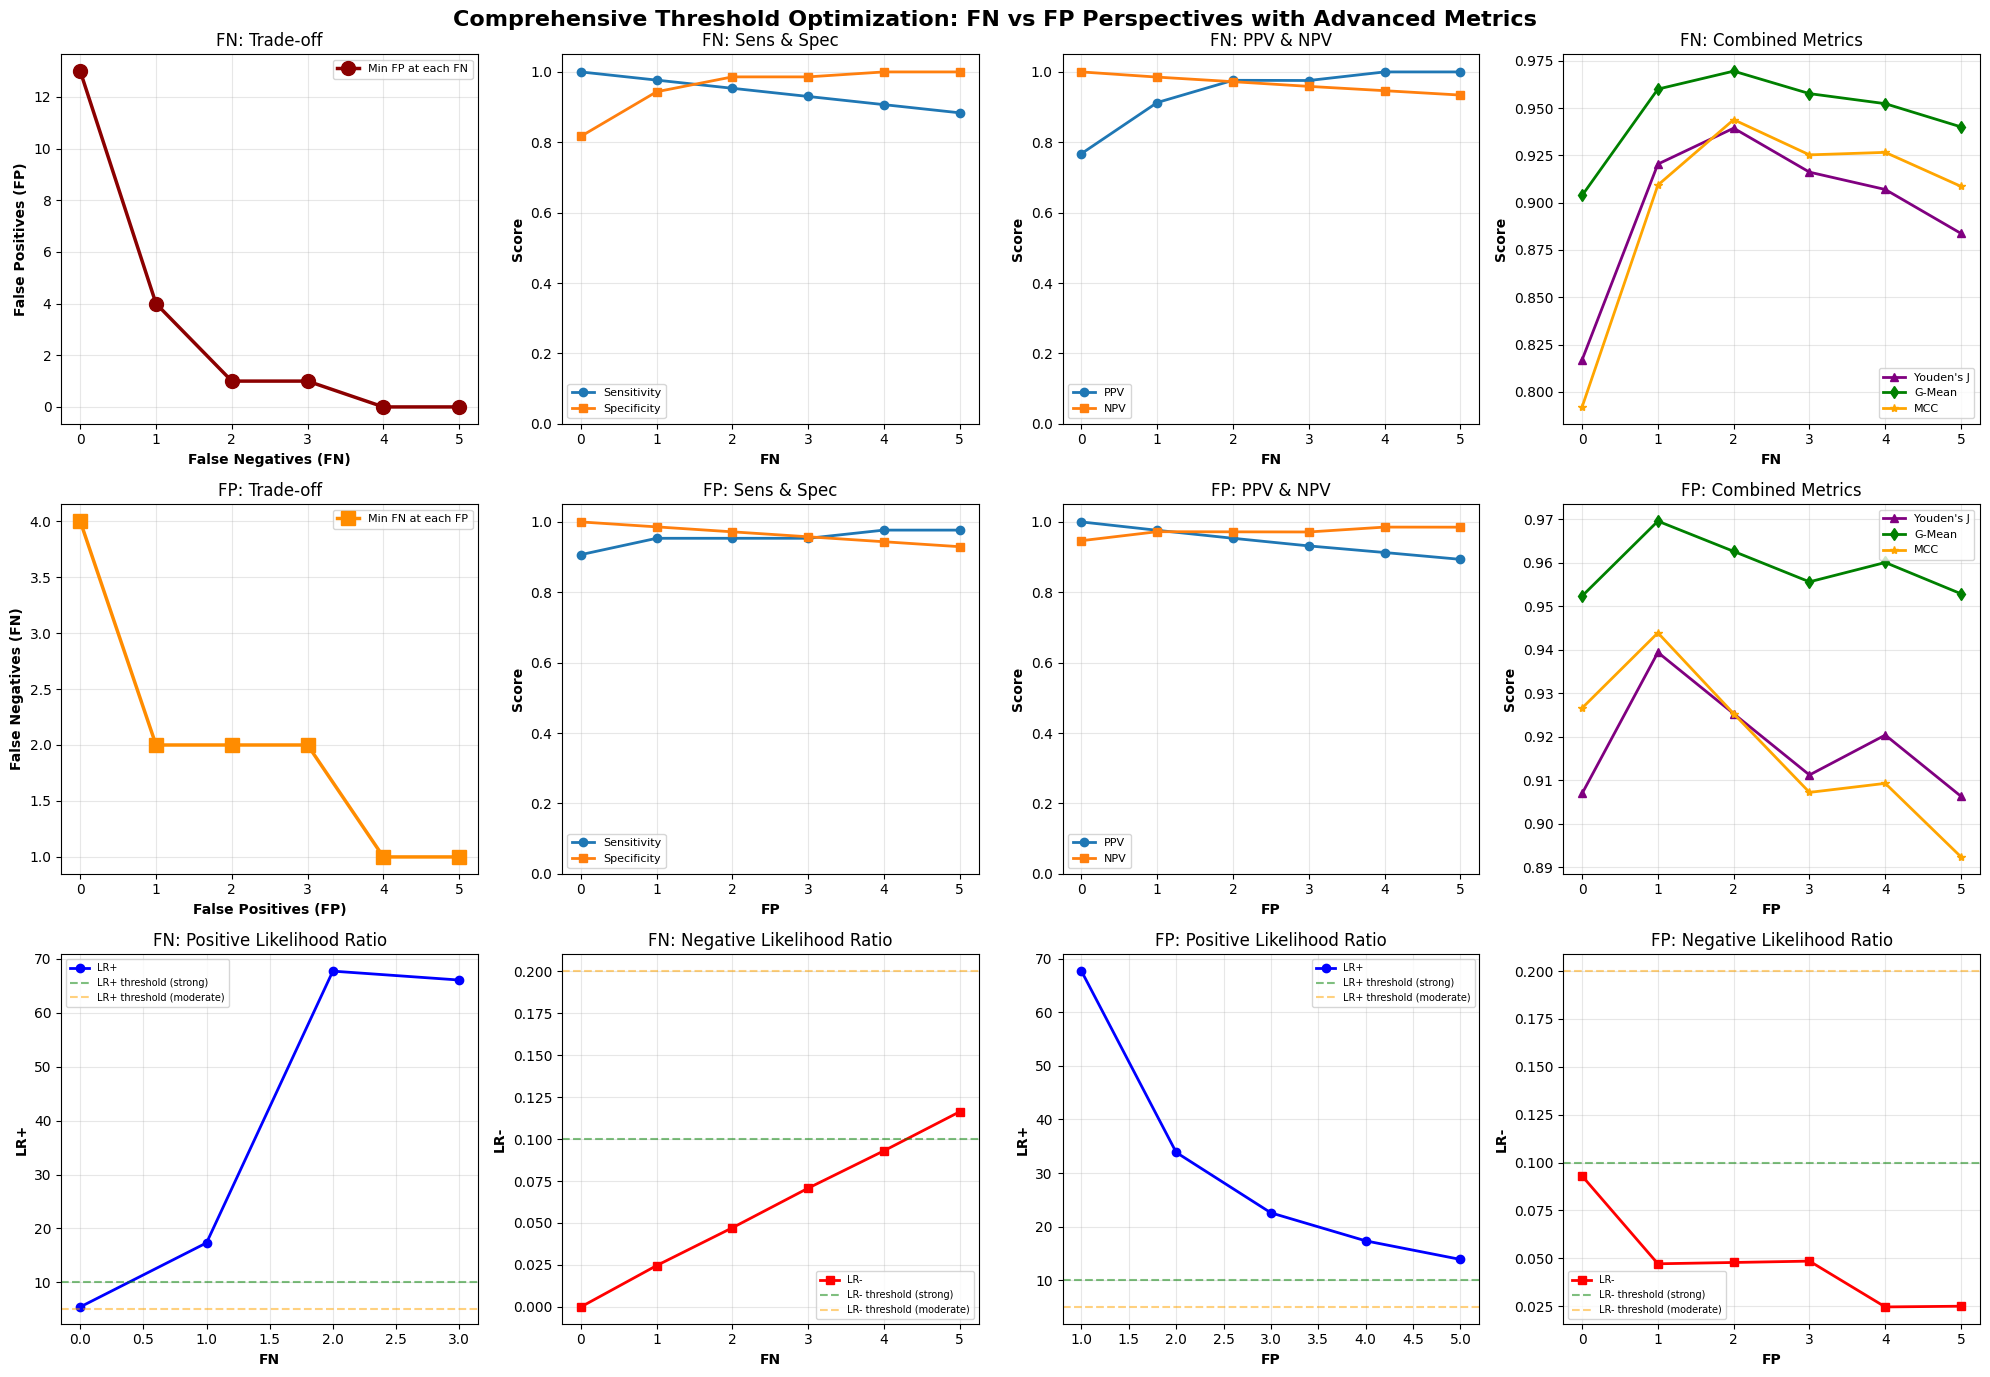

In [85]:
# ============================================================================
# DUAL THRESHOLD OPTIMIZATION WITH COMPREHENSIVE METRICS
# ============================================================================

from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score, matthews_corrcoef
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('='*100)
print("ADABOOST: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS")
print('='*100)

# Predicted probabilities on test set
y_proba = best_adaboost.predict_proba(X_test_t)[:, 1]

# Use unique sorted thresholds from predictions
unique_thresholds = np.sort(np.unique(y_proba))

# Calculate metrics for each threshold
threshold_results = []

for threshold in unique_thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    balanced_acc = (recall + specificity) / 2
    
    youden_j = recall + specificity - 1
    
    lr_plus = recall / fpr if fpr > 0 else float('inf')
    lr_minus = fnr / specificity if specificity > 0 else float('inf')
    
    g_mean = np.sqrt(recall * specificity)
    
    mcc = matthews_corrcoef(y_test, y_pred)
    
    markedness = precision + npv - 1
    
    dor = lr_plus / lr_minus if lr_minus > 0 and not np.isinf(lr_plus) and not np.isinf(lr_minus) else np.nan
    
    threshold_results.append({
        'threshold': threshold,
        'FN': fn,
        'FP': fp,
        'TP': tp,
        'TN': tn,
        'sensitivity': recall,  # Renamed for clarity
        'specificity': specificity,
        'ppv': precision,  # Renamed from precision
        'npv': npv,
        'f1_score': f1,
        'youden_j': youden_j,
        'lr_plus': lr_plus,
        'lr_minus': lr_minus,
        'g_mean': g_mean,
        'mcc': mcc,
        'markedness': markedness,
        'dor': dor,
        'fpr': fpr,
        'fnr': fnr,
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc
    })

results_df = pd.DataFrame(threshold_results)

fpr_roc, tpr_roc, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr_roc, tpr_roc)
pr_auc = average_precision_score(y_test, y_proba)

print(f"\nThreshold-Independent Metrics:")
print(f"  ROC-AUC: {roc_auc:.4f}")
print(f"  PR-AUC (Average Precision): {pr_auc:.4f}")
print(f"  Total Test Samples: {len(y_test)}")
print(f"  Positive Cases (disease): {y_test.sum()}")
print(f"  Negative Cases (No-disease): {len(y_test) - y_test.sum()}")

# ============================================================================
# TABLE 1: MINIMUM FP AT EACH FN LEVEL (0-5)
# ============================================================================

optimal_by_fn = []
for fn_level in range(6):  # FN = 0, 1, 2, 3, 4, 5
    fn_subset = results_df[results_df['FN'] == fn_level]
    if len(fn_subset) > 0:
        best_at_fn = fn_subset.loc[fn_subset['FP'].idxmin()]
        optimal_by_fn.append(best_at_fn)

optimal_fn_df = pd.DataFrame(optimal_by_fn)

print("\n" + "="*100)
print("TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)")
print("="*100)

fn_table = optimal_fn_df[['FN', 'FP', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fn_table.columns = ['FN', 'FP', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fn_table = fn_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fn_table[['FN', 'FP', 'TP', 'TN']] = fn_table[['FN', 'FP', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fn_table = fn_table.replace([np.inf, -np.inf], 999.99)

print(fn_table.to_string(index=False))
print("="*100)

print("\nMETRIC INTERPRETATION GUIDE:")
print("  Sensitivity (Recall): % of disease cases correctly identified")
print("  Specificity: % of non-disease cases correctly identified")
print("  PPV (Precision): When test says disease, % actually having disease")
print("  NPV: When test says no disease, % actually not having disease")
print("  Youden's J: Sensitivity + Specificity - 1 (0-1, higher better, optimal threshold marker)")
print("  LR+: >10 strong evidence for disease, 5-10 moderate, <5 weak")
print("  LR-: <0.1 strong evidence against disease, 0.1-0.2 moderate, >0.2 weak")
print("  G-Mean: Geometric mean of Sensitivity & Specificity (balanced performance)")
print("  MCC: Matthews Correlation (-1 to +1, considers all CM elements)")
print("="*100)

# ============================================================================
# TABLE 2: MINIMUM FN AT EACH FP LEVEL (0-5)
# ============================================================================

optimal_by_fp = []
for fp_level in range(6):  # FP = 0, 1, 2, 3, 4, 5
    fp_subset = results_df[results_df['FP'] == fp_level]
    if len(fp_subset) > 0:
        best_at_fp = fp_subset.loc[fp_subset['FN'].idxmin()]
        optimal_by_fp.append(best_at_fp)

optimal_fp_df = pd.DataFrame(optimal_by_fp)

print("\n" + "="*100)
print("TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL (0-5)")
print("="*100)

fp_table = optimal_fp_df[['FP', 'FN', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fp_table.columns = ['FP', 'FN', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fp_table = fp_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fp_table[['FP', 'FN', 'TP', 'TN']] = fp_table[['FP', 'FN', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fp_table = fp_table.replace([np.inf, -np.inf], 999.99)

print(fp_table.to_string(index=False))
print("="*100)

# ============================================================================
# FIND OPTIMAL THRESHOLDS BASED ON DIFFERENT CRITERIA
# ============================================================================

print("\n" + "="*100)
print("OPTIMAL THRESHOLD RECOMMENDATIONS")
print("="*100)

# 1. Maximum Youden's Index (best balance of Sens + Spec)
best_youden = results_df.loc[results_df['youden_j'].idxmax()]
print(f"\n1. MAXIMUM YOUDEN'S INDEX (Best Sens+Spec Balance):")
print(f"   Threshold: {best_youden['threshold']:.6f}")
print(f"   Youden's J: {best_youden['youden_j']:.4f}")
print(f"   Sensitivity: {best_youden['sensitivity']:.1%}, Specificity: {best_youden['specificity']:.1%}")
print(f"   FN={int(best_youden['FN'])}, FP={int(best_youden['FP'])}")
print(f"   PPV: {best_youden['ppv']:.1%}, NPV: {best_youden['npv']:.1%}")
print(f"   LR+: {best_youden['lr_plus']:.2f}, LR-: {best_youden['lr_minus']:.4f}")
print(f"   → Use for: General screening with balanced sensitivity/specificity")

# 2. Maximum G-Mean
best_gmean = results_df.loc[results_df['g_mean'].idxmax()]
print(f"\n2. MAXIMUM G-MEAN (Geometric Balance):")
print(f"   Threshold: {best_gmean['threshold']:.6f}")
print(f"   G-Mean: {best_gmean['g_mean']:.4f}")
print(f"   Sensitivity: {best_gmean['sensitivity']:.1%}, Specificity: {best_gmean['specificity']:.1%}")
print(f"   FN={int(best_gmean['FN'])}, FP={int(best_gmean['FP'])}")
print(f"   → Use for: Imbalanced datasets requiring geometric balance")

# 3. Maximum MCC
best_mcc = results_df.loc[results_df['mcc'].idxmax()]
print(f"\n3. MAXIMUM MCC (Overall Best Classifier):")
print(f"   Threshold: {best_mcc['threshold']:.6f}")
print(f"   MCC: {best_mcc['mcc']:.4f}")
print(f"   Sensitivity: {best_mcc['sensitivity']:.1%}, Specificity: {best_mcc['specificity']:.1%}")
print(f"   FN={int(best_mcc['FN'])}, FP={int(best_mcc['FP'])}")
print(f"   → Use for: Overall best classification performance")

# 4. Best from FN Table 1 (excluding FN=0)
if len(optimal_fn_df) > 1:
    fn_valid = optimal_fn_df[optimal_fn_df['FN'] > 0]
    if len(fn_valid) > 0:
        best_fn_youden = fn_valid.loc[fn_valid['youden_j'].idxmax()]
        print(f"\n4. BEST FROM FN PERSPECTIVE (FN=1-5, Highest Youden):")
        print(f"   Threshold: {best_fn_youden['threshold']:.6f}")
        print(f"   FN={int(best_fn_youden['FN'])}, FP={int(best_fn_youden['FP'])}")
        print(f"   Youden's J: {best_fn_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fn_youden['sensitivity']:.1%}, Specificity: {best_fn_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize missed cases while maintaining balance")

# 5. Best from FP Table 2
if len(optimal_fp_df) > 0:
    fp_valid = optimal_fp_df[optimal_fp_df['FP'] > 0]
    if len(fp_valid) > 0:
        best_fp_youden = fp_valid.loc[fp_valid['youden_j'].idxmax()]
        print(f"\n5. BEST FROM FP PERSPECTIVE (FP=1-5, Highest Youden):")
        print(f"   Threshold: {best_fp_youden['threshold']:.6f}")
        print(f"   FP={int(best_fp_youden['FP'])}, FN={int(best_fp_youden['FN'])}")
        print(f"   Youden's J: {best_fp_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fp_youden['sensitivity']:.1%}, Specificity: {best_fp_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize false alarms while maintaining balance")

# 6. High Sensitivity (>95%) with best Specificity
high_sens = results_df[results_df['sensitivity'] >= 0.95]
if len(high_sens) > 0:
    best_high_sens = high_sens.loc[high_sens['specificity'].idxmax()]
    print(f"\n6. HIGH SENSITIVITY PRIORITY (Sens ≥95%, Best Spec):")
    print(f"   Threshold: {best_high_sens['threshold']:.6f}")
    print(f"   Sensitivity: {best_high_sens['sensitivity']:.1%}, Specificity: {best_high_sens['specificity']:.1%}")
    print(f"   FN={int(best_high_sens['FN'])}, FP={int(best_high_sens['FP'])}")
    print(f"   NPV: {best_high_sens['npv']:.1%}")
    print(f"   → Use for: Screening where missing disease cases is unacceptable")

# 7. High Specificity (>95%) with best Sensitivity
high_spec = results_df[results_df['specificity'] >= 0.95]
if len(high_spec) > 0:
    best_high_spec = high_spec.loc[high_spec['sensitivity'].idxmax()]
    print(f"\n7. HIGH SPECIFICITY PRIORITY (Spec ≥95%, Best Sens):")
    print(f"   Threshold: {best_high_spec['threshold']:.6f}")
    print(f"   Specificity: {best_high_spec['specificity']:.1%}, Sensitivity: {best_high_spec['sensitivity']:.1%}")
    print(f"   FP={int(best_high_spec['FP'])}, FN={int(best_high_spec['FN'])}")
    print(f"   PPV: {best_high_spec['ppv']:.1%}")
    print(f"   → Use for: Confirmatory testing, avoiding false alarms")

print("="*100)

# ============================================================================
# ENHANCED VISUALIZATION
# ============================================================================

fig = plt.figure(figsize=(20, 14))
fig.suptitle('Comprehensive Threshold Optimization: FN vs FP Perspectives with Advanced Metrics', 
             fontsize=16, fontweight='bold')

# Row 1: FN Perspective
ax1 = plt.subplot(3, 4, 1)
ax1.plot(optimal_fn_df['FN'], optimal_fn_df['FP'], marker='o', linewidth=2.5, 
         markersize=10, color='darkred', label='Min FP at each FN')
ax1.set_xlabel('False Negatives (FN)', fontweight='bold')
ax1.set_ylabel('False Positives (FP)', fontweight='bold')
ax1.set_title('FN: Trade-off')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=8)

ax2 = plt.subplot(3, 4, 2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax2.set_xlabel('FN', fontweight='bold')
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_title('FN: Sens & Spec')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.05])

ax3 = plt.subplot(3, 4, 3)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['ppv'], marker='o', label='PPV', linewidth=2)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['npv'], marker='s', label='NPV', linewidth=2)
ax3.set_xlabel('FN', fontweight='bold')
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_title('FN: PPV & NPV')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 1.05])

ax4 = plt.subplot(3, 4, 4)
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax4.set_xlabel('FN', fontweight='bold')
ax4.set_ylabel('Score', fontweight='bold')
ax4.set_title('FN: Combined Metrics')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

# Row 2: FP Perspective
ax5 = plt.subplot(3, 4, 5)
ax5.plot(optimal_fp_df['FP'], optimal_fp_df['FN'], marker='s', linewidth=2.5, 
         markersize=10, color='darkorange', label='Min FN at each FP')
ax5.set_xlabel('False Positives (FP)', fontweight='bold')
ax5.set_ylabel('False Negatives (FN)', fontweight='bold')
ax5.set_title('FP: Trade-off')
ax5.grid(True, alpha=0.3)
ax5.legend(fontsize=8)

ax6 = plt.subplot(3, 4, 6)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax6.set_xlabel('FP', fontweight='bold')
ax6.set_ylabel('Score', fontweight='bold')
ax6.set_title('FP: Sens & Spec')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3)
ax6.set_ylim([0, 1.05])

ax7 = plt.subplot(3, 4, 7)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['ppv'], marker='o', label='PPV', linewidth=2)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['npv'], marker='s', label='NPV', linewidth=2)
ax7.set_xlabel('FP', fontweight='bold')
ax7.set_ylabel('Score', fontweight='bold')
ax7.set_title('FP: PPV & NPV')
ax7.legend(fontsize=8)
ax7.grid(True, alpha=0.3)
ax7.set_ylim([0, 1.05])

ax8 = plt.subplot(3, 4, 8)
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax8.set_xlabel('FP', fontweight='bold')
ax8.set_ylabel('Score', fontweight='bold')
ax8.set_title('FP: Combined Metrics')
ax8.legend(fontsize=8)
ax8.grid(True, alpha=0.3)

# Row 3: Likelihood Ratios and Combined
ax9 = plt.subplot(3, 4, 9)
# Filter out infinite values for plotting
fn_lr = optimal_fn_df[optimal_fn_df['lr_plus'] < 100].copy()
if len(fn_lr) > 0:
    ax9.plot(fn_lr['FN'], fn_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax9.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax9.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax9.set_xlabel('FN', fontweight='bold')
ax9.set_ylabel('LR+', fontweight='bold')
ax9.set_title('FN: Positive Likelihood Ratio')
ax9.legend(fontsize=7)
ax9.grid(True, alpha=0.3)

ax10 = plt.subplot(3, 4, 10)
ax10.plot(optimal_fn_df['FN'], optimal_fn_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax10.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax10.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax10.set_xlabel('FN', fontweight='bold')
ax10.set_ylabel('LR-', fontweight='bold')
ax10.set_title('FN: Negative Likelihood Ratio')
ax10.legend(fontsize=7)
ax10.grid(True, alpha=0.3)

ax11 = plt.subplot(3, 4, 11)
fp_lr = optimal_fp_df[optimal_fp_df['lr_plus'] < 100].copy()
if len(fp_lr) > 0:
    ax11.plot(fp_lr['FP'], fp_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax11.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax11.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax11.set_xlabel('FP', fontweight='bold')
ax11.set_ylabel('LR+', fontweight='bold')
ax11.set_title('FP: Positive Likelihood Ratio')
ax11.legend(fontsize=7)
ax11.grid(True, alpha=0.3)

ax12 = plt.subplot(3, 4, 12)
ax12.plot(optimal_fp_df['FP'], optimal_fp_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax12.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax12.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax12.set_xlabel('FP', fontweight='bold')
ax12.set_ylabel('LR-', fontweight='bold')
ax12.set_title('FP: Negative Likelihood Ratio')
ax12.legend(fontsize=7)
ax12.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



# GRADIENT BOOST

In [86]:
print('='*50)
print("GRADIENT BOOST")
print('='*50)

from sklearn.ensemble import GradientBoostingClassifier


gb = GradientBoostingClassifier(
    loss= 'log_loss',
    random_state= 42
)

params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 10, 20],
    'subsample': [0.8, 1.0]
}

cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

grid = GridSearchCV(
    estimator= gb,
    param_grid= params,
    scoring= 'average_precision',
    cv= cv,
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_t, y_train)

print(f"\nBest params: {grid.best_params_}")
print(f"Best CV-PR-AUC: {grid.best_score_:.4f}")

best_gb = grid.best_estimator_

y_pred = best_gb.predict(X_test_t)
y_proba = best_gb.predict_proba(X_test_t)[:, 1]

print(f"\nROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

GRADIENT BOOST
Fitting 5 folds for each of 162 candidates, totalling 810 fits

Best params: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}
Best CV-PR-AUC: 0.9914

ROC AUC: 0.9951
PR-AUC: 0.9928
Accuracy: 0.9649
Balanced Accuracy: 0.9581
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[70  1]
 [ 3 40]]


GRADIENT BOOST: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS

Threshold-Independent Metrics:
  ROC-AUC: 0.9951
  PR-AUC (Average Precision): 0.9928
  Total Test Samples: 114
  Positive Cases (disease): 43
  Negative Cases (No-disease): 71

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)
 FN  FP  TP  TN  Threshold  Sensitivity  Specificity    PPV    NPV  F1-Score  Youden_J    LR+    LR-  G-Mean    MCC    FPR  Accuracy  Balanced_Acc
  0   9  43  62   0.000003       1.0000       0.8732 0.8269 1.0000    0.9053    0.8732   7.89 0.0000  0.9345 0.8498 0.1268    0.9211        0.9366
  1   3  42  68   0.003897       0.9767       0.9577 0.9333 0.9855    0.9545    0.9345  23.12 0.0243  0.9672 0.9266 0.0423    0.9649        0.9672
  2   3  41  68   0.056500       0.9535       0.9577 0.9318 0.9714    0.9425    0.9112  22.57 0.0486  0.9556 0.9072 0.0423    0.9561        0.9556
  3   0  40  71   0.998286       0.9302       1.0000 1.0000 0.9595    0.9639    0.9302 999.

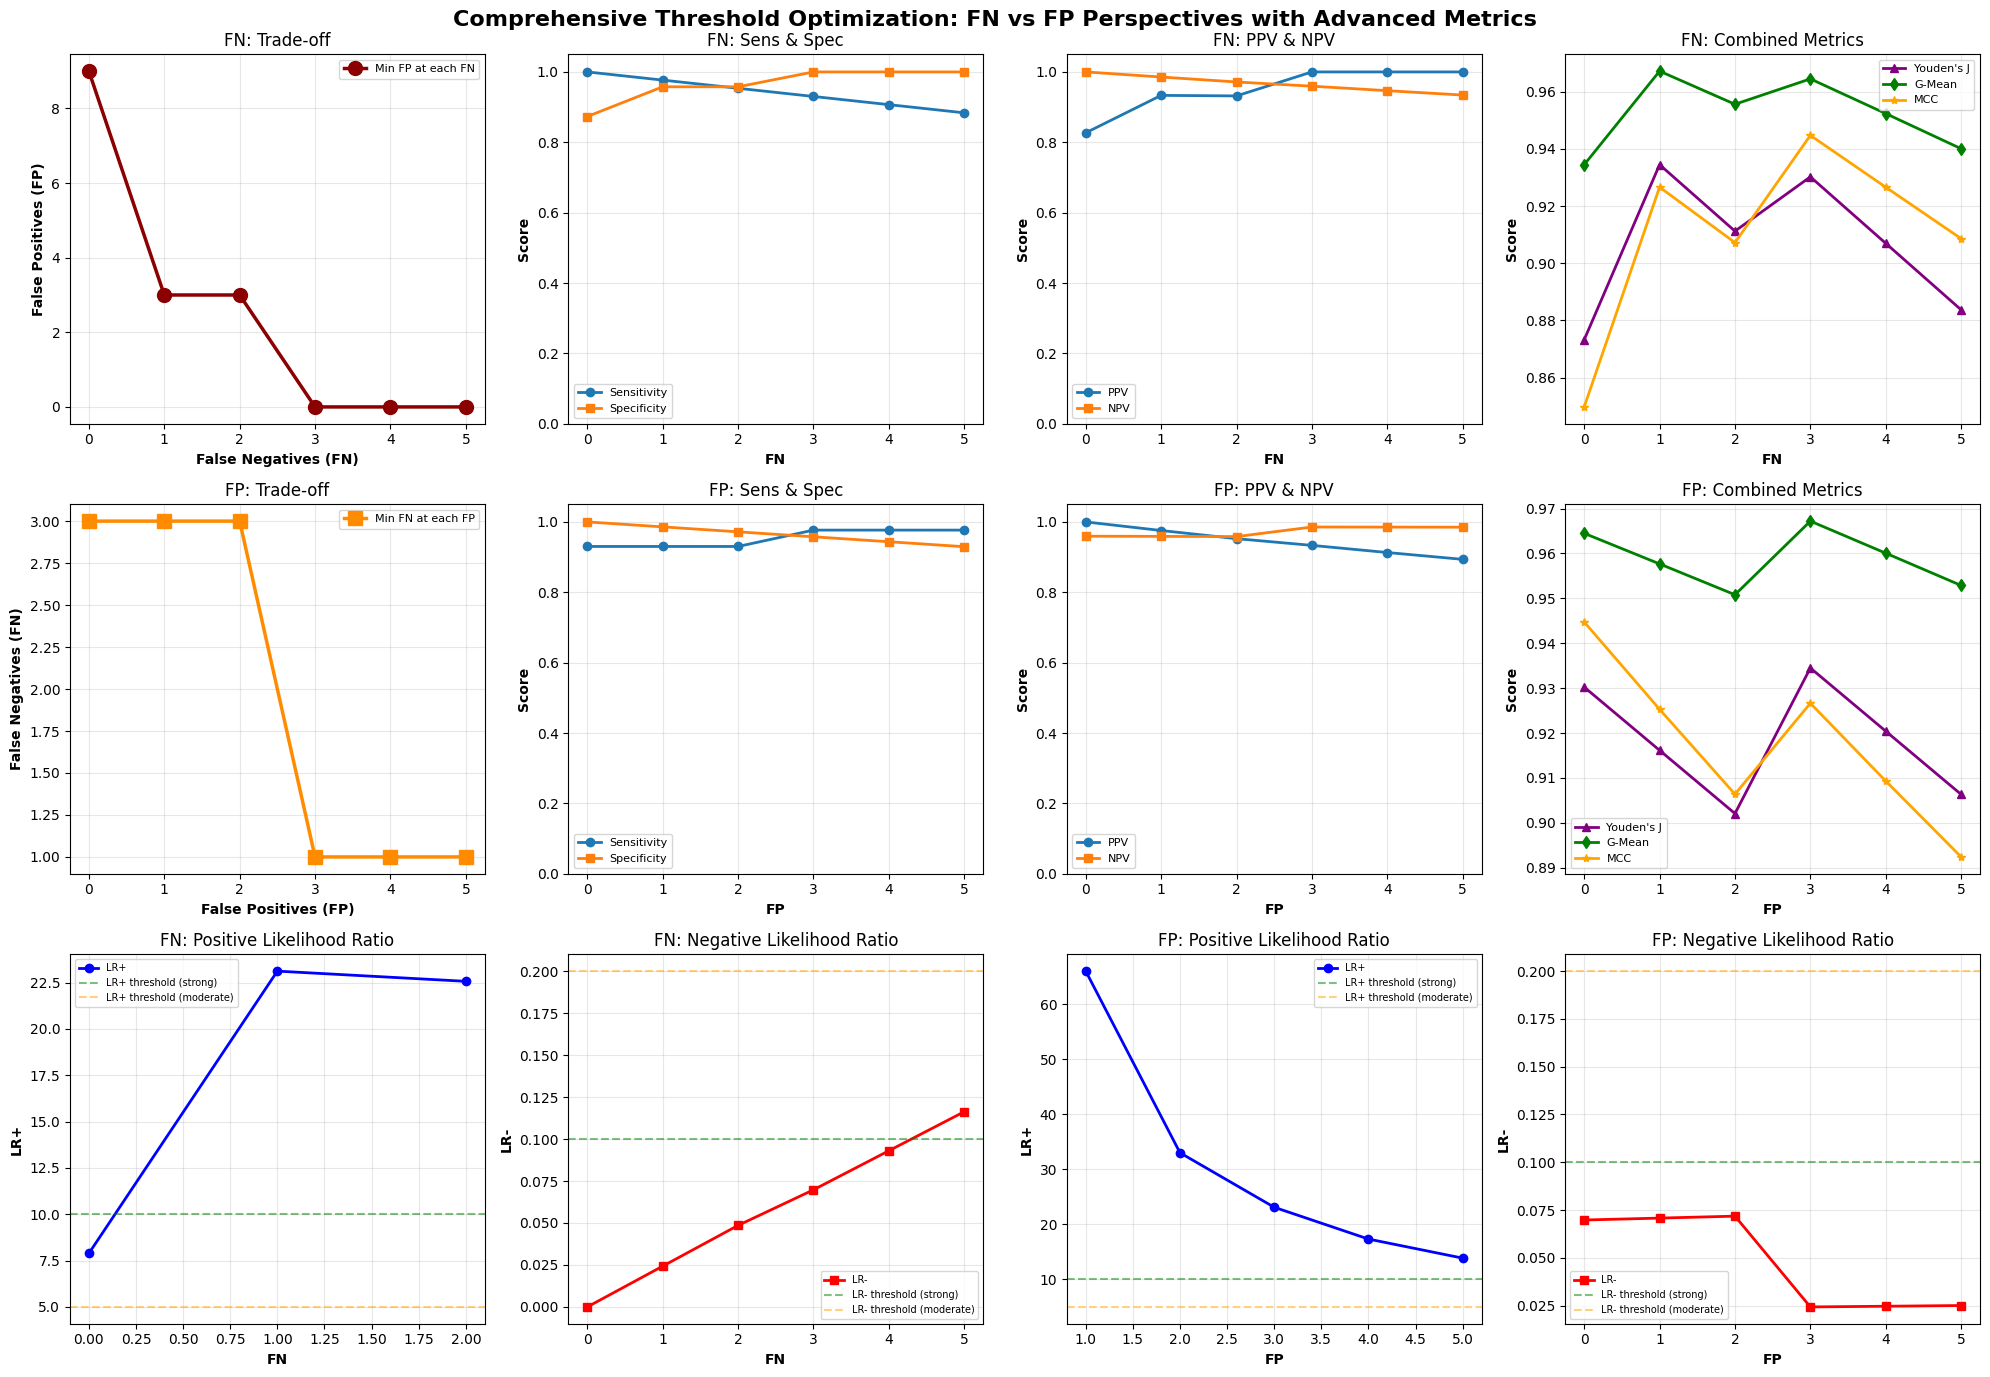

In [88]:
# ============================================================================
# DUAL THRESHOLD OPTIMIZATION WITH COMPREHENSIVE METRICS
# ============================================================================

from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score, matthews_corrcoef
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('='*100)
print("GRADIENT BOOST: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS")
print('='*100)

# Predicted probabilities on test set
y_proba = best_gb.predict_proba(X_test_t)[:, 1]

# Use unique sorted thresholds from predictions
unique_thresholds = np.sort(np.unique(y_proba))

# Calculate metrics for each threshold
threshold_results = []

for threshold in unique_thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    balanced_acc = (recall + specificity) / 2
    
    youden_j = recall + specificity - 1
    
    lr_plus = recall / fpr if fpr > 0 else float('inf')
    lr_minus = fnr / specificity if specificity > 0 else float('inf')
    
    g_mean = np.sqrt(recall * specificity)
    
    mcc = matthews_corrcoef(y_test, y_pred)
    
    markedness = precision + npv - 1
    
    dor = lr_plus / lr_minus if lr_minus > 0 and not np.isinf(lr_plus) and not np.isinf(lr_minus) else np.nan
    
    threshold_results.append({
        'threshold': threshold,
        'FN': fn,
        'FP': fp,
        'TP': tp,
        'TN': tn,
        'sensitivity': recall,  # Renamed for clarity
        'specificity': specificity,
        'ppv': precision,  # Renamed from precision
        'npv': npv,
        'f1_score': f1,
        'youden_j': youden_j,
        'lr_plus': lr_plus,
        'lr_minus': lr_minus,
        'g_mean': g_mean,
        'mcc': mcc,
        'markedness': markedness,
        'dor': dor,
        'fpr': fpr,
        'fnr': fnr,
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc
    })

results_df = pd.DataFrame(threshold_results)

fpr_roc, tpr_roc, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr_roc, tpr_roc)
pr_auc = average_precision_score(y_test, y_proba)

print(f"\nThreshold-Independent Metrics:")
print(f"  ROC-AUC: {roc_auc:.4f}")
print(f"  PR-AUC (Average Precision): {pr_auc:.4f}")
print(f"  Total Test Samples: {len(y_test)}")
print(f"  Positive Cases (disease): {y_test.sum()}")
print(f"  Negative Cases (No-disease): {len(y_test) - y_test.sum()}")

# ============================================================================
# TABLE 1: MINIMUM FP AT EACH FN LEVEL (0-5)
# ============================================================================

optimal_by_fn = []
for fn_level in range(6):  # FN = 0, 1, 2, 3, 4, 5
    fn_subset = results_df[results_df['FN'] == fn_level]
    if len(fn_subset) > 0:
        best_at_fn = fn_subset.loc[fn_subset['FP'].idxmin()]
        optimal_by_fn.append(best_at_fn)

optimal_fn_df = pd.DataFrame(optimal_by_fn)

print("\n" + "="*100)
print("TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)")
print("="*100)

fn_table = optimal_fn_df[['FN', 'FP', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fn_table.columns = ['FN', 'FP', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fn_table = fn_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fn_table[['FN', 'FP', 'TP', 'TN']] = fn_table[['FN', 'FP', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fn_table = fn_table.replace([np.inf, -np.inf], 999.99)

print(fn_table.to_string(index=False))
print("="*100)

print("\nMETRIC INTERPRETATION GUIDE:")
print("  Sensitivity (Recall): % of disease cases correctly identified")
print("  Specificity: % of non-disease cases correctly identified")
print("  PPV (Precision): When test says disease, % actually having disease")
print("  NPV: When test says no disease, % actually not having disease")
print("  Youden's J: Sensitivity + Specificity - 1 (0-1, higher better, optimal threshold marker)")
print("  LR+: >10 strong evidence for disease, 5-10 moderate, <5 weak")
print("  LR-: <0.1 strong evidence against disease, 0.1-0.2 moderate, >0.2 weak")
print("  G-Mean: Geometric mean of Sensitivity & Specificity (balanced performance)")
print("  MCC: Matthews Correlation (-1 to +1, considers all CM elements)")
print("="*100)

# ============================================================================
# TABLE 2: MINIMUM FN AT EACH FP LEVEL (0-5)
# ============================================================================

optimal_by_fp = []
for fp_level in range(6):  # FP = 0, 1, 2, 3, 4, 5
    fp_subset = results_df[results_df['FP'] == fp_level]
    if len(fp_subset) > 0:
        best_at_fp = fp_subset.loc[fp_subset['FN'].idxmin()]
        optimal_by_fp.append(best_at_fp)

optimal_fp_df = pd.DataFrame(optimal_by_fp)

print("\n" + "="*100)
print("TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL (0-5)")
print("="*100)

fp_table = optimal_fp_df[['FP', 'FN', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fp_table.columns = ['FP', 'FN', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fp_table = fp_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fp_table[['FP', 'FN', 'TP', 'TN']] = fp_table[['FP', 'FN', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fp_table = fp_table.replace([np.inf, -np.inf], 999.99)

print(fp_table.to_string(index=False))
print("="*100)

# ============================================================================
# FIND OPTIMAL THRESHOLDS BASED ON DIFFERENT CRITERIA
# ============================================================================

print("\n" + "="*100)
print("OPTIMAL THRESHOLD RECOMMENDATIONS")
print("="*100)

# 1. Maximum Youden's Index (best balance of Sens + Spec)
best_youden = results_df.loc[results_df['youden_j'].idxmax()]
print(f"\n1. MAXIMUM YOUDEN'S INDEX (Best Sens+Spec Balance):")
print(f"   Threshold: {best_youden['threshold']:.6f}")
print(f"   Youden's J: {best_youden['youden_j']:.4f}")
print(f"   Sensitivity: {best_youden['sensitivity']:.1%}, Specificity: {best_youden['specificity']:.1%}")
print(f"   FN={int(best_youden['FN'])}, FP={int(best_youden['FP'])}")
print(f"   PPV: {best_youden['ppv']:.1%}, NPV: {best_youden['npv']:.1%}")
print(f"   LR+: {best_youden['lr_plus']:.2f}, LR-: {best_youden['lr_minus']:.4f}")
print(f"   → Use for: General screening with balanced sensitivity/specificity")

# 2. Maximum G-Mean
best_gmean = results_df.loc[results_df['g_mean'].idxmax()]
print(f"\n2. MAXIMUM G-MEAN (Geometric Balance):")
print(f"   Threshold: {best_gmean['threshold']:.6f}")
print(f"   G-Mean: {best_gmean['g_mean']:.4f}")
print(f"   Sensitivity: {best_gmean['sensitivity']:.1%}, Specificity: {best_gmean['specificity']:.1%}")
print(f"   FN={int(best_gmean['FN'])}, FP={int(best_gmean['FP'])}")
print(f"   → Use for: Imbalanced datasets requiring geometric balance")

# 3. Maximum MCC
best_mcc = results_df.loc[results_df['mcc'].idxmax()]
print(f"\n3. MAXIMUM MCC (Overall Best Classifier):")
print(f"   Threshold: {best_mcc['threshold']:.6f}")
print(f"   MCC: {best_mcc['mcc']:.4f}")
print(f"   Sensitivity: {best_mcc['sensitivity']:.1%}, Specificity: {best_mcc['specificity']:.1%}")
print(f"   FN={int(best_mcc['FN'])}, FP={int(best_mcc['FP'])}")
print(f"   → Use for: Overall best classification performance")

# 4. Best from FN Table 1 (excluding FN=0)
if len(optimal_fn_df) > 1:
    fn_valid = optimal_fn_df[optimal_fn_df['FN'] > 0]
    if len(fn_valid) > 0:
        best_fn_youden = fn_valid.loc[fn_valid['youden_j'].idxmax()]
        print(f"\n4. BEST FROM FN PERSPECTIVE (FN=1-5, Highest Youden):")
        print(f"   Threshold: {best_fn_youden['threshold']:.6f}")
        print(f"   FN={int(best_fn_youden['FN'])}, FP={int(best_fn_youden['FP'])}")
        print(f"   Youden's J: {best_fn_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fn_youden['sensitivity']:.1%}, Specificity: {best_fn_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize missed cases while maintaining balance")

# 5. Best from FP Table 2
if len(optimal_fp_df) > 0:
    fp_valid = optimal_fp_df[optimal_fp_df['FP'] > 0]
    if len(fp_valid) > 0:
        best_fp_youden = fp_valid.loc[fp_valid['youden_j'].idxmax()]
        print(f"\n5. BEST FROM FP PERSPECTIVE (FP=1-5, Highest Youden):")
        print(f"   Threshold: {best_fp_youden['threshold']:.6f}")
        print(f"   FP={int(best_fp_youden['FP'])}, FN={int(best_fp_youden['FN'])}")
        print(f"   Youden's J: {best_fp_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fp_youden['sensitivity']:.1%}, Specificity: {best_fp_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize false alarms while maintaining balance")

# 6. High Sensitivity (>95%) with best Specificity
high_sens = results_df[results_df['sensitivity'] >= 0.95]
if len(high_sens) > 0:
    best_high_sens = high_sens.loc[high_sens['specificity'].idxmax()]
    print(f"\n6. HIGH SENSITIVITY PRIORITY (Sens ≥95%, Best Spec):")
    print(f"   Threshold: {best_high_sens['threshold']:.6f}")
    print(f"   Sensitivity: {best_high_sens['sensitivity']:.1%}, Specificity: {best_high_sens['specificity']:.1%}")
    print(f"   FN={int(best_high_sens['FN'])}, FP={int(best_high_sens['FP'])}")
    print(f"   NPV: {best_high_sens['npv']:.1%}")
    print(f"   → Use for: Screening where missing disease cases is unacceptable")

# 7. High Specificity (>95%) with best Sensitivity
high_spec = results_df[results_df['specificity'] >= 0.95]
if len(high_spec) > 0:
    best_high_spec = high_spec.loc[high_spec['sensitivity'].idxmax()]
    print(f"\n7. HIGH SPECIFICITY PRIORITY (Spec ≥95%, Best Sens):")
    print(f"   Threshold: {best_high_spec['threshold']:.6f}")
    print(f"   Specificity: {best_high_spec['specificity']:.1%}, Sensitivity: {best_high_spec['sensitivity']:.1%}")
    print(f"   FP={int(best_high_spec['FP'])}, FN={int(best_high_spec['FN'])}")
    print(f"   PPV: {best_high_spec['ppv']:.1%}")
    print(f"   → Use for: Confirmatory testing, avoiding false alarms")

print("="*100)

# ============================================================================
# ENHANCED VISUALIZATION
# ============================================================================

fig = plt.figure(figsize=(20, 14))
fig.suptitle('Comprehensive Threshold Optimization: FN vs FP Perspectives with Advanced Metrics', 
             fontsize=16, fontweight='bold')

# Row 1: FN Perspective
ax1 = plt.subplot(3, 4, 1)
ax1.plot(optimal_fn_df['FN'], optimal_fn_df['FP'], marker='o', linewidth=2.5, 
         markersize=10, color='darkred', label='Min FP at each FN')
ax1.set_xlabel('False Negatives (FN)', fontweight='bold')
ax1.set_ylabel('False Positives (FP)', fontweight='bold')
ax1.set_title('FN: Trade-off')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=8)

ax2 = plt.subplot(3, 4, 2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax2.set_xlabel('FN', fontweight='bold')
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_title('FN: Sens & Spec')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.05])

ax3 = plt.subplot(3, 4, 3)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['ppv'], marker='o', label='PPV', linewidth=2)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['npv'], marker='s', label='NPV', linewidth=2)
ax3.set_xlabel('FN', fontweight='bold')
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_title('FN: PPV & NPV')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 1.05])

ax4 = plt.subplot(3, 4, 4)
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax4.set_xlabel('FN', fontweight='bold')
ax4.set_ylabel('Score', fontweight='bold')
ax4.set_title('FN: Combined Metrics')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

# Row 2: FP Perspective
ax5 = plt.subplot(3, 4, 5)
ax5.plot(optimal_fp_df['FP'], optimal_fp_df['FN'], marker='s', linewidth=2.5, 
         markersize=10, color='darkorange', label='Min FN at each FP')
ax5.set_xlabel('False Positives (FP)', fontweight='bold')
ax5.set_ylabel('False Negatives (FN)', fontweight='bold')
ax5.set_title('FP: Trade-off')
ax5.grid(True, alpha=0.3)
ax5.legend(fontsize=8)

ax6 = plt.subplot(3, 4, 6)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax6.set_xlabel('FP', fontweight='bold')
ax6.set_ylabel('Score', fontweight='bold')
ax6.set_title('FP: Sens & Spec')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3)
ax6.set_ylim([0, 1.05])

ax7 = plt.subplot(3, 4, 7)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['ppv'], marker='o', label='PPV', linewidth=2)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['npv'], marker='s', label='NPV', linewidth=2)
ax7.set_xlabel('FP', fontweight='bold')
ax7.set_ylabel('Score', fontweight='bold')
ax7.set_title('FP: PPV & NPV')
ax7.legend(fontsize=8)
ax7.grid(True, alpha=0.3)
ax7.set_ylim([0, 1.05])

ax8 = plt.subplot(3, 4, 8)
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax8.set_xlabel('FP', fontweight='bold')
ax8.set_ylabel('Score', fontweight='bold')
ax8.set_title('FP: Combined Metrics')
ax8.legend(fontsize=8)
ax8.grid(True, alpha=0.3)

# Row 3: Likelihood Ratios and Combined
ax9 = plt.subplot(3, 4, 9)
# Filter out infinite values for plotting
fn_lr = optimal_fn_df[optimal_fn_df['lr_plus'] < 100].copy()
if len(fn_lr) > 0:
    ax9.plot(fn_lr['FN'], fn_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax9.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax9.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax9.set_xlabel('FN', fontweight='bold')
ax9.set_ylabel('LR+', fontweight='bold')
ax9.set_title('FN: Positive Likelihood Ratio')
ax9.legend(fontsize=7)
ax9.grid(True, alpha=0.3)

ax10 = plt.subplot(3, 4, 10)
ax10.plot(optimal_fn_df['FN'], optimal_fn_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax10.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax10.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax10.set_xlabel('FN', fontweight='bold')
ax10.set_ylabel('LR-', fontweight='bold')
ax10.set_title('FN: Negative Likelihood Ratio')
ax10.legend(fontsize=7)
ax10.grid(True, alpha=0.3)

ax11 = plt.subplot(3, 4, 11)
fp_lr = optimal_fp_df[optimal_fp_df['lr_plus'] < 100].copy()
if len(fp_lr) > 0:
    ax11.plot(fp_lr['FP'], fp_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax11.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax11.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax11.set_xlabel('FP', fontweight='bold')
ax11.set_ylabel('LR+', fontweight='bold')
ax11.set_title('FP: Positive Likelihood Ratio')
ax11.legend(fontsize=7)
ax11.grid(True, alpha=0.3)

ax12 = plt.subplot(3, 4, 12)
ax12.plot(optimal_fp_df['FP'], optimal_fp_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax12.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax12.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax12.set_xlabel('FP', fontweight='bold')
ax12.set_ylabel('LR-', fontweight='bold')
ax12.set_title('FP: Negative Likelihood Ratio')
ax12.legend(fontsize=7)
ax12.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



# XGBOOST

In [89]:
print('='*50)
print('XGBOOST')
print('='*50)

import xgboost as xgb
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix

n_neg = (y_train == 0).sum()
n_pos = (y_train == 1).sum()
scale_pos_weight = n_neg/n_pos
print(f'scale_pos_weight = {scale_pos_weight:.2f}')

xgb_model = xgb.XGBClassifier(
    scale_pos_weight = scale_pos_weight,
    random_state = 42,
    eval_metric = 'logloss',
)

xgb_model.fit(X_train_t, y_train)

y_pred = xgb_model.predict(X_test_t)
y_proba = xgb_model.predict_proba(X_test_t)[:,1]


roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n--- XGBoost Results ---")
print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

XGBOOST
scale_pos_weight = 1.69

--- XGBoost Results ---
ROC AUC: 0.9954
PR-AUC (AP): 0.9938
Accuracy: 0.9649
Balanced Accuracy: 0.9581
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[70  1]
 [ 3 40]]


In [91]:
print('='*50)
print("XGBOOST HYPERPARAMETER TUNING")
print('='*50)

xgb_model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_lambda': [1, 5]
}

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

grid = GridSearchCV(
    estimator= xgb_model,
    param_grid= params,
    cv= cv,
    scoring= 'average_precision',
    n_jobs= -1,
    verbose= 1
)

grid.fit(X_train_t, y_train)

print(f"Best params: {grid.best_params_}")
print(f"Best CV-PR-AUC: {grid.best_score_:.4f}")

best_xgb = grid.best_estimator_
y_pred = best_xgb.predict(X_test_t)
y_proba = best_xgb.predict_proba(X_test_t)[:, 1]

roc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n--- Test Set Evaluation ---")
print(f"ROC AUC: {roc:.4f}")
print(f"PR-AUC (AP): {pr_auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

XGBOOST HYPERPARAMETER TUNING
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best params: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'reg_lambda': 5, 'subsample': 0.8}
Best CV-PR-AUC: 0.9919

--- Test Set Evaluation ---
ROC AUC: 0.9951
PR-AUC (AP): 0.9931
Accuracy: 0.9561
Balanced Accuracy: 0.9510
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[69  2]
 [ 3 40]]


XGBOOST: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS

Threshold-Independent Metrics:
  ROC-AUC: 0.9951
  PR-AUC (Average Precision): 0.9931
  Total Test Samples: 114
  Positive Cases (disease): 43
  Negative Cases (No-disease): 71

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)
 FN  FP  TP  TN  Threshold  Sensitivity  Specificity    PPV    NPV  F1-Score  Youden_J    LR+    LR-  G-Mean    MCC    FPR  Accuracy  Balanced_Acc
  0  11  43  60   0.023911       1.0000       0.8451 0.7963 1.0000    0.8866    0.8451   6.45 0.0000  0.9193 0.8203 0.1549    0.9035        0.9225
  1   2  42  69   0.229057       0.9767       0.9718 0.9545 0.9857    0.9655    0.9486  34.67 0.0239  0.9743 0.9444 0.0282    0.9737        0.9743
  2   2  41  69   0.498368       0.9535       0.9718 0.9535 0.9718    0.9535    0.9253  33.85 0.0479  0.9626 0.9253 0.0282    0.9649        0.9627
  3   0  40  71   0.850612       0.9302       1.0000 1.0000 0.9595    0.9639    0.9302 999.99 0.06

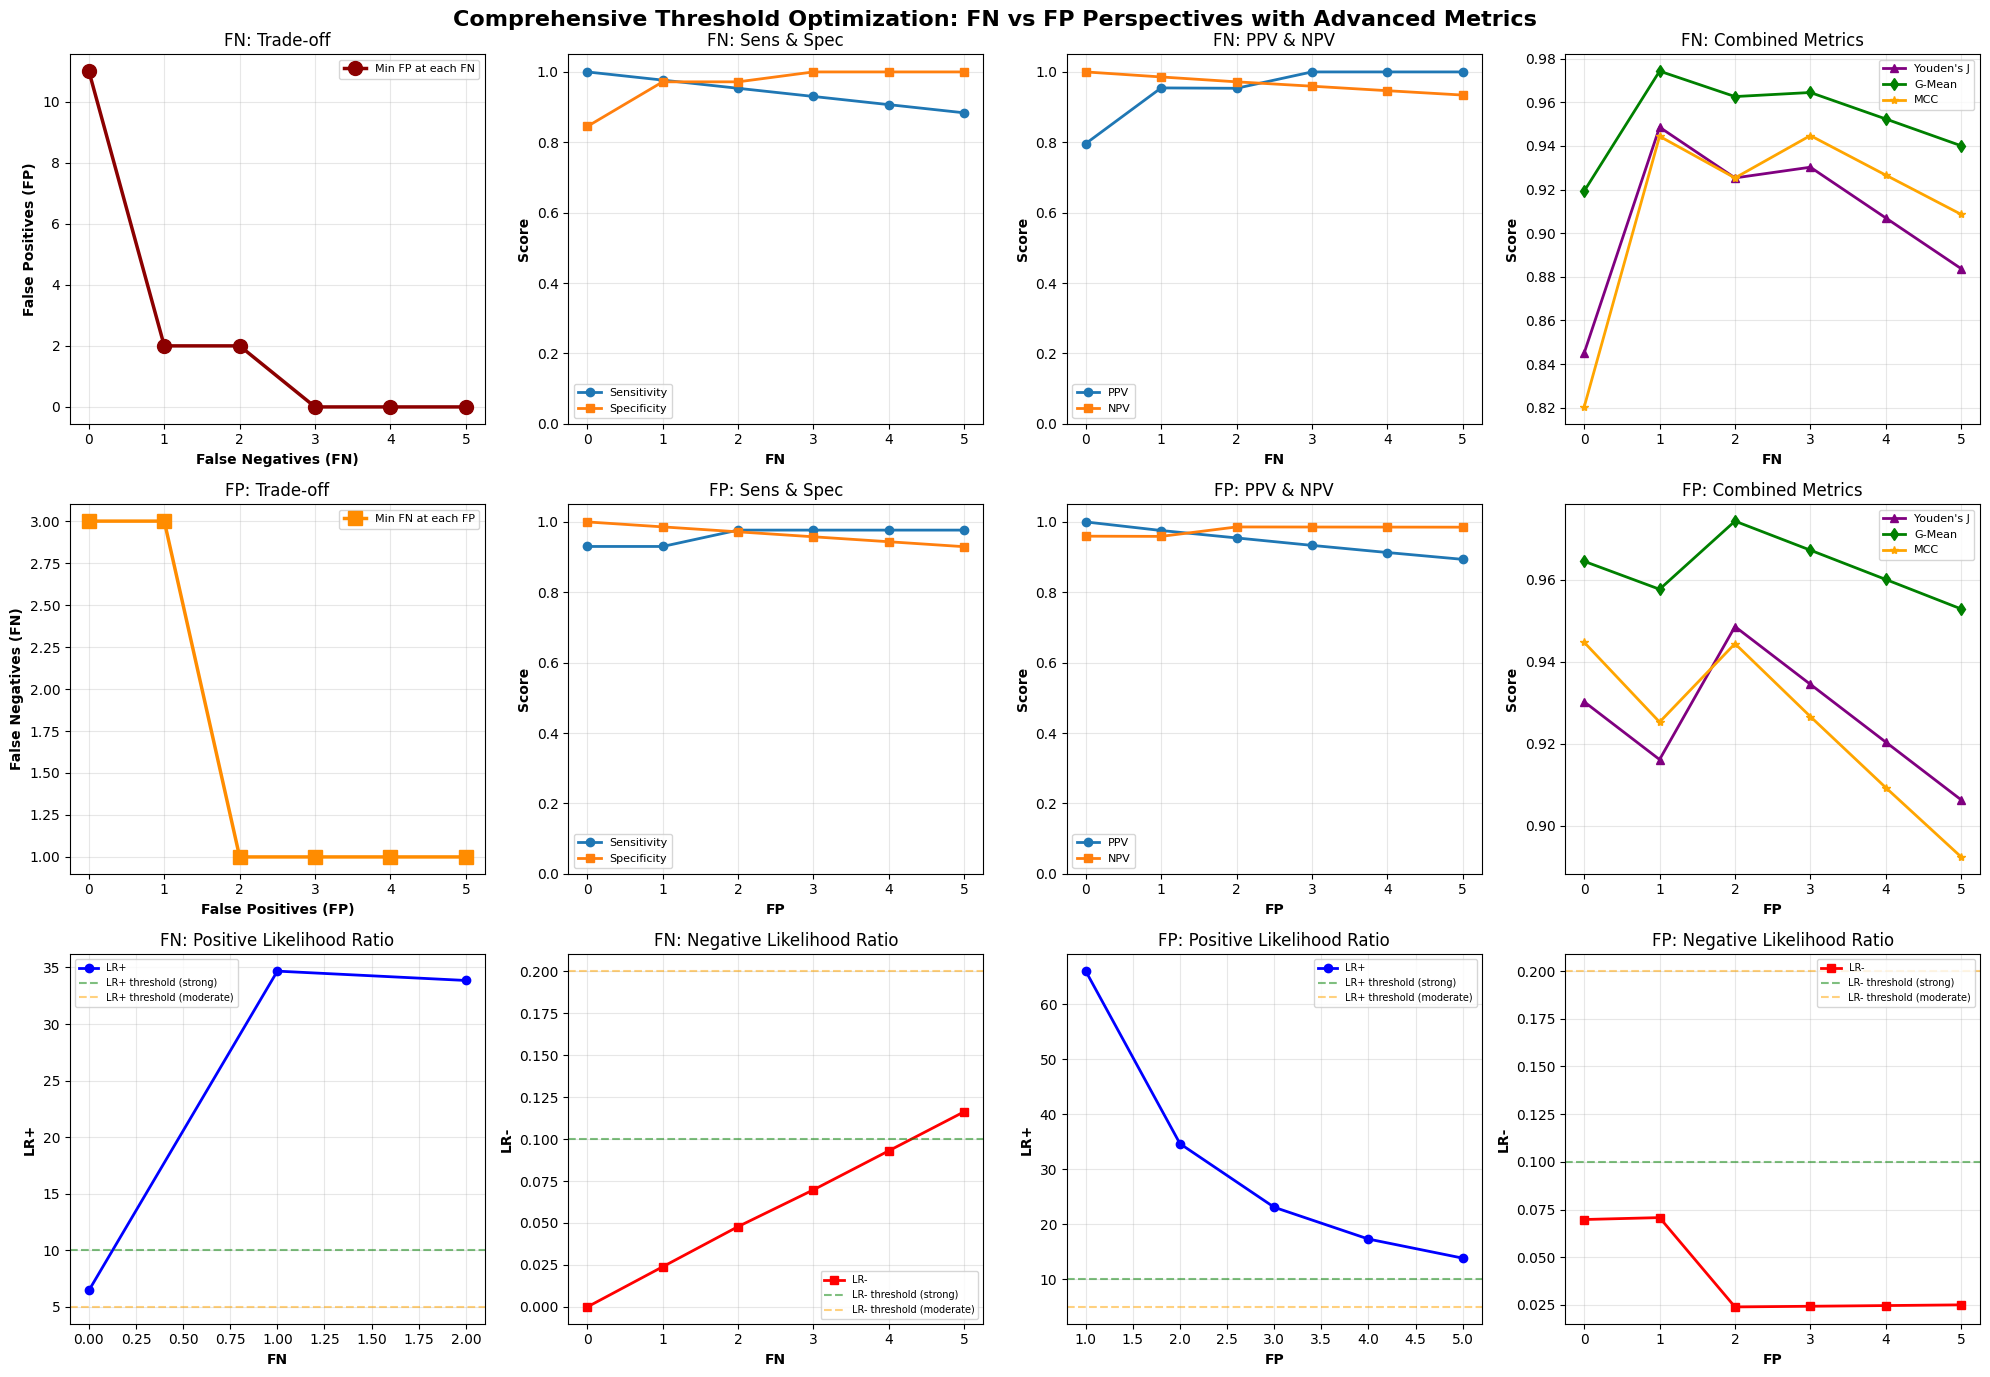

In [92]:
# ============================================================================
# DUAL THRESHOLD OPTIMIZATION WITH COMPREHENSIVE METRICS
# ============================================================================

from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score, matthews_corrcoef
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('='*100)
print("XGBOOST: DUAL THRESHOLD OPTIMIZATION: COMPREHENSIVE DIAGNOSTIC METRICS")
print('='*100)

# Predicted probabilities on test set
y_proba = best_xgb.predict_proba(X_test_t)[:, 1]

# Use unique sorted thresholds from predictions
unique_thresholds = np.sort(np.unique(y_proba))

# Calculate metrics for each threshold
threshold_results = []

for threshold in unique_thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    balanced_acc = (recall + specificity) / 2
    
    youden_j = recall + specificity - 1
    
    lr_plus = recall / fpr if fpr > 0 else float('inf')
    lr_minus = fnr / specificity if specificity > 0 else float('inf')
    
    g_mean = np.sqrt(recall * specificity)
    
    mcc = matthews_corrcoef(y_test, y_pred)
    
    markedness = precision + npv - 1
    
    dor = lr_plus / lr_minus if lr_minus > 0 and not np.isinf(lr_plus) and not np.isinf(lr_minus) else np.nan
    
    threshold_results.append({
        'threshold': threshold,
        'FN': fn,
        'FP': fp,
        'TP': tp,
        'TN': tn,
        'sensitivity': recall,  # Renamed for clarity
        'specificity': specificity,
        'ppv': precision,  # Renamed from precision
        'npv': npv,
        'f1_score': f1,
        'youden_j': youden_j,
        'lr_plus': lr_plus,
        'lr_minus': lr_minus,
        'g_mean': g_mean,
        'mcc': mcc,
        'markedness': markedness,
        'dor': dor,
        'fpr': fpr,
        'fnr': fnr,
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc
    })

results_df = pd.DataFrame(threshold_results)

fpr_roc, tpr_roc, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr_roc, tpr_roc)
pr_auc = average_precision_score(y_test, y_proba)

print(f"\nThreshold-Independent Metrics:")
print(f"  ROC-AUC: {roc_auc:.4f}")
print(f"  PR-AUC (Average Precision): {pr_auc:.4f}")
print(f"  Total Test Samples: {len(y_test)}")
print(f"  Positive Cases (disease): {y_test.sum()}")
print(f"  Negative Cases (No-disease): {len(y_test) - y_test.sum()}")

# ============================================================================
# TABLE 1: MINIMUM FP AT EACH FN LEVEL (0-5)
# ============================================================================

optimal_by_fn = []
for fn_level in range(6):  # FN = 0, 1, 2, 3, 4, 5
    fn_subset = results_df[results_df['FN'] == fn_level]
    if len(fn_subset) > 0:
        best_at_fn = fn_subset.loc[fn_subset['FP'].idxmin()]
        optimal_by_fn.append(best_at_fn)

optimal_fn_df = pd.DataFrame(optimal_by_fn)

print("\n" + "="*100)
print("TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL (0-5)")
print("="*100)

fn_table = optimal_fn_df[['FN', 'FP', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fn_table.columns = ['FN', 'FP', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fn_table = fn_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fn_table[['FN', 'FP', 'TP', 'TN']] = fn_table[['FN', 'FP', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fn_table = fn_table.replace([np.inf, -np.inf], 999.99)

print(fn_table.to_string(index=False))
print("="*100)

print("\nMETRIC INTERPRETATION GUIDE:")
print("  Sensitivity (Recall): % of disease cases correctly identified")
print("  Specificity: % of non-disease cases correctly identified")
print("  PPV (Precision): When test says disease, % actually having disease")
print("  NPV: When test says no disease, % actually not having disease")
print("  Youden's J: Sensitivity + Specificity - 1 (0-1, higher better, optimal threshold marker)")
print("  LR+: >10 strong evidence for disease, 5-10 moderate, <5 weak")
print("  LR-: <0.1 strong evidence against disease, 0.1-0.2 moderate, >0.2 weak")
print("  G-Mean: Geometric mean of Sensitivity & Specificity (balanced performance)")
print("  MCC: Matthews Correlation (-1 to +1, considers all CM elements)")
print("="*100)

# ============================================================================
# TABLE 2: MINIMUM FN AT EACH FP LEVEL (0-5)
# ============================================================================

optimal_by_fp = []
for fp_level in range(6):  # FP = 0, 1, 2, 3, 4, 5
    fp_subset = results_df[results_df['FP'] == fp_level]
    if len(fp_subset) > 0:
        best_at_fp = fp_subset.loc[fp_subset['FN'].idxmin()]
        optimal_by_fp.append(best_at_fp)

optimal_fp_df = pd.DataFrame(optimal_by_fp)

print("\n" + "="*100)
print("TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL (0-5)")
print("="*100)

fp_table = optimal_fp_df[['FP', 'FN', 'TP', 'TN', 'threshold', 
                           'sensitivity', 'specificity', 'ppv', 'npv', 
                           'f1_score', 'youden_j', 'lr_plus', 'lr_minus', 
                           'g_mean', 'mcc', 'fpr', 'accuracy', 'balanced_accuracy']].copy()

# Rename columns for clarity
fp_table.columns = ['FP', 'FN', 'TP', 'TN', 'Threshold', 
                     'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                     'F1-Score', 'Youden_J', 'LR+', 'LR-', 
                     'G-Mean', 'MCC', 'FPR', 'Accuracy', 'Balanced_Acc']

fp_table = fp_table.round({
    'Threshold': 6,
    'Sensitivity': 4,
    'Specificity': 4,
    'PPV': 4,
    'NPV': 4,
    'F1-Score': 4,
    'Youden_J': 4,
    'LR+': 2,
    'LR-': 4,
    'G-Mean': 4,
    'MCC': 4,
    'FPR': 4,
    'Accuracy': 4,
    'Balanced_Acc': 4
})

fp_table[['FP', 'FN', 'TP', 'TN']] = fp_table[['FP', 'FN', 'TP', 'TN']].astype(int)

# Replace inf with a display-friendly value
fp_table = fp_table.replace([np.inf, -np.inf], 999.99)

print(fp_table.to_string(index=False))
print("="*100)

# ============================================================================
# FIND OPTIMAL THRESHOLDS BASED ON DIFFERENT CRITERIA
# ============================================================================

print("\n" + "="*100)
print("OPTIMAL THRESHOLD RECOMMENDATIONS")
print("="*100)

# 1. Maximum Youden's Index (best balance of Sens + Spec)
best_youden = results_df.loc[results_df['youden_j'].idxmax()]
print(f"\n1. MAXIMUM YOUDEN'S INDEX (Best Sens+Spec Balance):")
print(f"   Threshold: {best_youden['threshold']:.6f}")
print(f"   Youden's J: {best_youden['youden_j']:.4f}")
print(f"   Sensitivity: {best_youden['sensitivity']:.1%}, Specificity: {best_youden['specificity']:.1%}")
print(f"   FN={int(best_youden['FN'])}, FP={int(best_youden['FP'])}")
print(f"   PPV: {best_youden['ppv']:.1%}, NPV: {best_youden['npv']:.1%}")
print(f"   LR+: {best_youden['lr_plus']:.2f}, LR-: {best_youden['lr_minus']:.4f}")
print(f"   → Use for: General screening with balanced sensitivity/specificity")

# 2. Maximum G-Mean
best_gmean = results_df.loc[results_df['g_mean'].idxmax()]
print(f"\n2. MAXIMUM G-MEAN (Geometric Balance):")
print(f"   Threshold: {best_gmean['threshold']:.6f}")
print(f"   G-Mean: {best_gmean['g_mean']:.4f}")
print(f"   Sensitivity: {best_gmean['sensitivity']:.1%}, Specificity: {best_gmean['specificity']:.1%}")
print(f"   FN={int(best_gmean['FN'])}, FP={int(best_gmean['FP'])}")
print(f"   → Use for: Imbalanced datasets requiring geometric balance")

# 3. Maximum MCC
best_mcc = results_df.loc[results_df['mcc'].idxmax()]
print(f"\n3. MAXIMUM MCC (Overall Best Classifier):")
print(f"   Threshold: {best_mcc['threshold']:.6f}")
print(f"   MCC: {best_mcc['mcc']:.4f}")
print(f"   Sensitivity: {best_mcc['sensitivity']:.1%}, Specificity: {best_mcc['specificity']:.1%}")
print(f"   FN={int(best_mcc['FN'])}, FP={int(best_mcc['FP'])}")
print(f"   → Use for: Overall best classification performance")

# 4. Best from FN Table 1 (excluding FN=0)
if len(optimal_fn_df) > 1:
    fn_valid = optimal_fn_df[optimal_fn_df['FN'] > 0]
    if len(fn_valid) > 0:
        best_fn_youden = fn_valid.loc[fn_valid['youden_j'].idxmax()]
        print(f"\n4. BEST FROM FN PERSPECTIVE (FN=1-5, Highest Youden):")
        print(f"   Threshold: {best_fn_youden['threshold']:.6f}")
        print(f"   FN={int(best_fn_youden['FN'])}, FP={int(best_fn_youden['FP'])}")
        print(f"   Youden's J: {best_fn_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fn_youden['sensitivity']:.1%}, Specificity: {best_fn_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize missed cases while maintaining balance")

# 5. Best from FP Table 2
if len(optimal_fp_df) > 0:
    fp_valid = optimal_fp_df[optimal_fp_df['FP'] > 0]
    if len(fp_valid) > 0:
        best_fp_youden = fp_valid.loc[fp_valid['youden_j'].idxmax()]
        print(f"\n5. BEST FROM FP PERSPECTIVE (FP=1-5, Highest Youden):")
        print(f"   Threshold: {best_fp_youden['threshold']:.6f}")
        print(f"   FP={int(best_fp_youden['FP'])}, FN={int(best_fp_youden['FN'])}")
        print(f"   Youden's J: {best_fp_youden['youden_j']:.4f}")
        print(f"   Sensitivity: {best_fp_youden['sensitivity']:.1%}, Specificity: {best_fp_youden['specificity']:.1%}")
        print(f"   → Use for: Minimize false alarms while maintaining balance")

# 6. High Sensitivity (>95%) with best Specificity
high_sens = results_df[results_df['sensitivity'] >= 0.95]
if len(high_sens) > 0:
    best_high_sens = high_sens.loc[high_sens['specificity'].idxmax()]
    print(f"\n6. HIGH SENSITIVITY PRIORITY (Sens ≥95%, Best Spec):")
    print(f"   Threshold: {best_high_sens['threshold']:.6f}")
    print(f"   Sensitivity: {best_high_sens['sensitivity']:.1%}, Specificity: {best_high_sens['specificity']:.1%}")
    print(f"   FN={int(best_high_sens['FN'])}, FP={int(best_high_sens['FP'])}")
    print(f"   NPV: {best_high_sens['npv']:.1%}")
    print(f"   → Use for: Screening where missing disease cases is unacceptable")

# 7. High Specificity (>95%) with best Sensitivity
high_spec = results_df[results_df['specificity'] >= 0.95]
if len(high_spec) > 0:
    best_high_spec = high_spec.loc[high_spec['sensitivity'].idxmax()]
    print(f"\n7. HIGH SPECIFICITY PRIORITY (Spec ≥95%, Best Sens):")
    print(f"   Threshold: {best_high_spec['threshold']:.6f}")
    print(f"   Specificity: {best_high_spec['specificity']:.1%}, Sensitivity: {best_high_spec['sensitivity']:.1%}")
    print(f"   FP={int(best_high_spec['FP'])}, FN={int(best_high_spec['FN'])}")
    print(f"   PPV: {best_high_spec['ppv']:.1%}")
    print(f"   → Use for: Confirmatory testing, avoiding false alarms")

print("="*100)

# ============================================================================
# ENHANCED VISUALIZATION
# ============================================================================

fig = plt.figure(figsize=(20, 14))
fig.suptitle('Comprehensive Threshold Optimization: FN vs FP Perspectives with Advanced Metrics', 
             fontsize=16, fontweight='bold')

# Row 1: FN Perspective
ax1 = plt.subplot(3, 4, 1)
ax1.plot(optimal_fn_df['FN'], optimal_fn_df['FP'], marker='o', linewidth=2.5, 
         markersize=10, color='darkred', label='Min FP at each FN')
ax1.set_xlabel('False Negatives (FN)', fontweight='bold')
ax1.set_ylabel('False Positives (FP)', fontweight='bold')
ax1.set_title('FN: Trade-off')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=8)

ax2 = plt.subplot(3, 4, 2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax2.plot(optimal_fn_df['FN'], optimal_fn_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax2.set_xlabel('FN', fontweight='bold')
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_title('FN: Sens & Spec')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.05])

ax3 = plt.subplot(3, 4, 3)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['ppv'], marker='o', label='PPV', linewidth=2)
ax3.plot(optimal_fn_df['FN'], optimal_fn_df['npv'], marker='s', label='NPV', linewidth=2)
ax3.set_xlabel('FN', fontweight='bold')
ax3.set_ylabel('Score', fontweight='bold')
ax3.set_title('FN: PPV & NPV')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 1.05])

ax4 = plt.subplot(3, 4, 4)
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax4.plot(optimal_fn_df['FN'], optimal_fn_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax4.set_xlabel('FN', fontweight='bold')
ax4.set_ylabel('Score', fontweight='bold')
ax4.set_title('FN: Combined Metrics')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

# Row 2: FP Perspective
ax5 = plt.subplot(3, 4, 5)
ax5.plot(optimal_fp_df['FP'], optimal_fp_df['FN'], marker='s', linewidth=2.5, 
         markersize=10, color='darkorange', label='Min FN at each FP')
ax5.set_xlabel('False Positives (FP)', fontweight='bold')
ax5.set_ylabel('False Negatives (FN)', fontweight='bold')
ax5.set_title('FP: Trade-off')
ax5.grid(True, alpha=0.3)
ax5.legend(fontsize=8)

ax6 = plt.subplot(3, 4, 6)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['sensitivity'], marker='o', label='Sensitivity', linewidth=2)
ax6.plot(optimal_fp_df['FP'], optimal_fp_df['specificity'], marker='s', label='Specificity', linewidth=2)
ax6.set_xlabel('FP', fontweight='bold')
ax6.set_ylabel('Score', fontweight='bold')
ax6.set_title('FP: Sens & Spec')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3)
ax6.set_ylim([0, 1.05])

ax7 = plt.subplot(3, 4, 7)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['ppv'], marker='o', label='PPV', linewidth=2)
ax7.plot(optimal_fp_df['FP'], optimal_fp_df['npv'], marker='s', label='NPV', linewidth=2)
ax7.set_xlabel('FP', fontweight='bold')
ax7.set_ylabel('Score', fontweight='bold')
ax7.set_title('FP: PPV & NPV')
ax7.legend(fontsize=8)
ax7.grid(True, alpha=0.3)
ax7.set_ylim([0, 1.05])

ax8 = plt.subplot(3, 4, 8)
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['youden_j'], marker='^', label="Youden's J", linewidth=2, color='purple')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['g_mean'], marker='d', label='G-Mean', linewidth=2, color='green')
ax8.plot(optimal_fp_df['FP'], optimal_fp_df['mcc'], marker='*', label='MCC', linewidth=2, color='orange')
ax8.set_xlabel('FP', fontweight='bold')
ax8.set_ylabel('Score', fontweight='bold')
ax8.set_title('FP: Combined Metrics')
ax8.legend(fontsize=8)
ax8.grid(True, alpha=0.3)

# Row 3: Likelihood Ratios and Combined
ax9 = plt.subplot(3, 4, 9)
# Filter out infinite values for plotting
fn_lr = optimal_fn_df[optimal_fn_df['lr_plus'] < 100].copy()
if len(fn_lr) > 0:
    ax9.plot(fn_lr['FN'], fn_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax9.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax9.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax9.set_xlabel('FN', fontweight='bold')
ax9.set_ylabel('LR+', fontweight='bold')
ax9.set_title('FN: Positive Likelihood Ratio')
ax9.legend(fontsize=7)
ax9.grid(True, alpha=0.3)

ax10 = plt.subplot(3, 4, 10)
ax10.plot(optimal_fn_df['FN'], optimal_fn_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax10.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax10.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax10.set_xlabel('FN', fontweight='bold')
ax10.set_ylabel('LR-', fontweight='bold')
ax10.set_title('FN: Negative Likelihood Ratio')
ax10.legend(fontsize=7)
ax10.grid(True, alpha=0.3)

ax11 = plt.subplot(3, 4, 11)
fp_lr = optimal_fp_df[optimal_fp_df['lr_plus'] < 100].copy()
if len(fp_lr) > 0:
    ax11.plot(fp_lr['FP'], fp_lr['lr_plus'], marker='o', label='LR+', linewidth=2, color='blue')
ax11.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='LR+ threshold (strong)')
ax11.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='LR+ threshold (moderate)')
ax11.set_xlabel('FP', fontweight='bold')
ax11.set_ylabel('LR+', fontweight='bold')
ax11.set_title('FP: Positive Likelihood Ratio')
ax11.legend(fontsize=7)
ax11.grid(True, alpha=0.3)

ax12 = plt.subplot(3, 4, 12)
ax12.plot(optimal_fp_df['FP'], optimal_fp_df['lr_minus'], marker='s', label='LR-', linewidth=2, color='red')
ax12.axhline(y=0.1, color='green', linestyle='--', alpha=0.5, label='LR- threshold (strong)')
ax12.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='LR- threshold (moderate)')
ax12.set_xlabel('FP', fontweight='bold')
ax12.set_ylabel('LR-', fontweight='bold')
ax12.set_title('FP: Negative Likelihood Ratio')
ax12.legend(fontsize=7)
ax12.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

